# Problem Statement Description

# Insurance Premium Renewal Propensity


# Background and Context

Premium paid by the customer is the major revenue source for insurance companies. Default in premium payments results in significant revenue losses and hence insurance companies would like to know upfront which type of customers would default premium payments.

Objective:

The objective of this project is to predict the probability that a customer will default the premium payment, so that the insurance agent can proactively reach out to the policy holder to follow up for the payment of premium.

About the dataset:

The dataset contains the following information about 79854 policy holders:

id: Unique customer ID

perc_premium_paid_by_cash_credit: What % of the premium was paid by cash payments?

age_in_days: age of the customer in days

Income: Income of the customer

Marital Status: Married/Unmarried, Married (1), unmarried (0)

Veh_Owned: Number of vehicles owned (1-3)

Count_3-6_months_late: # of times premium was paid 3-6 months late

Count_6-12_months_late: # of times premium was paid 6-12 months late

Count_more_than_12_months_late: # of times premium was paid more than 12 months late

Risk_score:Risk score of customer

No_of_dep: Number of dependents in the family on the customer (1-4)

Accomodation: Owned (1), Rented (0)

no_of_premiums_paid: # of premiums paid till date

sourcing_channel: channel through which customer was sourced

residence_area_type: Residence type of the customer

premium renewal: Y variable - 0 indicates that customer has not renewed the premium and 1 indicates that customer has renewed the premium

In [1]:
# this will help in making the Python code more structured automatically
%load_ext nb_black

<IPython.core.display.Javascript object>

In [2]:
# Loading Libraries

# Libraries to help with reading and manipulating data
import pandas as pd
import numpy as np

# Libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# To tune model, get different metric scores, and split data
from sklearn import metrics
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    roc_auc_score,
    plot_confusion_matrix,
)
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score

# To be used for data scaling and one hot encoding
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder

# To impute any missing values
from sklearn.impute import SimpleImputer

# To oversample and undersample data
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

# To do hyperparameter tuning
from sklearn.model_selection import RandomizedSearchCV

# To be used for creating pipelines and personalizing them
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

# To define maximum number of columns to be displayed in a dataframe
pd.set_option("display.max_columns", None)

# To supress scientific notations for a dataframe
pd.set_option("display.float_format", lambda x: "%.3f" % x)

# To help with model building
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import (
    AdaBoostClassifier,
    GradientBoostingClassifier,
    RandomForestClassifier,
    BaggingClassifier,
)
from xgboost import XGBClassifier

# To plot learning curve to shows the relationship of the training score versus the cross validated test score

from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.datasets import load_digits
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit

# To aid the interpretation of model results
!pip install eli5
import eli5 as eli
from eli5.sklearn import PermutationImportance

# To suppress scientific notations
# pd.set_option("display.float_format", lambda x: "%.3f" % x)

# To suppress warnings
import warnings

warnings.filterwarnings("ignore")

<IPython.core.display.Javascript object>

In [3]:
# Loading and exploring the data

path = "Desktop/Capstone Project/"

data = pd.read_excel(path + "premium.xlsx")

<IPython.core.display.Javascript object>

In [4]:
# let's create a copy of the data
df = data.copy()

# let's view a sample of the data
np.random.seed(1)  # to get the same random results every time
data.sample(n=10)

id  perc_premium_paid_by_cash_credit  age_in_days  Income  \
53658  53659                             0.150        22643  171080   
25309  25310                             0.201        10232   75090   
26163  26164                             0.010        19719  144120   
55134  55135                             0.000        23734  350070   
29706  29707                             0.094        27023   69110   
11087  11088                             0.123        28844  180030   
71267  71268                             0.990        12785   55640   
4389    4390                             0.051        22276  171080   
47666  47667                             0.000        19717  219430   
31240  31241                             0.000        15708  150110   

       Count_3-6_months_late  Count_6-12_months_late  \
53658                      0                       0   
25309                      0                       0   
26163                      0                       0   
55134                      0                       0   
29706                      0                       0   
11087                      0                       0   
71267                      1                       0   
4389                       0                       0   
47666                      0                       0   
31240                      0                       0   

       Count_more_than_12_months_late  Marital Status  Veh_Owned  No_of_dep  \
53658                               0               1          2          2   
25309                               0               1          3          4   
26163                               0               1          3          1   
55134                               0               1          1          1   
29706                               0               1          3          4   
11087                               0               0          2          1   
71267                               0               0          1          2   
4389                                0               0          2          2   
47666                               0               1          2          3   
31240                               0               0          3          2   

       Accomodation  risk_score  no_of_premiums_paid sourcing_channel  \
53658             0      98.780                   12                A   
25309             0      99.610                    7                A   
26163             0      99.890                    7                A   
55134             1      99.510                    9                A   
29706             0      99.830                    8                A   
11087             1      99.470                    8                A   
71267             1      99.660                    7                A   
4389              0      99.690                   11                A   
47666             0      99.270                   11                D   
31240             0      99.710                    4                C   

      residence_area_type  premium  renewal  
53658               Urban    11700        1  
25309               Rural     1200        1  
26163               Urban    11700        1  
55134               Urban     1200        1  
29706               Urban     5400        1  
11087               Rural     9600        1  
71267               Rural     3300        1  
4389                Rural     7500        1  
47666               Urban    11700        1  
31240               Urban    11700        1

<IPython.core.display.Javascript object>

premium_renewal column is split into 2 columns named premium and renewal. These columns would be merged into one and the intial 2 columns deleted.

Some of the column names have a dash (-), period (.) and space. These punctuation marks and spaces would be replaced with an underscore ( _ ).

In [5]:
# rename renewal column to premium_renewal

# The premium column would be kept and added as a new variable to the list in the problem statement signifying monthly premium amount

data.rename(columns={"renewal": "premium_renewal"}, inplace=True)


data.sample(n=10)

id  perc_premium_paid_by_cash_credit  age_in_days  Income  \
26522  26523                             0.408        17900  150080   
4206    4207                             0.990        21905   64560   
53320  53321                             0.994        18987   94830   
8933    8934                             0.067        28840   68450   
35986  35987                             0.000        14980  119310   
66597  66598                             0.252        23733  306140   
32054  32055                             0.000        26655  102140   
3096    3097                             0.554        10959   75090   
18306  18307                             0.417        22279  150090   
11093  11094                             0.401        20086  246330   

       Count_3-6_months_late  Count_6-12_months_late  \
26522                      0                       0   
4206                       1                       0   
53320                      0                       0   
8933                       0                       0   
35986                      0                       0   
66597                      0                       0   
32054                      0                       0   
3096                       0                       0   
18306                      0                       0   
11093                      0                       0   

       Count_more_than_12_months_late  Marital Status  Veh_Owned  No_of_dep  \
26522                               0               1          2          2   
4206                                0               1          2          2   
53320                               0               1          1          1   
8933                                0               1          2          2   
35986                               0               0          3          1   
66597                               0               1          2          2   
32054                               0               0          1          3   
3096                                0               1          3          1   
18306                               0               0          1          3   
11093                               0               0          3          2   

       Accomodation  risk_score  no_of_premiums_paid sourcing_channel  \
26522             0      98.610                   11                C   
4206              0      98.530                    8                A   
53320             1      99.720                   12                C   
8933              1      99.850                    7                A   
35986             0      99.220                    6                A   
66597             1      99.050                   16                A   
32054             0      97.830                    7                A   
3096              1      99.030                   11                A   
18306             1      99.780                   18                A   
11093             1      99.120                   12                D   

      residence_area_type  premium  premium_renewal  
26522               Rural     5400                1  
4206                Urban     3300                0  
53320               Rural     3300                1  
8933                Urban     3300                1  
35986               Rural     3300                1  
66597               Rural    32700                1  
32054               Rural     5400                1  
3096                Urban     3300                0  
18306               Urban     9600                1  
11093               Rural    22200                1

<IPython.core.display.Javascript object>

In [6]:
# view the column names after the renaming of columns

print(data.columns)

Index(['id', 'perc_premium_paid_by_cash_credit', 'age_in_days', 'Income',
       'Count_3-6_months_late', 'Count_6-12_months_late',
       'Count_more_than_12_months_late', 'Marital Status', 'Veh_Owned',
       'No_of_dep', 'Accomodation', 'risk_score', 'no_of_premiums_paid',
       'sourcing_channel', 'residence_area_type', 'premium',
       'premium_renewal'],
      dtype='object')


<IPython.core.display.Javascript object>

In [7]:
# fixing the names of columns as there are dots, spaces in columns names
# view the column names afterwards

data.columns = [col.replace(" ", "_") for col in data.columns]
data.columns = [col.replace("-", "_") for col in data.columns]
data.columns = [col.replace(".", "") for col in data.columns]

print(data.columns)

Index(['id', 'perc_premium_paid_by_cash_credit', 'age_in_days', 'Income',
       'Count_3_6_months_late', 'Count_6_12_months_late',
       'Count_more_than_12_months_late', 'Marital_Status', 'Veh_Owned',
       'No_of_dep', 'Accomodation', 'risk_score', 'no_of_premiums_paid',
       'sourcing_channel', 'residence_area_type', 'premium',
       'premium_renewal'],
      dtype='object')


<IPython.core.display.Javascript object>

In [8]:
# let's check the data types of the columns in the dataset

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79853 entries, 0 to 79852
Data columns (total 17 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                79853 non-null  int64  
 1   perc_premium_paid_by_cash_credit  79853 non-null  float64
 2   age_in_days                       79853 non-null  int64  
 3   Income                            79853 non-null  int64  
 4   Count_3_6_months_late             79853 non-null  int64  
 5   Count_6_12_months_late            79853 non-null  int64  
 6   Count_more_than_12_months_late    79853 non-null  int64  
 7   Marital_Status                    79853 non-null  int64  
 8   Veh_Owned                         79853 non-null  int64  
 9   No_of_dep                         79853 non-null  int64  
 10  Accomodation                      79853 non-null  int64  
 11  risk_score                        79853 non-null  float64
 12  no_o

<IPython.core.display.Javascript object>

The dataset has 2 float variables, 14 integer variable and 2 object variables.

In [9]:
# let's check for duplicate values in the dataset

data.duplicated().sum()

0

<IPython.core.display.Javascript object>

There are no duplicated values in the dataset

In [10]:
# Data Overview

# let's view the first 10 rows of the data

data.head(10)

id  perc_premium_paid_by_cash_credit  age_in_days  Income  \
0   1                             0.317        11330   90050   
1   2                             0.000        30309  156080   
2   3                             0.015        16069  145020   
3   4                             0.000        23733  187560   
4   5                             0.888        19360  103050   
5   6                             0.512        16795  113500   
6   7                             0.000        16430  276240   
7   8                             0.994        14248   84090   
8   9                             0.019        27754  138330   
9  10                             0.018        29940  180100   

   Count_3_6_months_late  Count_6_12_months_late  \
0                      0                       0   
1                      0                       0   
2                      1                       0   
3                      0                       0   
4                      7                       3   
5                      0                       0   
6                      0                       0   
7                      0                       0   
8                      0                       0   
9                      0                       0   

   Count_more_than_12_months_late  Marital_Status  Veh_Owned  No_of_dep  \
0                               0               0          3          3   
1                               0               1          3          1   
2                               0               0          1          1   
3                               0               1          1          1   
4                               4               0          2          1   
5                               0               0          1          4   
6                               0               0          3          4   
7                               0               0          3          2   
8                               0               1          2          4   
9                               0               1          3          3   

   Accomodation  risk_score  no_of_premiums_paid sourcing_channel  \
0             1      98.810                    8                A   
1             1      99.066                    3                A   
2             1      99.170                   14                C   
3             0      99.370                   13                A   
4             0      98.800                   15                A   
5             0      99.230                    4                B   
6             1      99.770                    8                C   
7             0      98.990                    4                A   
8             1      99.880                    8                A   
9             1      99.690                    8                A   

  residence_area_type  premium  premium_renewal  
0               Rural     5400                1  
1               Urban    11700                1  
2               Urban    18000                1  
3               Urban    13800                1  
4               Urban     7500                0  
5               Rural     3300                1  
6               Rural    20100                1  
7               Urban     3300                1  
8               Urban     5400                1  
9               Rural     9600                1

<IPython.core.display.Javascript object>

In [11]:
# let's view the last 10 rows of the data

data.tail(10)

id  perc_premium_paid_by_cash_credit  age_in_days  Income  \
79843  79844                             0.044        21908  126050   
79844  79845                             0.218        24835   87550   
79845  79846                             0.073        20813  363580   
79846  79847                             0.972        23372  156530   
79847  79848                             0.009        21545  133140   
79848  79849                             0.249        25555   64420   
79849  79850                             0.003        16797  660040   
79850  79851                             0.012        24835  227760   
79851  79852                             0.190        10959  153060   
79852  79853                             0.000        19720  324030   

       Count_3_6_months_late  Count_6_12_months_late  \
79843                      0                       0   
79844                      0                       0   
79845                      0                       0   
79846                      0                       0   
79847                      0                       0   
79848                      0                       0   
79849                      1                       0   
79850                      0                       0   
79851                      1                       0   
79852                      0                       0   

       Count_more_than_12_months_late  Marital_Status  Veh_Owned  No_of_dep  \
79843                               0               0          2          2   
79844                               0               1          1          3   
79845                               0               1          3          2   
79846                               0               0          2          2   
79847                               0               1          3          2   
79848                               0               1          2          4   
79849                               0               0          2          1   
79850                               0               0          2          3   
79851                               0               0          2          1   
79852                               0               0          3          3   

       Accomodation  risk_score  no_of_premiums_paid sourcing_channel  \
79843             1      99.340                    8                A   
79844             0      99.690                    7                A   
79845             1      99.400                   12                A   
79846             1      98.480                   14                B   
79847             1      98.940                    6                B   
79848             0      99.080                   10                A   
79849             0      99.650                    9                B   
79850             0      99.660                   11                A   
79851             0      99.460                   24                A   
79852             0      99.800                    7                D   

      residence_area_type  premium  premium_renewal  
79843               Urban     5400                1  
79844               Rural     5700                1  
79845               Urban    24300                1  
79846               Urban     7500                0  
79847               Rural     5400                1  
79848               Urban     5700                1  
79849               Urban    28500                1  
79850               Rural    11700                1  
79851               Urban    11700                1  
79852               Rural     3300                1

<IPython.core.display.Javascript object>

In [12]:
# Checking the number of rows and columns in the data

data.shape

(79853, 17)

<IPython.core.display.Javascript object>

The dataset has 79,853 observations and 17 columns.

In [13]:
# Let's check for missing values in the dataset

data.isnull().sum().sort_values(ascending=False)

id                                  0
No_of_dep                           0
premium                             0
residence_area_type                 0
sourcing_channel                    0
no_of_premiums_paid                 0
risk_score                          0
Accomodation                        0
Veh_Owned                           0
perc_premium_paid_by_cash_credit    0
Marital_Status                      0
Count_more_than_12_months_late      0
Count_6_12_months_late              0
Count_3_6_months_late               0
Income                              0
age_in_days                         0
premium_renewal                     0
dtype: int64

<IPython.core.display.Javascript object>

There are no missing values in the dataset.

In [14]:
# let's view the statistical summary of the numerical columns in the dataset (being the numerical variables asides from id)

data.describe().T

count       mean        std       min  \
id                               79853.000  39927.000  23051.720     1.000   
perc_premium_paid_by_cash_credit 79853.000      0.314      0.335     0.000   
age_in_days                      79853.000  18846.697   5208.719  7670.000   
Income                           79853.000 208847.171 496582.597 24030.000   
Count_3_6_months_late            79853.000      0.248      0.691     0.000   
Count_6_12_months_late           79853.000      0.078      0.436     0.000   
Count_more_than_12_months_late   79853.000      0.060      0.312     0.000   
Marital_Status                   79853.000      0.499      0.500     0.000   
Veh_Owned                        79853.000      1.998      0.817     1.000   
No_of_dep                        79853.000      2.503      1.116     1.000   
Accomodation                     79853.000      0.501      0.500     0.000   
risk_score                       79853.000     99.067      0.726    91.900   
no_of_premiums_paid              79853.000     10.864      5.171     2.000   
premium                          79853.000  10924.508   9401.677  1200.000   
premium_renewal                  79853.000      0.937      0.242     0.000   

                                        25%        50%        75%          max  
id                                19964.000  39927.000  59890.000    79853.000  
perc_premium_paid_by_cash_credit      0.034      0.167      0.538        1.000  
age_in_days                       14974.000  18625.000  22636.000    37602.000  
Income                           108010.000 166560.000 252090.000 90262600.000  
Count_3_6_months_late                 0.000      0.000      0.000       13.000  
Count_6_12_months_late                0.000      0.000      0.000       17.000  
Count_more_than_12_months_late        0.000      0.000      0.000       11.000  
Marital_Status                        0.000      0.000      1.000        1.000  
Veh_Owned                             1.000      2.000      3.000        3.000  
No_of_dep                             2.000      3.000      3.000        4.000  
Accomodation                          0.000      1.000      1.000        1.000  
risk_score                           98.830     99.180     99.520       99.890  
no_of_premiums_paid                   7.000     10.000     14.000       60.000  
premium                            5400.000   7500.000  13800.000    60000.000  
premium_renewal                       1.000      1.000      1.000        1.000

<IPython.core.display.Javascript object>

perc_premium_paid_by_cash_credit: We have policy holders (customers) who make their full premium in cash. Where payments are not automated, there is a possibility of default in Insurance payments when the customer forgets to make the deposit or it is not convenient to visit the bank before the due date.

age_in_days: The minimum age is slightly over 21 years (7,670 days) while the mean is over 51.6 years (18,846.696 days). We have some outliers with 103 years (37,602 days) as the maximum age. The range between the mean and maximum age is too wide. We will review the list for the extreme values, for better analysis.

Income: Whereas the mean income amount is 208,847.17 and the 75th percentile is 252,090, the maximum income is 90,262,600 which connotes outlier value(s) in the data set. The range between the mean or 75th percentile and the maximum income is too wide. We will review the list for the extreme values, for better analysis.

Count_3_6_months_late, Count_6_12_months_late and Count_more_than_12_months_late varable shows that 75% of customers have not defaulted in their insurance payments. Unfortunately some customers have defaulted up to 13, 17 and 11 times respectively for the listed variables.

Veh_Owned: All customers own at least 1 vehicle and a maximum of 3 vehicles.

No_of_dep: The mean number of dependents is 2.5 dependents and the 75th percentile is 3 dependents.

risk_score: The mean risk score is 99.06 which is impressive and may inform why 75% of customers don't default in their payments.

no_of_premium_paid: The mean number of payments made is 10.86 and 75 percentile is 14 which implies that most of the customers in the dataset may be customers who are less than 2 years. We have some customers who have made up to 60 premium payments.

premium: The mean premium amount is 10,924 and the 75th percentile is 13,800 but the maximum amount is 60,000 whoch shows that there are some outliers in the dataset.

In [15]:
# let's view the statistical summary of the non-numerical columns in the data

data.describe(exclude=np.number).T

count unique    top   freq
sourcing_channel     79853      5      A  43134
residence_area_type  79853      2  Urban  48183

<IPython.core.display.Javascript object>

residence_area_type: Urban is the predominant residence area type in the dataset.

sourcing_channel: Most of the customers were sourced through channel A

In [16]:
data.nunique()

id                                  79853
perc_premium_paid_by_cash_credit     1001
age_in_days                           833
Income                              24165
Count_3_6_months_late                  14
Count_6_12_months_late                 17
Count_more_than_12_months_late         10
Marital_Status                          2
Veh_Owned                               3
No_of_dep                               4
Accomodation                            2
risk_score                            673
no_of_premiums_paid                    57
sourcing_channel                        5
residence_area_type                     2
premium                                30
premium_renewal                         2
dtype: int64

<IPython.core.display.Javascript object>

All the 79,853 values in the id variable are unique.
Income has 24,165 unique values which is expected from a dataset of over 79,000 observations.

All the values in id are unique and may not add value to our prediction model. This value would be dropped before the model is built.

In [17]:
# filtering object type columns
cat_columns = data.describe(include=["object"]).columns
cat_columns

Index(['sourcing_channel', 'residence_area_type'], dtype='object')

<IPython.core.display.Javascript object>

In [18]:
# checking extreme values in perc_premium_paid_by_cash_credit
data.sort_values(by=["perc_premium_paid_by_cash_credit"], ascending=False).head(10)

id  perc_premium_paid_by_cash_credit  age_in_days  Income  \
74089  74090                             1.000        18255  174150   
30917  30918                             1.000        19718  180040   
42728  42729                             1.000        16439   39070   
72067  72068                             1.000        10955   96050   
47086  47087                             1.000         9861   42030   
3857    3858                             1.000        12423  225060   
38551  38552                             1.000        12418  185130   
8771    8772                             1.000        13885  300130   
38547  38548                             1.000         9138   45160   
38543  38544                             1.000        14977  150360   

       Count_3_6_months_late  Count_6_12_months_late  \
74089                      1                       0   
30917                      0                       0   
42728                      0                       0   
72067                      1                       0   
47086                      0                       1   
3857                       1                       0   
38551                      0                       1   
8771                       0                       0   
38547                      0                       0   
38543                      1                       0   

       Count_more_than_12_months_late  Marital_Status  Veh_Owned  No_of_dep  \
74089                               0               0          3          4   
30917                               0               0          1          2   
42728                               0               0          3          3   
72067                               0               0          1          1   
47086                               0               1          1          3   
3857                                0               0          1          2   
38551                               1               0          3          3   
8771                                0               0          3          3   
38547                               1               0          3          4   
38543                               0               0          3          2   

       Accomodation  risk_score  no_of_premiums_paid sourcing_channel  \
74089             0      99.530                    4                A   
30917             1      98.130                    5                A   
42728             1      99.810                    3                A   
72067             0      98.570                    8                B   
47086             0      99.330                    3                B   
3857              1      99.000                    7                B   
38551             1      99.310                    7                C   
8771              0      99.066                    3                C   
38547             0      99.340                    3                A   
38543             0      99.810                    4                A   

      residence_area_type  premium  premium_renewal  
74089               Rural    15900                0  
30917               Urban     9600                1  
42728               Urban     5700                1  
72067               Urban     7500                1  
47086               Urban     3300                1  
3857                Urban    11700                0  
38551               Urban     1200                0  
8771                Urban    13800                1  
38547               Rural     5700                1  
38543               Rural     5400                1

<IPython.core.display.Javascript object>

We have a number of customers who make all of their deposits in cash. Such category of customers are more likely to default where payments are not automated. We will analyse the effect of this high percentage of cash payment on premium default.

In [19]:
# checking extreme values in age_in_days
data.sort_values(by=["age_in_days"], ascending=False).head(10)

id  perc_premium_paid_by_cash_credit  age_in_days  Income  \
1922    1923                             1.000        37602   48130   
74847  74848                             0.010        37240   99060   
32427  32428                             0.110        37239  102580   
49070  49071                             0.003        36874   86570   
46149  46150                             0.026        36870   50050   
77800  77801                             0.016        36150  285040   
33180  33181                             0.001        36145  195100   
42063  42064                             0.034        36145  191210   
9387    9388                             0.009        35784   28550   
8480    8481                             0.006        35419   98700   

       Count_3_6_months_late  Count_6_12_months_late  \
1922                       0                       0   
74847                      0                       0   
32427                      0                       0   
49070                      2                       0   
46149                      0                       0   
77800                      0                       0   
33180                      0                       0   
42063                      0                       0   
9387                       1                       0   
8480                       0                       1   

       Count_more_than_12_months_late  Marital_Status  Veh_Owned  No_of_dep  \
1922                                0               1          3          1   
74847                               0               1          2          2   
32427                               0               0          1          4   
49070                               0               0          1          4   
46149                               0               1          3          3   
77800                               0               1          1          3   
33180                               0               1          3          3   
42063                               0               0          1          1   
9387                                0               0          2          2   
8480                                0               1          2          2   

       Accomodation  risk_score  no_of_premiums_paid sourcing_channel  \
1922              1      99.066                    5                A   
74847             1      99.890                    5                A   
32427             1      99.270                    9                B   
49070             0      99.066                    8                A   
46149             1      99.870                    7                A   
77800             0      99.880                   17                A   
33180             1      99.066                   17                A   
42063             0      98.110                   14                A   
9387              1      98.440                   10                A   
8480              0      99.066                    6                A   

      residence_area_type  premium  premium_renewal  
1922                Rural     1200                1  
74847               Urban     3300                1  
32427               Urban     7500                1  
49070               Rural     7500                0  
46149               Rural     5700                1  
77800               Rural    13800                1  
33180               Urban     9600                0  
42063               Rural     7500                1  
9387                Urban     5700                1  
8480                Rural     7500                1

<IPython.core.display.Javascript object>

While the mean is over 51.6 years (18,846.696 days), we have some extreme values/outliers with 103 years (37,602 days) as the maximum age.

In [20]:
# checking extreme values in Income
data.sort_values(by=["Income"], ascending=False).head(10)

id  perc_premium_paid_by_cash_credit  age_in_days    Income  \
75338  75339                             0.007        18991  90262600   
27646  27647                             0.000        24828  53821900   
71798  71799                             0.164        16070  46803140   
801      802                             0.469        16072  32175090   
4644    4645                             0.042        20086  25051240   
51192  51193                             0.072        18256  21075130   
34370  34371                             0.064        18993  20986030   
75651  75652                             0.440        23365  17471210   
69391  69392                             0.080        22272  16874010   
29577  29578                             0.036        15707  12847560   

       Count_3_6_months_late  Count_6_12_months_late  \
75338                      0                       0   
27646                      0                       0   
71798                      0                       0   
801                        1                       0   
4644                       0                       0   
51192                      0                       0   
34370                      0                       0   
75651                      0                       0   
69391                      0                       0   
29577                      0                       0   

       Count_more_than_12_months_late  Marital_Status  Veh_Owned  No_of_dep  \
75338                               0               0          2          2   
27646                               0               0          3          1   
71798                               0               1          3          1   
801                                 0               0          3          4   
4644                                0               1          3          3   
51192                               0               0          2          4   
34370                               0               1          1          4   
75651                               0               0          1          1   
69391                               0               1          2          4   
29577                               0               0          2          4   

       Accomodation  risk_score  no_of_premiums_paid sourcing_channel  \
75338             0      99.066                   12                D   
27646             1      99.890                   17                A   
71798             0      99.890                   14                C   
801               0      99.890                   11                B   
4644              0      99.066                   10                A   
51192             0      99.880                   14                C   
34370             0      99.890                   13                B   
75651             0      99.890                   13                B   
69391             1      99.066                    9                B   
29577             1      99.890                   15                B   

      residence_area_type  premium  premium_renewal  
75338               Urban    60000                1  
27646               Urban    60000                1  
71798               Urban    60000                1  
801                 Rural    60000                1  
4644                Urban    60000                1  
51192               Rural    60000                1  
34370               Urban    60000                1  
75651               Rural    60000                1  
69391               Rural    60000                1  
29577               Rural    60000                1

<IPython.core.display.Javascript object>

Whereas the mean income amount is 208,847.17 and the 75th percentile is 252,090, the maximum income is 90,262,600 which connotes outlier value(s) in the data set. The range of over 90million between the mean and the maximum income is too wide.

Further analysis before the model building will determine how the outliers would be treated.

In [21]:
# checking extreme values in Count_3_6_months_late
data.sort_values(by=["Count_3_6_months_late"], ascending=False).head(10)

id  perc_premium_paid_by_cash_credit  age_in_days  Income  \
1587    1588                             0.999        17526  362530   
2450    2451                             0.982        18265  121410   
64913  64914                             0.993        18624  110650   
2938    2939                             0.992        22275   90080   
36142  36143                             0.982        15709  240030   
52065  52066                             0.244        19723  132530   
17258  17259                             0.946        20450  199140   
65332  65333                             1.000        20815   47310   
43594  43595                             1.000        22642   84070   
71129  71130                             0.873        23005  300050   

       Count_3_6_months_late  Count_6_12_months_late  \
1587                      13                       0   
2450                      12                       0   
64913                     11                       1   
2938                      10                       2   
36142                      9                       0   
52065                      9                       0   
17258                      9                       5   
65332                      9                       0   
43594                      8                       2   
71129                      8                       0   

       Count_more_than_12_months_late  Marital_Status  Veh_Owned  No_of_dep  \
1587                                0               1          2          2   
2450                                1               1          2          4   
64913                               1               0          2          3   
2938                                5               1          1          3   
36142                               0               0          2          1   
52065                               2               0          3          4   
17258                               2               0          1          1   
65332                               0               0          2          3   
43594                               3               1          3          4   
71129                               1               0          3          1   

       Accomodation  risk_score  no_of_premiums_paid sourcing_channel  \
1587              0      99.100                   17                D   
2450              1      98.680                   17                A   
64913             0      98.670                   19                A   
2938              1      96.900                   13                B   
36142             1      98.100                   11                A   
52065             1      98.750                   32                B   
17258             1      98.350                   25                A   
65332             0      97.560                    9                B   
43594             1      98.050                   15                A   
71129             1      97.810                   14                C   

      residence_area_type  premium  premium_renewal  
1587                Urban    22200                0  
2450                Rural     1200                0  
64913               Urban    13800                0  
2938                Rural     1200                0  
36142               Rural    15900                1  
52065               Urban     9600                1  
17258               Rural     9600                0  
65332               Rural     5700                0  
43594               Rural     3300                0  
71129               Rural    28500                1

<IPython.core.display.Javascript object>

A number of customers have made late payments up between 8 to 13 times within the last 3-6 months

In [22]:
# checking extreme values in Count_6_12_months_late
data.sort_values(by=["Count_6_12_months_late"], ascending=False).head(10)

id  perc_premium_paid_by_cash_credit  age_in_days  Income  \
46870  46871                             0.610        22644   81120   
41519  41520                             1.000        11685  116450   
51832  51833                             1.000        15337  166870   
37167  37168                             0.344        13885  135120   
40561  40562                             1.000        12789   45040   
61928  61929                             0.860        18263  213900   
70937  70938                             0.823        12419  332360   
24515  24516                             0.968        15701  172560   
181      182                             0.000        12053  330110   
55354  55355                             0.945        17165  105520   

       Count_3_6_months_late  Count_6_12_months_late  \
46870                      0                      17   
41519                      1                      15   
51832                      1                      14   
37167                      0                      14   
40561                      0                      13   
61928                      2                      13   
70937                      1                      12   
24515                      2                      11   
181                        0                      11   
55354                      0                      10   

       Count_more_than_12_months_late  Marital_Status  Veh_Owned  No_of_dep  \
46870                               0               1          1          1   
41519                               0               0          3          2   
51832                               1               1          1          4   
37167                               1               1          2          2   
40561                               0               1          2          2   
61928                               0               0          2          3   
70937                               5               1          3          2   
24515                               1               0          1          3   
181                                 0               1          1          1   
55354                               0               0          3          2   

       Accomodation  risk_score  no_of_premiums_paid sourcing_channel  \
46870             0      99.350                    9                A   
41519             0      99.670                    4                D   
51832             1      99.360                    6                A   
37167             0      95.770                   25                A   
40561             1      99.066                    2                D   
61928             1      98.990                   10                B   
70937             1      99.060                   14                A   
24515             0      98.020                   14                A   
181               0      99.800                   17                A   
55354             1      99.580                    8                C   

      residence_area_type  premium  premium_renewal  
46870               Urban     5400                0  
41519               Urban     3300                1  
51832               Rural     9600                1  
37167               Urban     9600                0  
40561               Urban     5700                1  
61928               Urban    20100                0  
70937               Rural    34800                0  
24515               Urban    13800                0  
181                 Urban    15900                1  
55354               Urban     5400                0

<IPython.core.display.Javascript object>

A number of customers have made late payments up between 10 to 17 times within the last 6-12 months

In [23]:
# checking extreme values in Count_more_than_12_months_late
data.sort_values(by=["Count_more_than_12_months_late"], ascending=False).head(10)

id  perc_premium_paid_by_cash_credit  age_in_days  Income  \
37074  37075                             0.879        14613  360050   
40632  40633                             0.908         9497  195080   
4440    4441                             0.470        21545  477570   
27662  27663                             1.000        13153   66120   
28060  28061                             0.915        17530   78060   
78465  78466                             0.064        18261  589650   
47559  47560                             0.934        12051  135080   
10125  10126                             0.887        11321   43610   
56189  56190                             0.905        18258  172690   
59640  59641                             0.585        23370  162000   

       Count_3_6_months_late  Count_6_12_months_late  \
37074                      0                       2   
40632                      3                       1   
4440                       5                       6   
27662                      4                       1   
28060                      1                       0   
78465                      0                       0   
47559                      1                       0   
10125                      1                       0   
56189                      2                       1   
59640                      1                       3   

       Count_more_than_12_months_late  Marital_Status  Veh_Owned  No_of_dep  \
37074                              11               1          3          4   
40632                               8               0          2          4   
4440                                8               1          2          3   
27662                               7               0          1          3   
28060                               7               1          3          3   
78465                               7               0          1          3   
47559                               6               0          2          4   
10125                               6               0          1          2   
56189                               6               1          1          3   
59640                               6               0          2          3   

       Accomodation  risk_score  no_of_premiums_paid sourcing_channel  \
37074             1      98.500                   21                A   
40632             1      96.570                   24                A   
4440              1      96.950                   36                A   
27662             0      97.790                   12                B   
28060             1      98.400                   10                A   
78465             0      99.500                   22                C   
47559             1      98.480                   10                D   
10125             0      99.360                    9                A   
56189             1      96.620                   15                A   
59640             1      97.850                   12                A   

      residence_area_type  premium  premium_renewal  
37074               Urban    15900                0  
40632               Urban     9600                0  
4440                Rural    11700                1  
27662               Urban     3300                0  
28060               Urban     3300                0  
78465               Urban    41100                1  
47559               Urban     9600                0  
10125               Rural     3300                1  
56189               Urban     9600                0  
59640               Rural     7500                1

<IPython.core.display.Javascript object>

A number of customers have made late payments up between 6 to 11 times in more than 12 months

In [24]:
# checking extreme values in perc_premium_paid_by_cash_credit
data.sort_values(by=["premium"], ascending=False).head(10)

id  perc_premium_paid_by_cash_credit  age_in_days   Income  \
45384  45385                             0.441        21184  1196680   
56140  56141                             0.416        23736  3167800   
7005    7006                             0.123        19355   900100   
46746  46747                             0.140        16437   775020   
79416  79417                             0.421        23732  2000080   
77879  77880                             0.000        27025  2725080   
991      992                             0.664        20813  1492580   
20427  20428                             0.001        24104   666040   
61951  61952                             0.058        15337  1500150   
9304    9305                             0.937        16437  1200100   

       Count_3_6_months_late  Count_6_12_months_late  \
45384                      0                       0   
56140                      0                       1   
7005                       2                       0   
46746                      0                       0   
79416                      2                       0   
77879                      0                       0   
991                        0                       0   
20427                      1                       0   
61951                      0                       0   
9304                       0                       0   

       Count_more_than_12_months_late  Marital_Status  Veh_Owned  No_of_dep  \
45384                               0               1          2          4   
56140                               0               1          1          2   
7005                                0               1          1          4   
46746                               0               1          2          2   
79416                               0               1          1          3   
77879                               0               0          2          3   
991                                 0               0          3          4   
20427                               0               1          1          2   
61951                               0               0          3          3   
9304                                0               1          1          4   

       Accomodation  risk_score  no_of_premiums_paid sourcing_channel  \
45384             0      99.850                    8                D   
56140             1      99.690                   35                B   
7005              0      99.540                   17                A   
46746             1      99.430                   10                D   
79416             1      99.080                   13                B   
77879             1      99.790                   10                B   
991               1      99.850                   19                A   
20427             1      99.650                    9                C   
61951             1      99.650                    5                D   
9304              0      99.600                   25                C   

      residence_area_type  premium  premium_renewal  
45384               Urban    60000                1  
56140               Urban    60000                1  
7005                Rural    60000                1  
46746               Rural    60000                1  
79416               Rural    60000                1  
77879               Urban    60000                1  
991                 Rural    60000                1  
20427               Urban    60000                1  
61951               Rural    60000                1  
9304                Rural    60000                1

<IPython.core.display.Javascript object>

A number of customers pay Insurance premium as high as 60,000 monthly.

# Data Pre-Processing

In [25]:
# id variable consists of unique IDs of various customers and hence will not add value to the modeling
data.drop(["id"], axis=1, inplace=True)

<IPython.core.display.Javascript object>

# EDA

# Univariate analysis

In [26]:
# function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

<IPython.core.display.Javascript object>

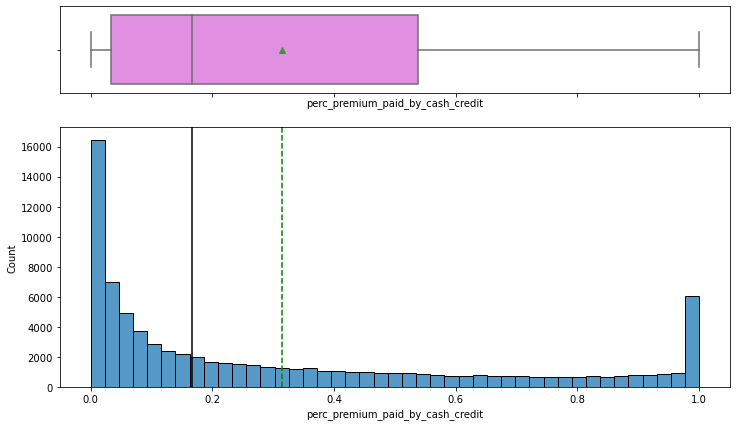

<IPython.core.display.Javascript object>

In [27]:
# a box plot of perc_premium_paid_by_cash_credit for better visualization and analysis

histogram_boxplot(data, "perc_premium_paid_by_cash_credit")

The distribution is right-skewed

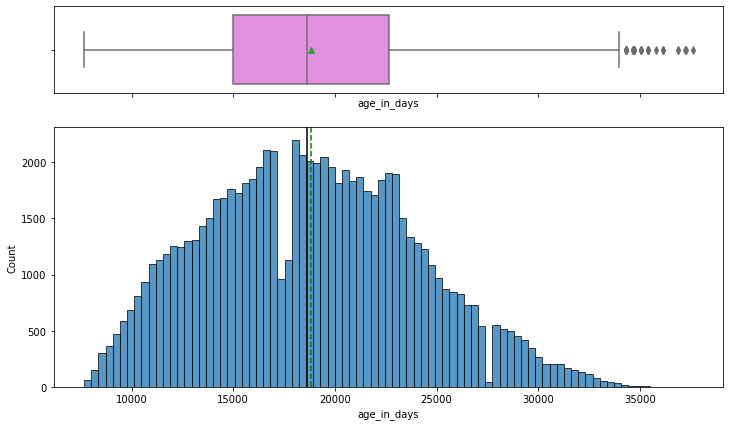

<IPython.core.display.Javascript object>

In [28]:
# a box plot of age_in_days for better visualization and analysis

histogram_boxplot(data, "age_in_days")

The distribution is normal with a large cluster around 10,000 - 28,000 days in age.

We have about 9 outliers.

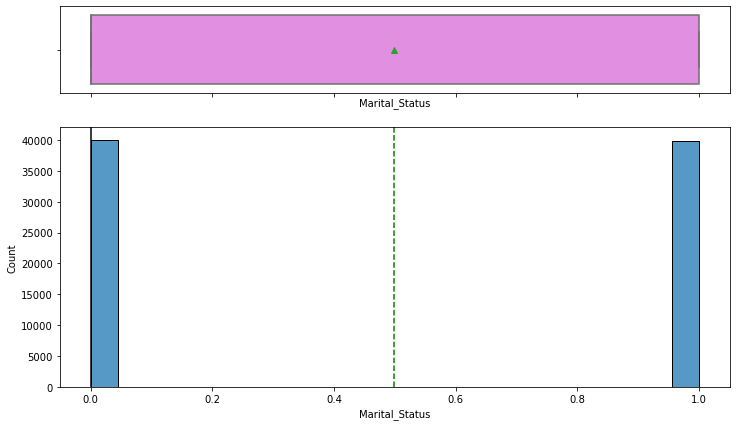

<IPython.core.display.Javascript object>

In [29]:
# a box plot of Marital Status for better visualization and analysis

histogram_boxplot(data, "Marital_Status")

The customer are evenly distributed among unmarried and married.

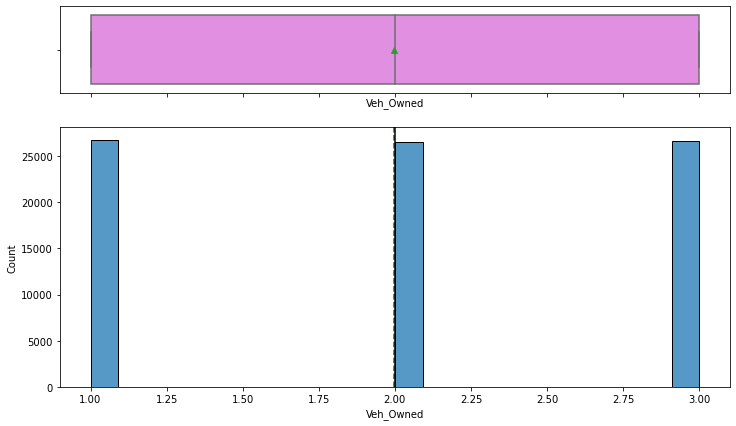

<IPython.core.display.Javascript object>

In [30]:
# a box plot of Veh_Owned for better visualization and analysis

histogram_boxplot(data, "Veh_Owned")

There is an even distribution among customers with 1, 2 and 3 cars in the dataset.

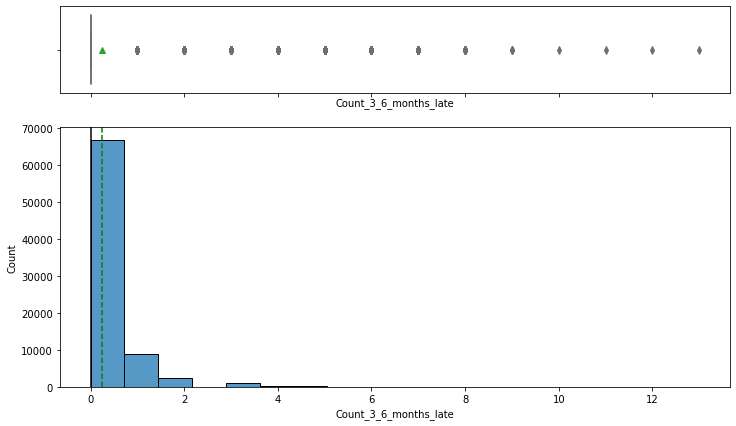

<IPython.core.display.Javascript object>

In [31]:
# a box plot of Count_3_6_months_late for better visualization and analysis

histogram_boxplot(data, "Count_3_6_months_late")

The mean and median are around 0 which shows a high number of customers without late payments of up to 3-6 months

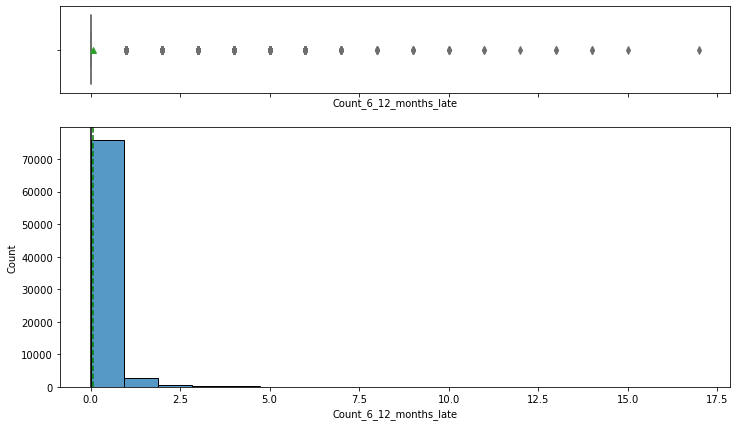

<IPython.core.display.Javascript object>

In [32]:
# a box plot of Count_6_12_months_late for better visualization and analysis

histogram_boxplot(data, "Count_6_12_months_late")

The mean and median are on 0 which shows a high number of customers without late payments of up to 6-12 months

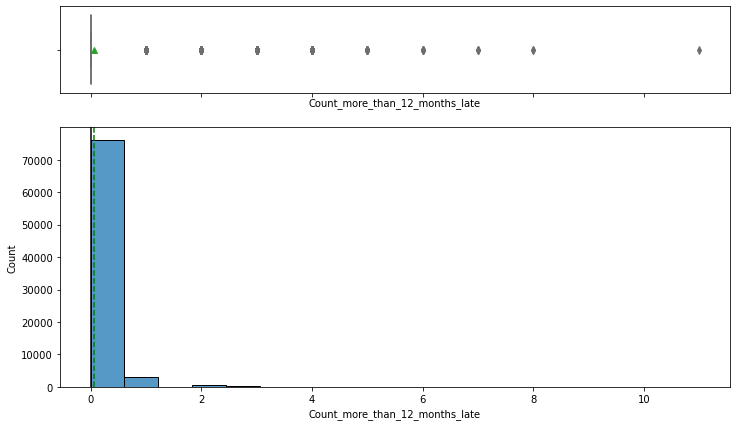

<IPython.core.display.Javascript object>

In [33]:
# a box plot of Count_more_than_12_months_late for better visualization and analysis

histogram_boxplot(data, "Count_more_than_12_months_late")

The mean and median are around 0 which shows a high number of customers without late payments of more than 12 months

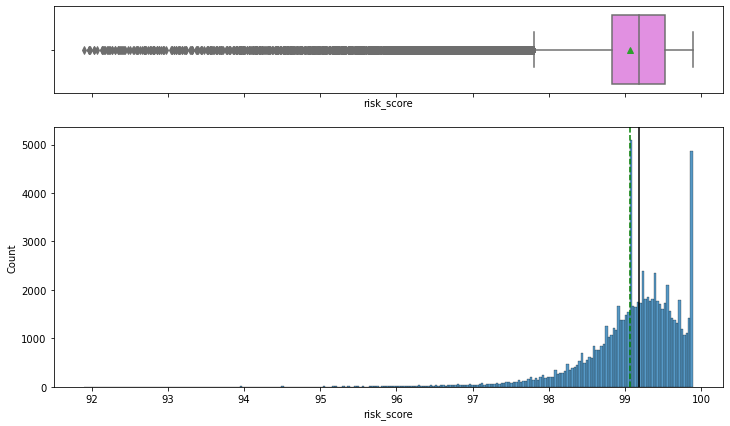

<IPython.core.display.Javascript object>

In [34]:
# a box plot of risk_score for better visualization and analysis

histogram_boxplot(data, "risk_score")

The distribution is left-skewed.

Most of the observations are clustered aound the 98-99.9 score area with the mean and median above 99.

This may have accounted for the low default in insurance payments.

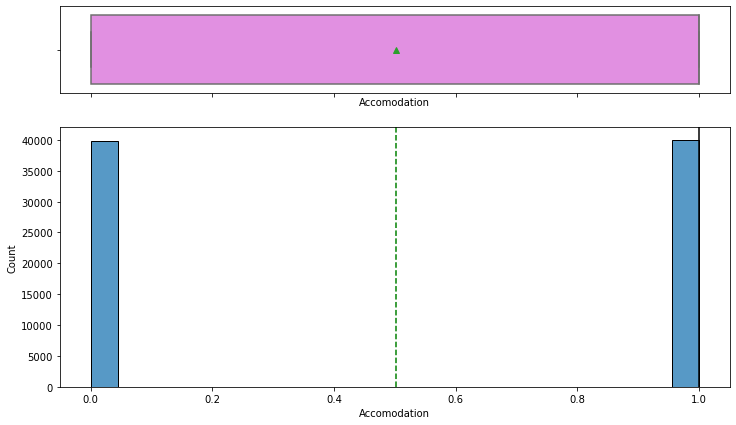

<IPython.core.display.Javascript object>

In [35]:
# a box plot of Accomodation for better visualization and analysis

histogram_boxplot(data, "Accomodation")

There is an even distribution among customers in terms of whether they live in a rented or owned property.

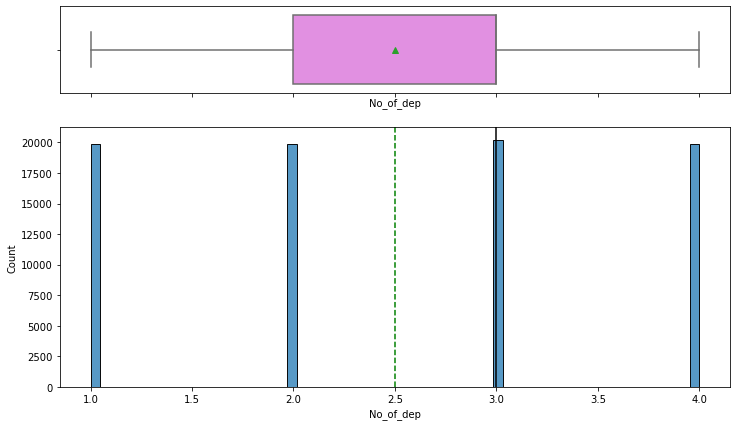

<IPython.core.display.Javascript object>

In [36]:
# a box plot of No-of_dep for better visualization and analysis

histogram_boxplot(data, "No_of_dep")

The mean and median is around 3 dependents.

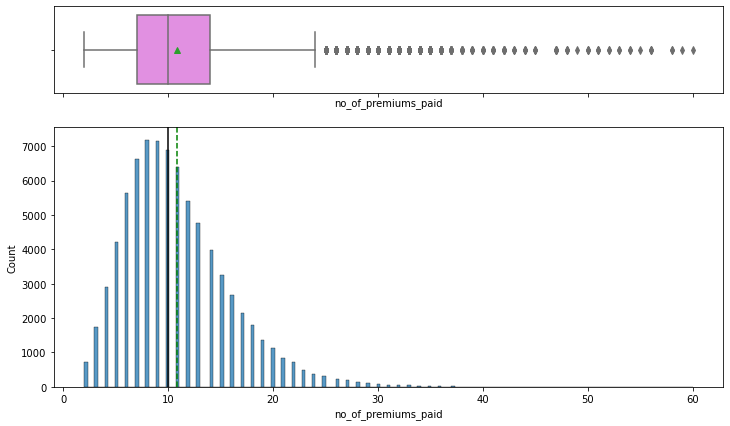

<IPython.core.display.Javascript object>

In [37]:
# a box plot of no_of_premiums_paid for better visualization and analysis

histogram_boxplot(data, "no_of_premiums_paid")

This is a normal distribution with the mean and median at approximately 10 premium payments.

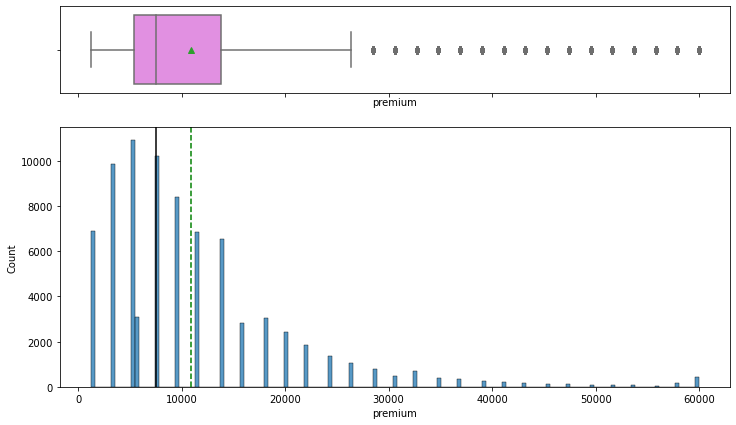

<IPython.core.display.Javascript object>

In [38]:
# a box plot of premium for better visualization and analysis

histogram_boxplot(data, "premium")

This is a normal distribution with the mean and median at around the 10,000 mark. 

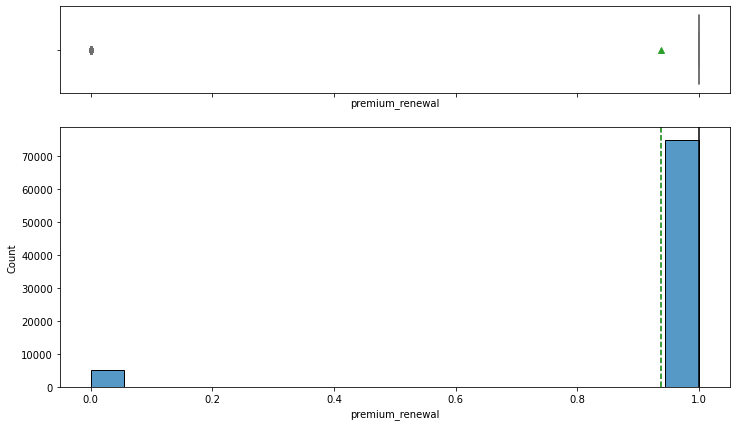

<IPython.core.display.Javascript object>

In [39]:
# a box plot of premium_renewal for better visualization and analysis

histogram_boxplot(data, "premium_renewal")

Over 70000 customers have renewed their premium

Only a small portion of the observations have not renewed their premium.

<AxesSubplot:xlabel='count', ylabel='perc_premium_paid_by_cash_credit'>

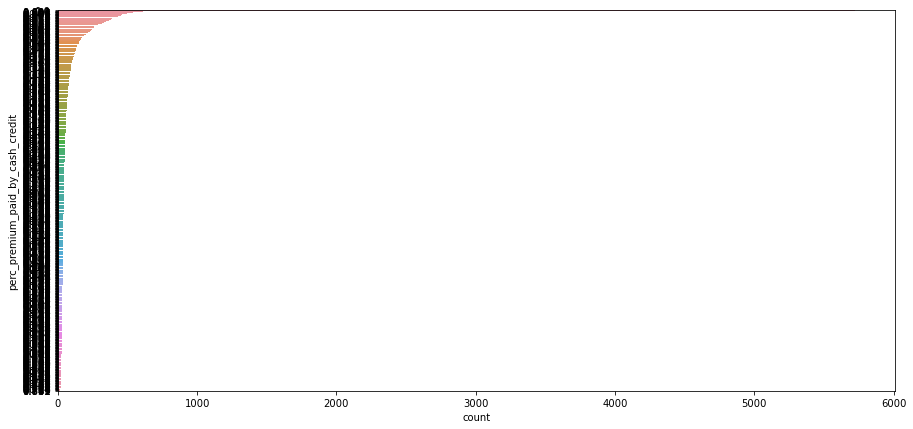

<IPython.core.display.Javascript object>

In [40]:
# a countplot of perc_premium_paid_by_cash_credit for better visualization and analysis

plt.figure(figsize=(15, 7))
sns.countplot(
    y="perc_premium_paid_by_cash_credit",
    data=data,
    order=data["perc_premium_paid_by_cash_credit"].value_counts().index,
)

<AxesSubplot:xlabel='count', ylabel='age_in_days'>

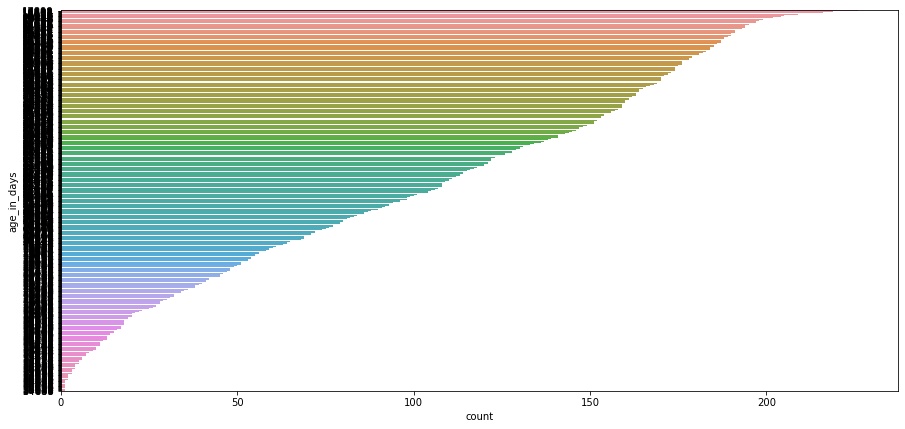

<IPython.core.display.Javascript object>

In [41]:
# a countplot of age_in_days for better visualization and analysis

plt.figure(figsize=(15, 7))
sns.countplot(
    y="age_in_days", data=data, order=data["age_in_days"].value_counts().index
)

<AxesSubplot:xlabel='count', ylabel='Income'>

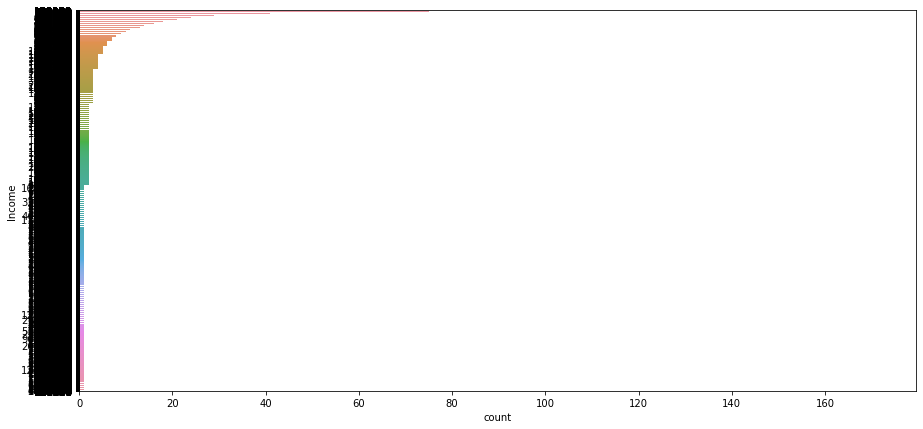

<IPython.core.display.Javascript object>

In [42]:
# a countplot of Income for better visualization and analysis

plt.figure(figsize=(15, 7))
sns.countplot(y="Income", data=data, order=data["Income"].value_counts().index)

<AxesSubplot:xlabel='count', ylabel='Marital_Status'>

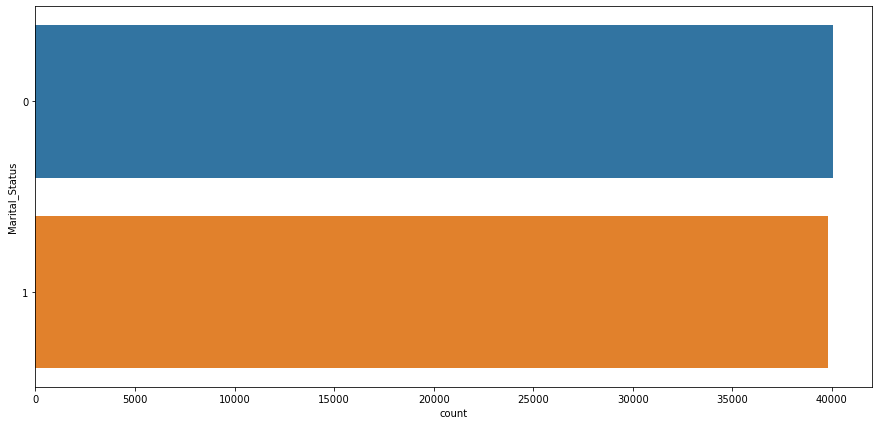

<IPython.core.display.Javascript object>

In [43]:
# a countplot of Marital Status for better visualization and analysis

plt.figure(figsize=(15, 7))
sns.countplot(
    y="Marital_Status", data=data, order=data["Marital_Status"].value_counts().index
)

There appears to be an equal count of married and unmarried persons in the dataset.

<AxesSubplot:xlabel='count', ylabel='Veh_Owned'>

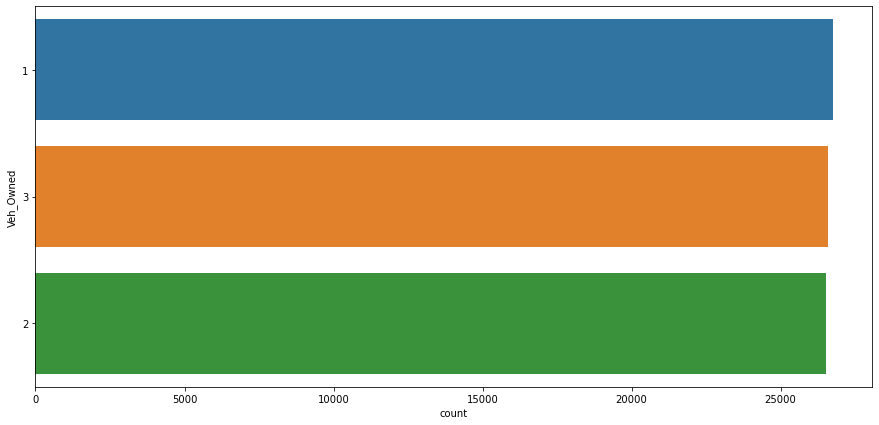

<IPython.core.display.Javascript object>

In [44]:
# a countplot of Veh_Owned for better visualization and analysis

plt.figure(figsize=(15, 7))
sns.countplot(y="Veh_Owned", data=data, order=data["Veh_Owned"].value_counts().index)

There appears to be an equal number of customers with 1, 2 and 3 cars in the dataset.

<AxesSubplot:xlabel='count', ylabel='Count_3_6_months_late'>

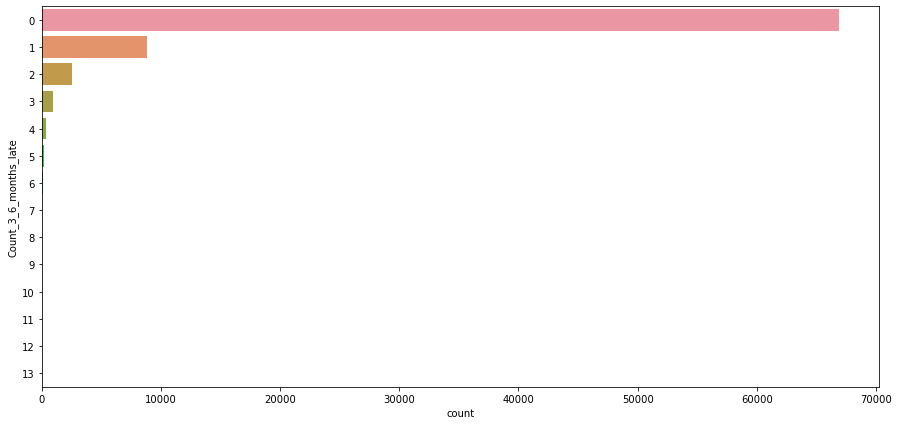

<IPython.core.display.Javascript object>

In [45]:
# a countplot of Count_3_6_months_late for better visualization and analysis

plt.figure(figsize=(15, 7))
sns.countplot(
    y="Count_3_6_months_late",
    data=data,
    order=data["Count_3_6_months_late"].value_counts().index,
)

Almost 68,000 customers in the dataset have not defaulted for as long as 3-6 months.

<AxesSubplot:xlabel='count', ylabel='Count_6_12_months_late'>

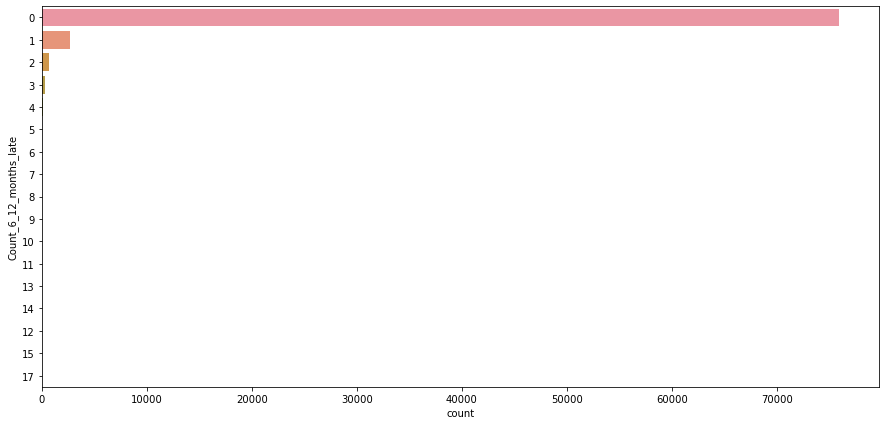

<IPython.core.display.Javascript object>

In [46]:
# a countplot of Count_6_12_months_late for better visualization and analysis

plt.figure(figsize=(15, 7))
sns.countplot(
    y="Count_6_12_months_late",
    data=data,
    order=data["Count_6_12_months_late"].value_counts().index,
)

Over 70000 customers have not defaulted for as long as 6-12 months.

<AxesSubplot:xlabel='count', ylabel='Count_more_than_12_months_late'>

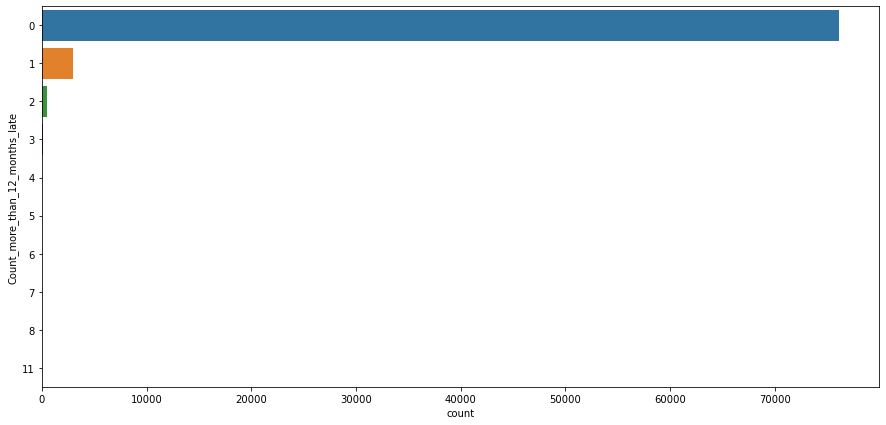

<IPython.core.display.Javascript object>

In [47]:
# a countplot of Count_more_than_12_months_late for better visualization and analysis

plt.figure(figsize=(15, 7))
sns.countplot(
    y="Count_more_than_12_months_late",
    data=data,
    order=data["Count_more_than_12_months_late"].value_counts().index,
)

Over 70000 customers have not defaulted for more than 12 months long.

<AxesSubplot:xlabel='count', ylabel='No_of_dep'>

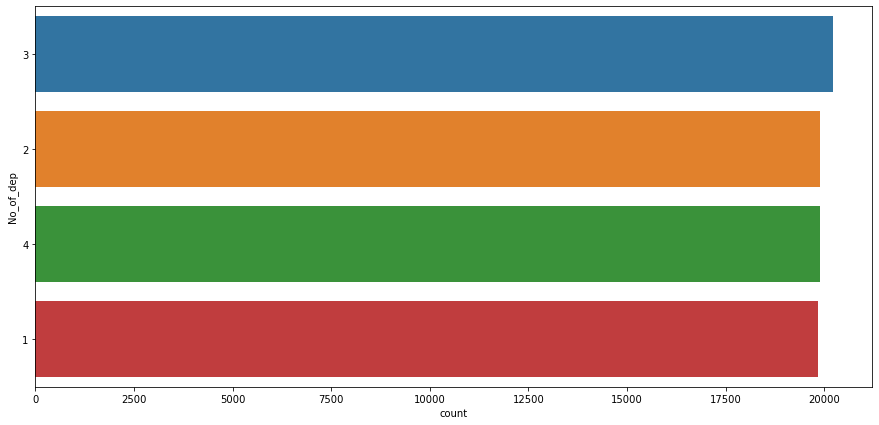

<IPython.core.display.Javascript object>

In [48]:
# a countplot of Count_3_6_months_late for better visualization and analysis

plt.figure(figsize=(15, 7))
sns.countplot(y="No_of_dep", data=data, order=data["No_of_dep"].value_counts().index)

Customers who have 3 dependents are the predominant category.

<AxesSubplot:xlabel='count', ylabel='Accomodation'>

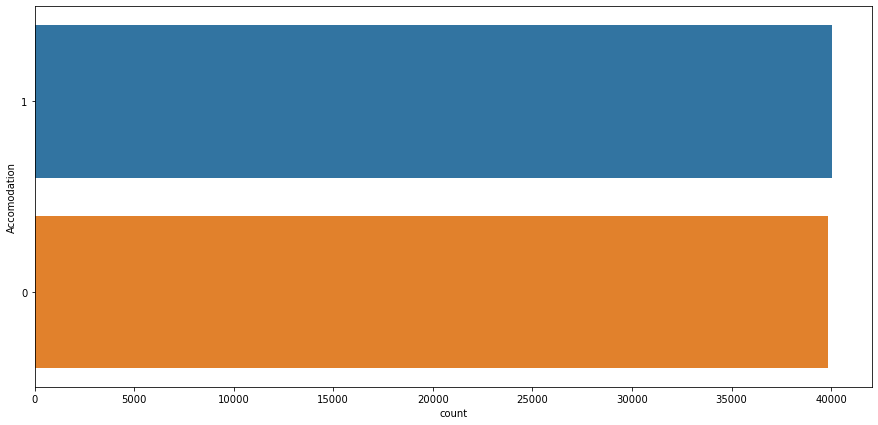

<IPython.core.display.Javascript object>

In [49]:
# a countplot on Accomodation for better visualization and analysis

plt.figure(figsize=(15, 7))
sns.countplot(
    y="Accomodation", data=data, order=data["Accomodation"].value_counts().index
)

<AxesSubplot:xlabel='count', ylabel='no_of_premiums_paid'>

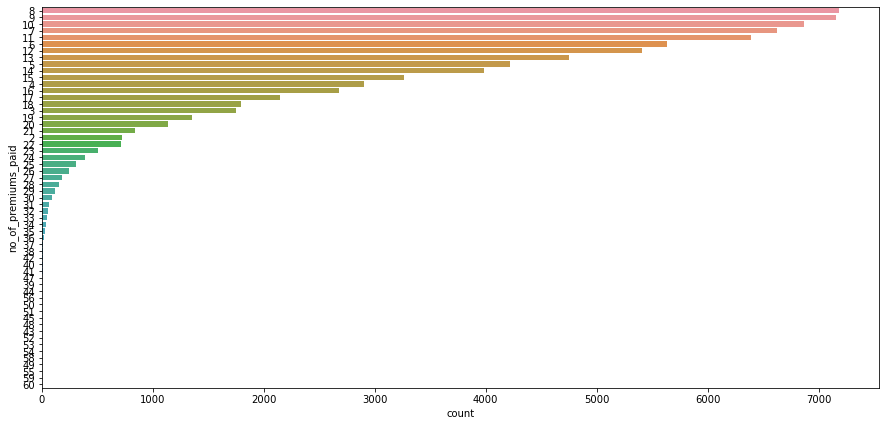

<IPython.core.display.Javascript object>

In [50]:
# a countplot of n0_of_premiums_paid for better visualization and analysis

plt.figure(figsize=(15, 7))
sns.countplot(
    y="no_of_premiums_paid",
    data=data,
    order=data["no_of_premiums_paid"].value_counts().index,
)

Customers who have made 8 premium payments are the predominant category in the dataset followed by those who have made 10, 7 and 11 payments. 

<AxesSubplot:xlabel='count', ylabel='sourcing_channel'>

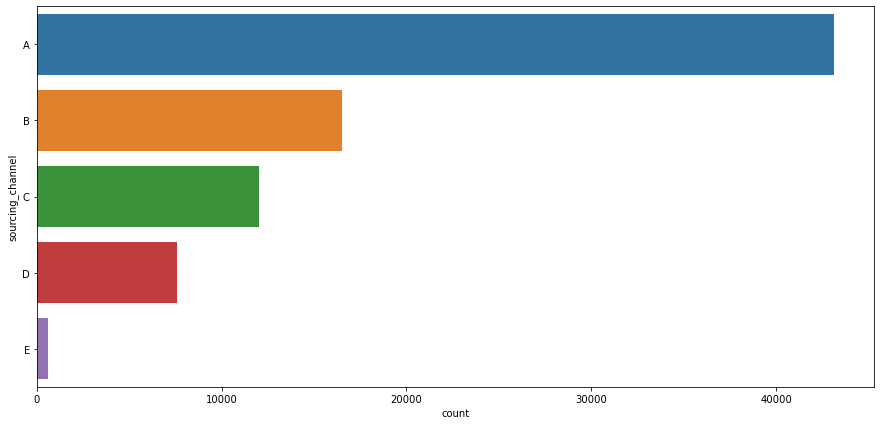

<IPython.core.display.Javascript object>

In [51]:
# a countplot of sourcing_channel for better visualization and analysis

plt.figure(figsize=(15, 7))
sns.countplot(
    y="sourcing_channel", data=data, order=data["sourcing_channel"].value_counts().index
)

Channel A is the predominant sourcing channel in the dataset.

<AxesSubplot:xlabel='count', ylabel='residence_area_type'>

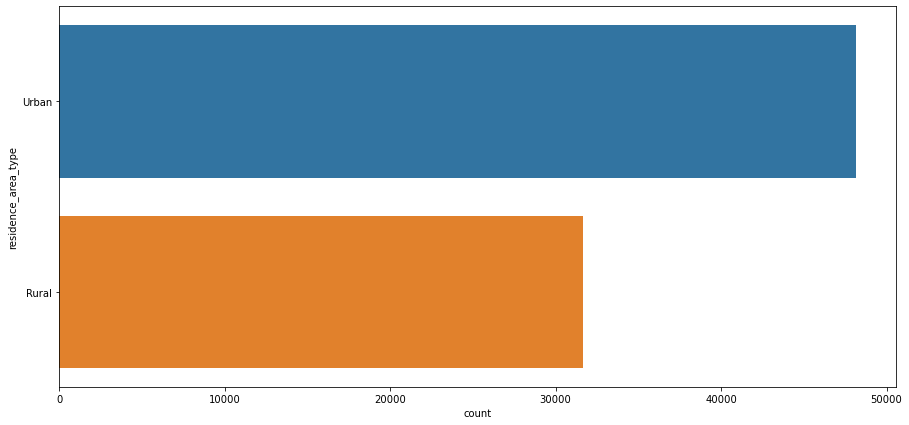

<IPython.core.display.Javascript object>

In [52]:
# a count plot of residence_area_type for better visualization and analysis

plt.figure(figsize=(15, 7))
sns.countplot(
    y="residence_area_type",
    data=data,
    order=data["residence_area_type"].value_counts().index,
)

There are more urban dwellers in the dataset than rural dwellers.

<AxesSubplot:xlabel='count', ylabel='premium'>

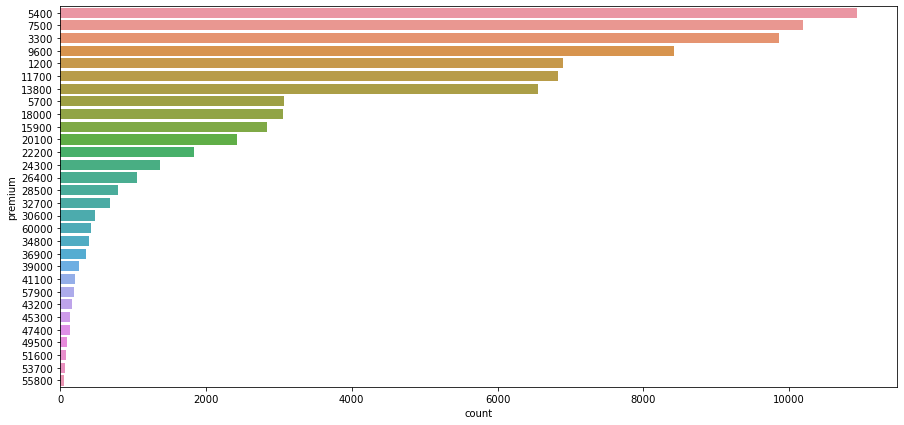

<IPython.core.display.Javascript object>

In [53]:
# a count plot of premium for better visualization and analysis

plt.figure(figsize=(15, 7))
sns.countplot(
    y="premium", data=data, order=data["premium"].value_counts().index,
)

5,400 is the predominant premium amount with over 10,000 paying 5,400 followed by 7,500 and 3,300.

<AxesSubplot:xlabel='count', ylabel='premium_renewal'>

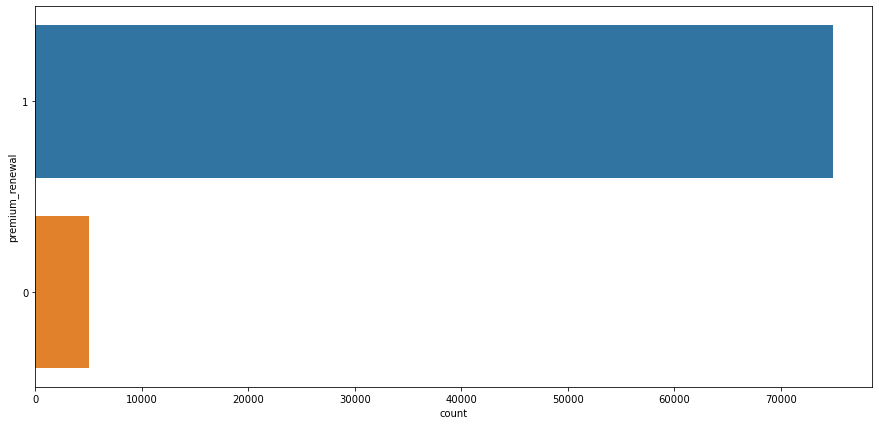

<IPython.core.display.Javascript object>

In [54]:
# a countplot of premium_renewal for better visualization and analysis

plt.figure(figsize=(15, 7))
sns.countplot(
    y="premium_renewal", data=data, order=data["premium_renewal"].value_counts().index
)

A small portion of the dataset are defaulting in premium payments. There is a need to mitigate these defaults and ensure that more customers do not slip into this bucket.

In [55]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=True, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

<IPython.core.display.Javascript object>

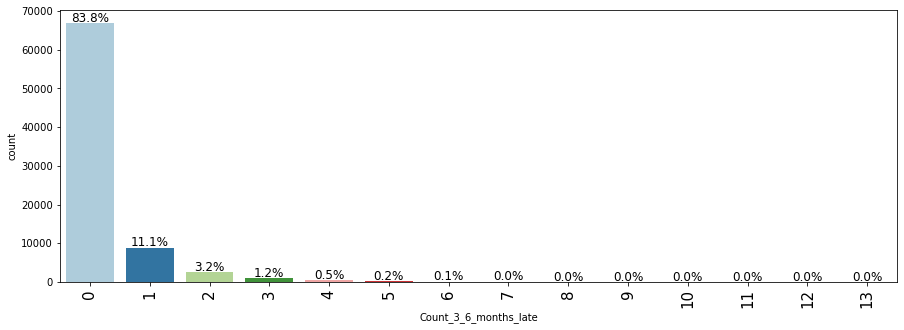

<IPython.core.display.Javascript object>

In [56]:
# a barplot of Count_3_6_months_late for better visualization and analysis

labeled_barplot(data, "Count_3_6_months_late")

83.8% of the customers in the dataset have not defaulted for up to 3-6 months long.

11.1% of the customers in the dataset have defaulted once for up to 3 to 6 months long.

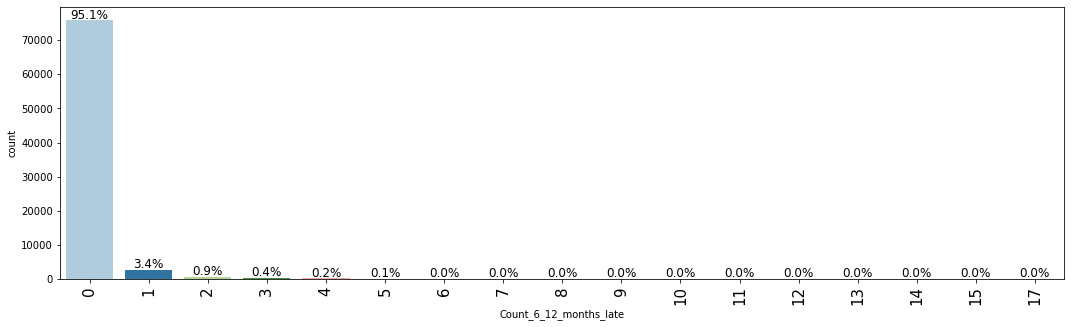

<IPython.core.display.Javascript object>

In [57]:
# a barplot of Count_6_12_months_late for better visualization and analysis

labeled_barplot(data, "Count_6_12_months_late")

95.1% of the customers in the dataset have not defaulted for up to 6-12 months long.

3.4% of the customers in the dataset have defaulted once for up to 6 to 12 months long.

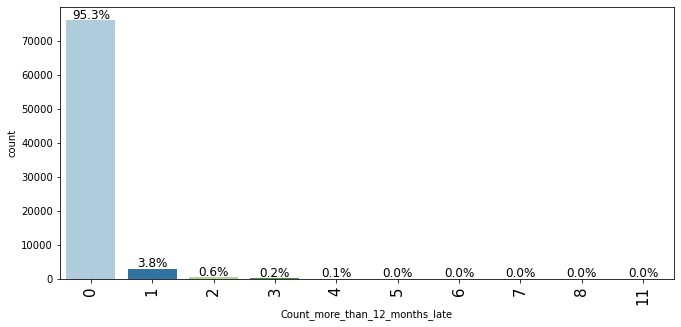

<IPython.core.display.Javascript object>

In [58]:
# a barplot of Count_more_than_12_months_late for better visualization and analysis

labeled_barplot(data, "Count_more_than_12_months_late")

95.3% of the customers have not defaulted for more than 12 months long.

3.8% of customers in the dataset have defaulted once for more than 12 months long.

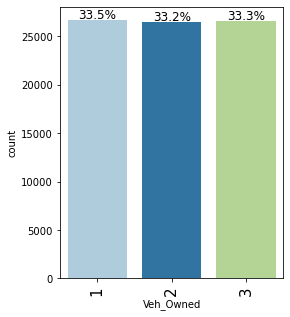

<IPython.core.display.Javascript object>

In [59]:
# a barplot of Veh_Owned for better visualization and analysis

labeled_barplot(data, "Veh_Owned")

Customers who owned 1, 2 and 3 cars are almost of the same percentage (33%)

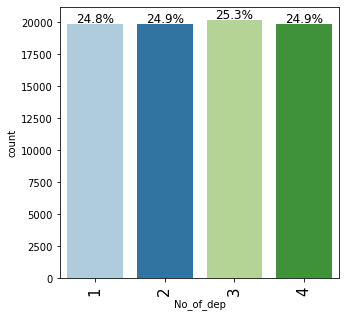

<IPython.core.display.Javascript object>

In [60]:
# a barplot of No_of_dep for better visualization and analysis

labeled_barplot(data, "No_of_dep")

Customers with 1,2,3 and 4 dependents are almost of equal measure in the dataset with 3 dependents been slightly higher (25.3%) 

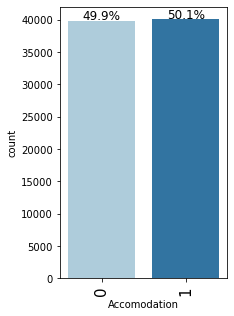

<IPython.core.display.Javascript object>

In [61]:
# a barplot of Accomodation for better visualization and analysis

labeled_barplot(data, "Accomodation")

Customers who owned or rent their accomodation are most of equal percentage with home owners been slightly higher (50.1%)

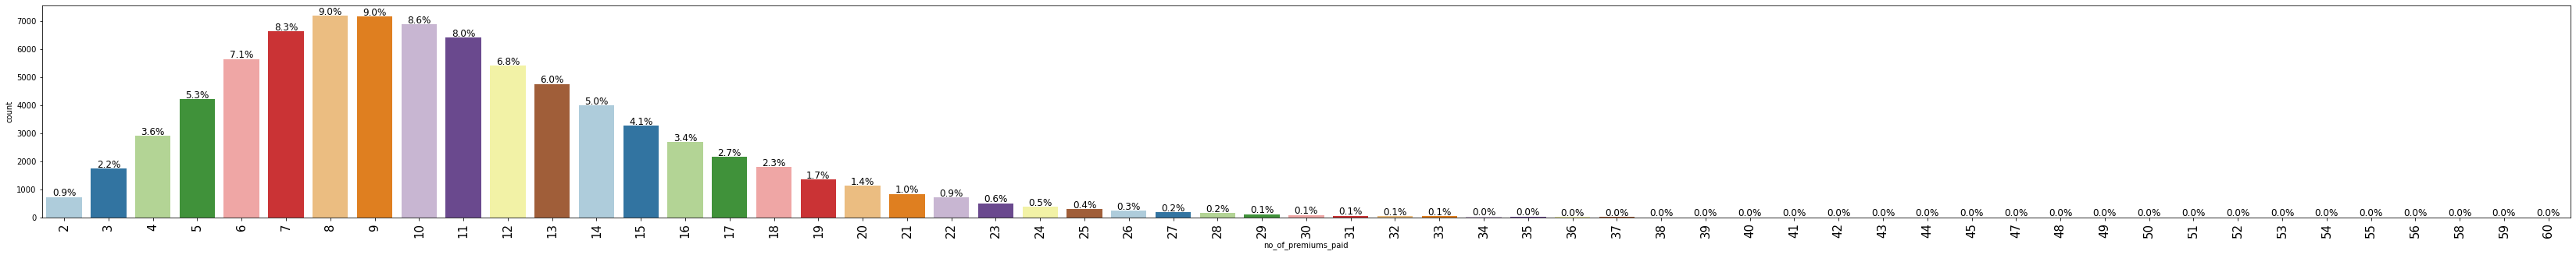

<IPython.core.display.Javascript object>

In [62]:
# a barplot of no_of_premiums_paid for better visualization and analysis

labeled_barplot(data, "no_of_premiums_paid")

Customers who have made 8 or 9 premium payments have the highest percentage (9%)
68.8% of the customers have made 12 or less payments till date which shows that most of the customers are new customers with total payments made in the last 1 year.

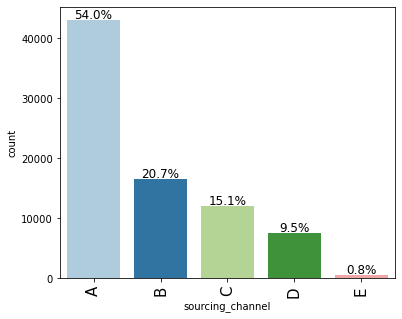

<IPython.core.display.Javascript object>

In [63]:
# a barplot of sourcing_channel for better visualization and analysis

labeled_barplot(data, "sourcing_channel")

54% of the customers in the dataset were sourced from channel A

Channel E has the least (0.8%)

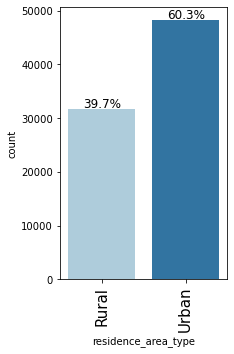

<IPython.core.display.Javascript object>

In [64]:
# a barplot of residence_area_type for better visualization and analysis

labeled_barplot(data, "residence_area_type")

60.3% of customers in the dataset are urban dwellers.

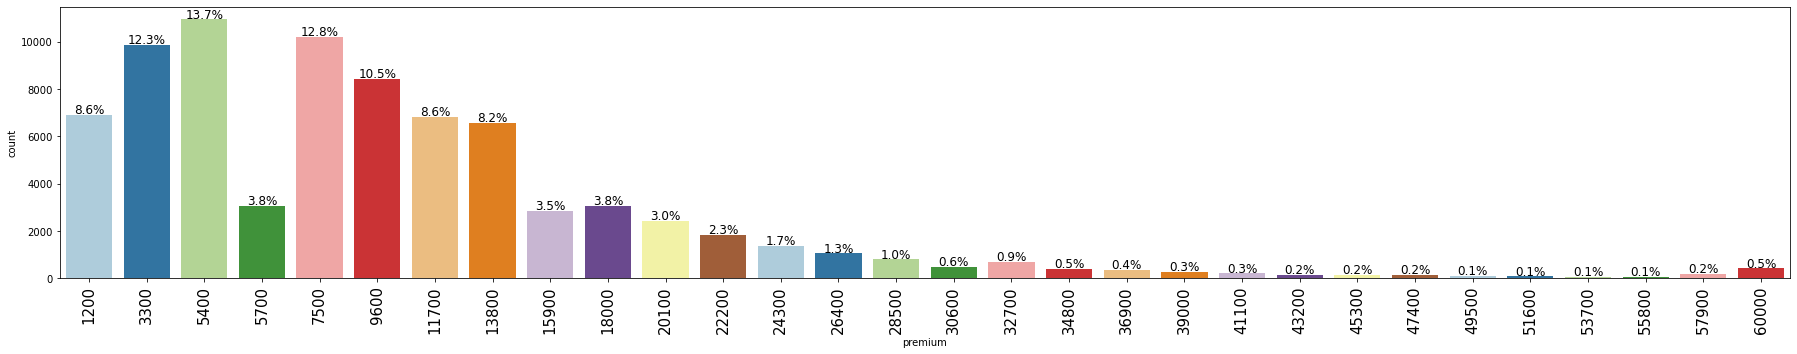

<IPython.core.display.Javascript object>

In [65]:
# a barplot of premium for better visualization and analysis

labeled_barplot(data, "premium")

13.7% of the policy holders pay monthly premium of 5,400 followed by 7,500 (12.8%) and 3,300 (12.3%).
High-paying premium amounts (over 30,000) constitute less than 1% of the dataset per amount.

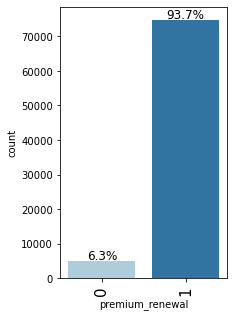

<IPython.core.display.Javascript object>

In [66]:
# a barplot of premium_renewal for better visualization and analysis

labeled_barplot(data, "premium_renewal")

93.7% of the customers in the dataset have renewed their premiums

# Bivariate analysis

These boxplots show any relationships between 2 variables

<AxesSubplot:xlabel='Count_3_6_months_late', ylabel='perc_premium_paid_by_cash_credit'>

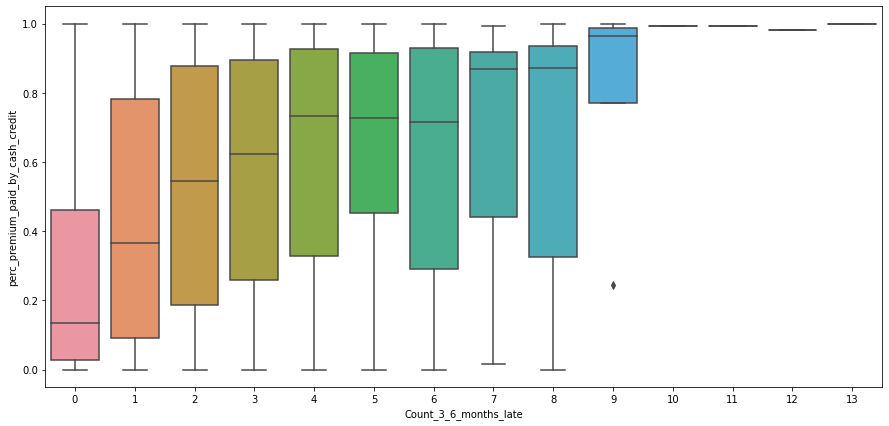

<IPython.core.display.Javascript object>

In [67]:
plt.figure(figsize=(15, 7))
sns.boxplot(x="Count_3_6_months_late", y="perc_premium_paid_by_cash_credit", data=data)

Customers who make cash payments have a high percentage of defaults.

The higher the percentage of premium paid by cash credit, the higher the count of late premium payments for up to 3 to 6 months long.

<AxesSubplot:xlabel='Count_3_6_months_late', ylabel='age_in_days'>

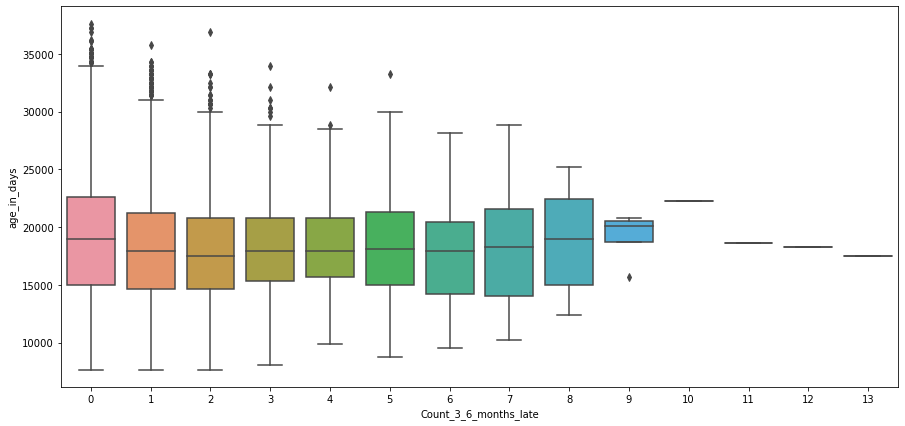

<IPython.core.display.Javascript object>

In [68]:
plt.figure(figsize=(15, 7))
sns.boxplot(x="Count_3_6_months_late", y="age_in_days", data=data)

Age does not appear to play a significant role in premium default for defaulters of between 3-6 months

<AxesSubplot:xlabel='Count_3_6_months_late', ylabel='Marital_Status'>

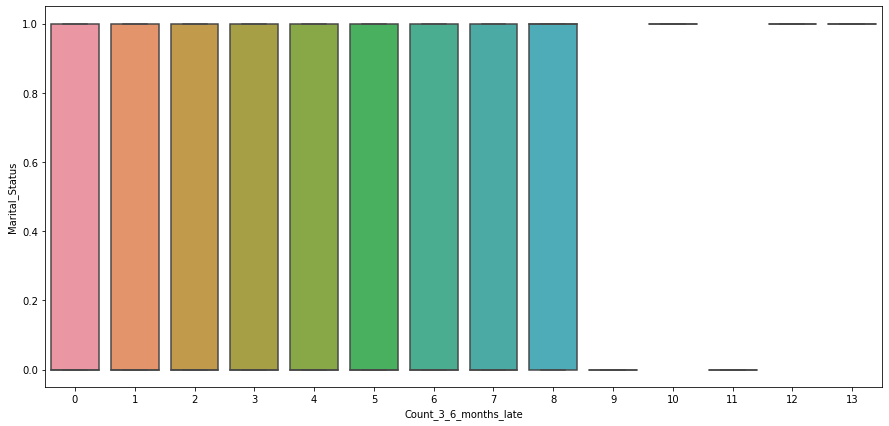

<IPython.core.display.Javascript object>

In [69]:
plt.figure(figsize=(15, 7))
sns.boxplot(x="Count_3_6_months_late", y="Marital_Status", data=data)

Marital Status does not appear to play a significant role in premium default for defaulters of between 3-6 months

<AxesSubplot:xlabel='Count_3_6_months_late', ylabel='Veh_Owned'>

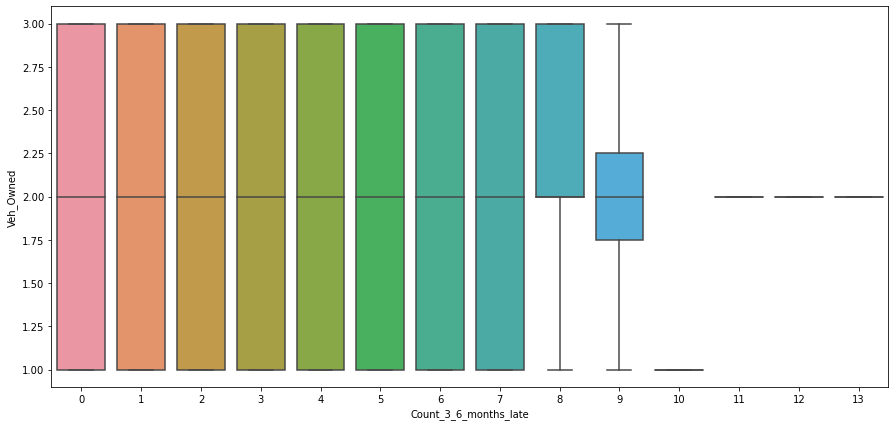

<IPython.core.display.Javascript object>

In [70]:
plt.figure(figsize=(15, 7))
sns.boxplot(x="Count_3_6_months_late", y="Veh_Owned", data=data)

Veh_Owned does not appear to play a significant role in premium default for defaulters of between 3-6 months

<AxesSubplot:xlabel='Count_3_6_months_late', ylabel='risk_score'>

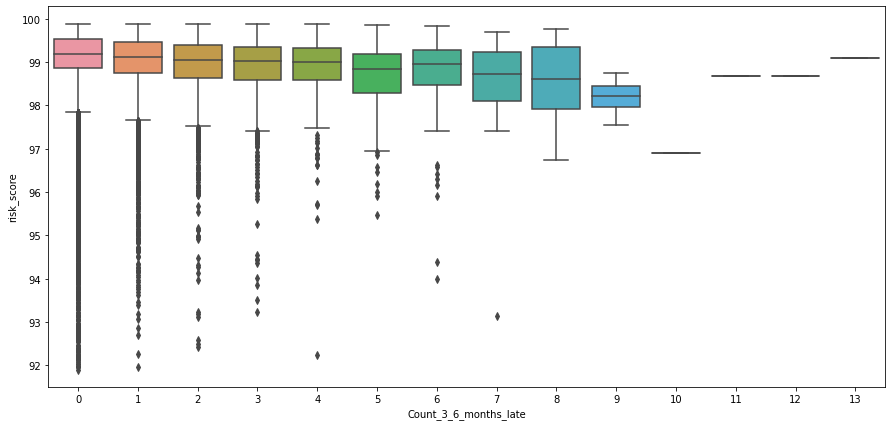

<IPython.core.display.Javascript object>

In [71]:
plt.figure(figsize=(15, 7))
sns.boxplot(x="Count_3_6_months_late", y="risk_score", data=data)

Customers with high risk scores were less likely to default.

The likelihood of default increased as the risk score reduced.

<AxesSubplot:xlabel='Count_3_6_months_late', ylabel='Accomodation'>

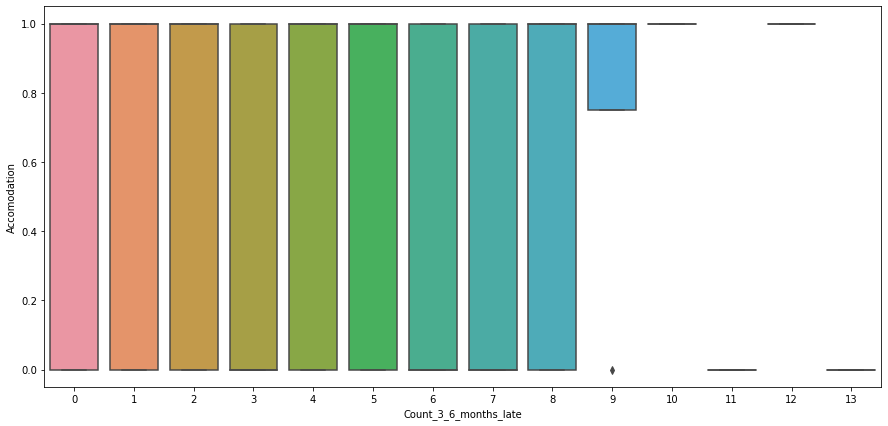

<IPython.core.display.Javascript object>

In [72]:
plt.figure(figsize=(15, 7))
sns.boxplot(x="Count_3_6_months_late", y="Accomodation", data=data)

Accomodation does not appear to play a significant role in premium default for defaulters of between 3-6 months

<AxesSubplot:xlabel='Count_3_6_months_late', ylabel='no_of_premiums_paid'>

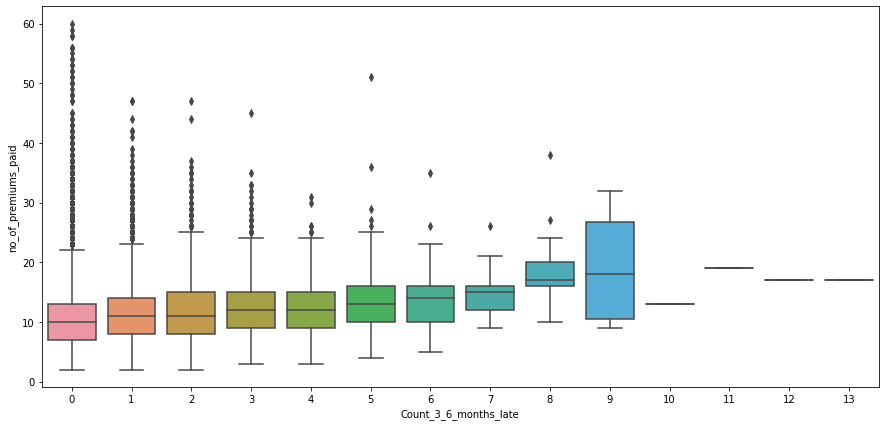

<IPython.core.display.Javascript object>

In [73]:
plt.figure(figsize=(15, 7))
sns.boxplot(x="Count_3_6_months_late", y="no_of_premiums_paid", data=data)

New customers with lower number of premium paid were more likely to default

<AxesSubplot:xlabel='Count_3_6_months_late', ylabel='sourcing_channel'>

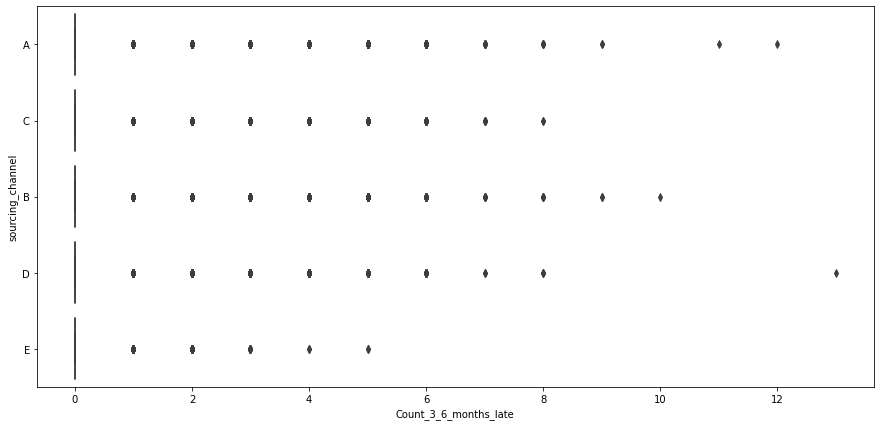

<IPython.core.display.Javascript object>

In [74]:
plt.figure(figsize=(15, 7))
sns.boxplot(x="Count_3_6_months_late", y="sourcing_channel", data=data)

Customers sourced from channel E had fewer defaults but this may be due to the low count of customers in this category compared to channel A which has the highest count.

<AxesSubplot:xlabel='Count_3_6_months_late', ylabel='residence_area_type'>

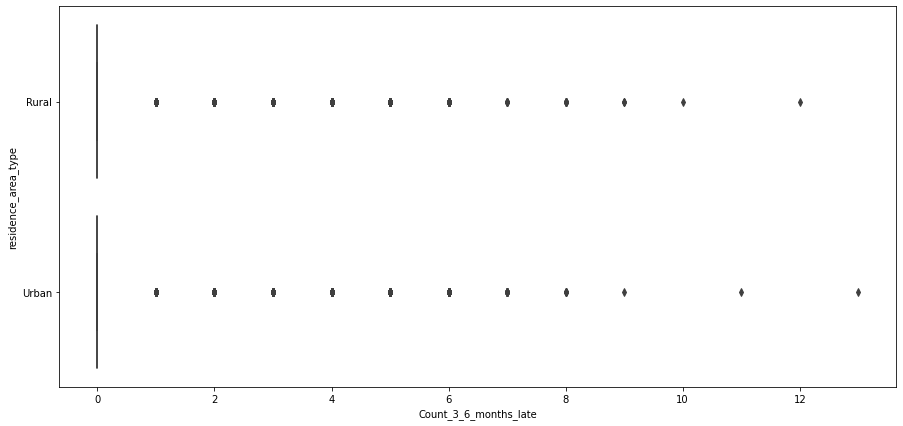

<IPython.core.display.Javascript object>

In [75]:
plt.figure(figsize=(15, 7))
sns.boxplot(x="Count_3_6_months_late", y="residence_area_type", data=data)

Residence_area_type does not appear to be a major factor in premium default.

<AxesSubplot:xlabel='Count_3_6_months_late', ylabel='premium'>

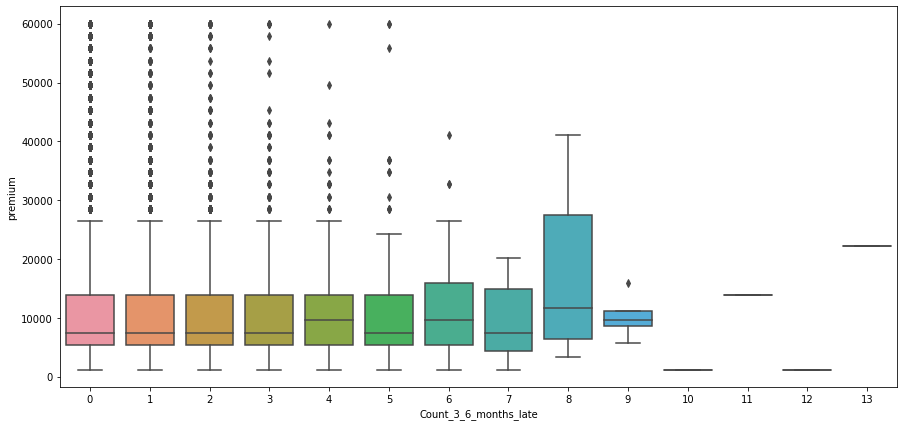

<IPython.core.display.Javascript object>

In [76]:
plt.figure(figsize=(15, 7))
sns.boxplot(x="Count_3_6_months_late", y="premium", data=data)

Most high premium-paying policy holders (30k and above) pay within 6 months. 

<AxesSubplot:xlabel='Count_6_12_months_late', ylabel='perc_premium_paid_by_cash_credit'>

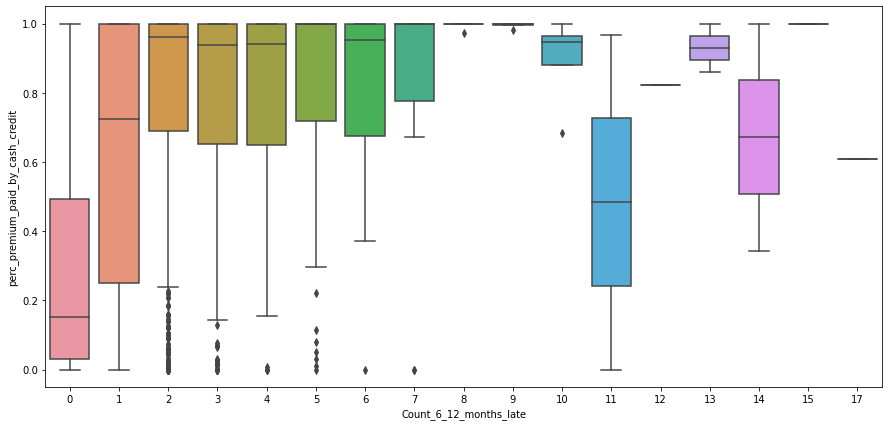

<IPython.core.display.Javascript object>

In [77]:
plt.figure(figsize=(15, 7))
sns.boxplot(x="Count_6_12_months_late", y="perc_premium_paid_by_cash_credit", data=data)

Customers who make cash payments have a high percentage of defaults.

The higher the percentage of premium paid by cash credit, the higher the count of late premium payments for up to 6 to 12 months long.

<AxesSubplot:xlabel='Count_6_12_months_late', ylabel='age_in_days'>

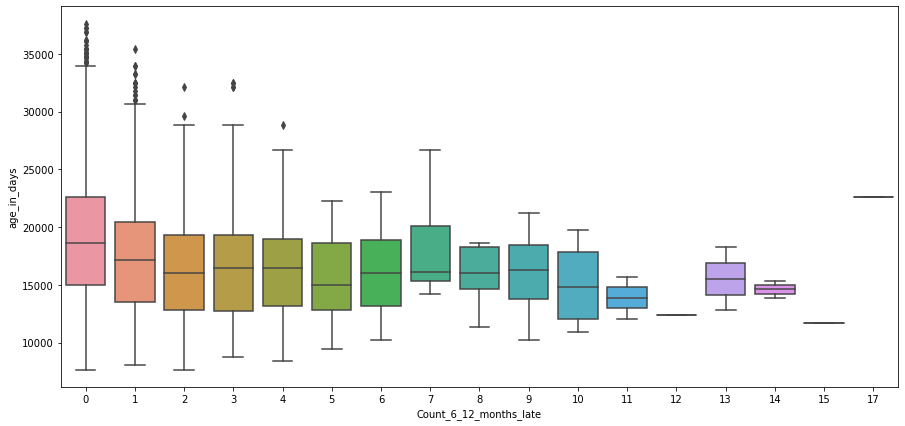

<IPython.core.display.Javascript object>

In [78]:
plt.figure(figsize=(15, 7))
sns.boxplot(x="Count_6_12_months_late", y="age_in_days", data=data)

Younger customers appeared to default more as the count of late payments increased as the age reduced. 

<AxesSubplot:xlabel='Count_6_12_months_late', ylabel='Veh_Owned'>

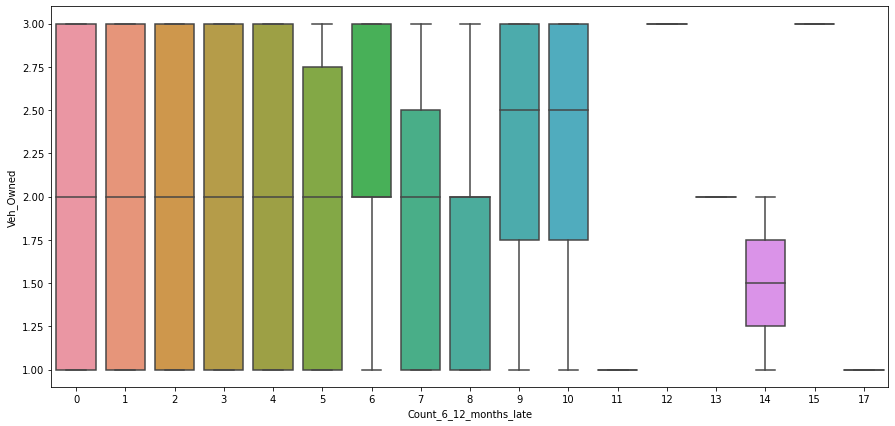

<IPython.core.display.Javascript object>

In [79]:
plt.figure(figsize=(15, 7))
sns.boxplot(x="Count_6_12_months_late", y="Veh_Owned", data=data)

Veh_Owned does not appear to be a major factor in premium default.

<AxesSubplot:xlabel='Count_6_12_months_late', ylabel='risk_score'>

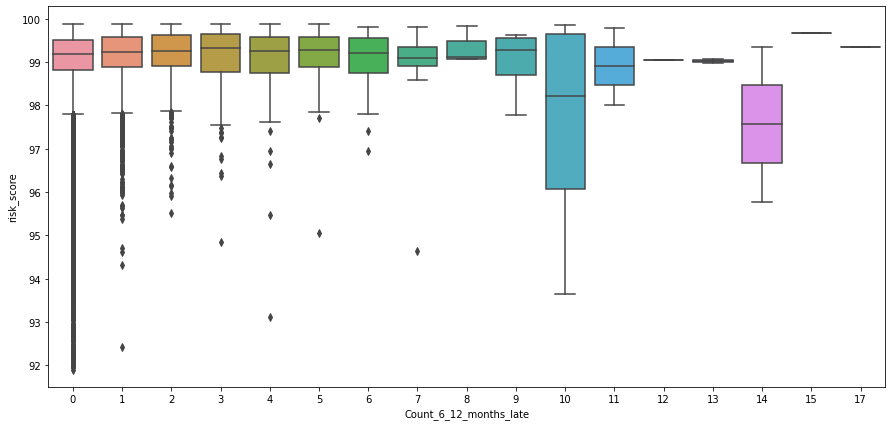

<IPython.core.display.Javascript object>

In [80]:
plt.figure(figsize=(15, 7))
sns.boxplot(x="Count_6_12_months_late", y="risk_score", data=data)

The count of defaults increased as the risk score reduced which implies that the higher the risk score, the less likely that the customer would default.

<AxesSubplot:xlabel='Count_6_12_months_late', ylabel='No_of_dep'>

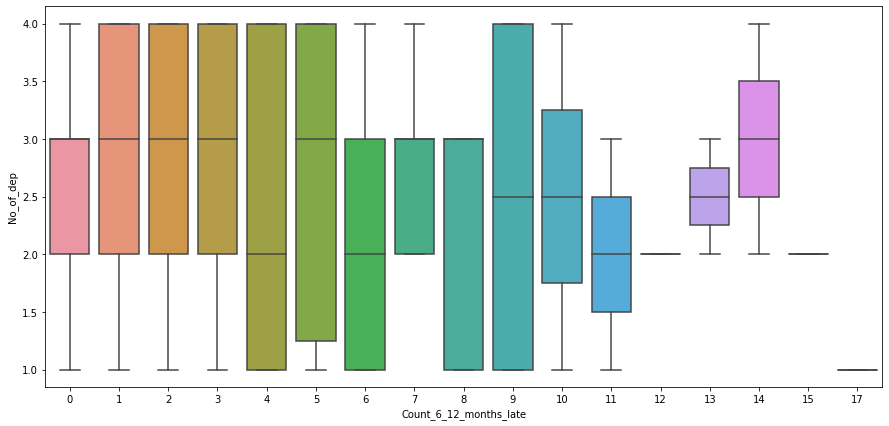

<IPython.core.display.Javascript object>

In [81]:
plt.figure(figsize=(15, 7))
sns.boxplot(x="Count_6_12_months_late", y="No_of_dep", data=data)

Customers with 2 or more dependents are more likely to default.

<AxesSubplot:xlabel='Count_6_12_months_late', ylabel='Accomodation'>

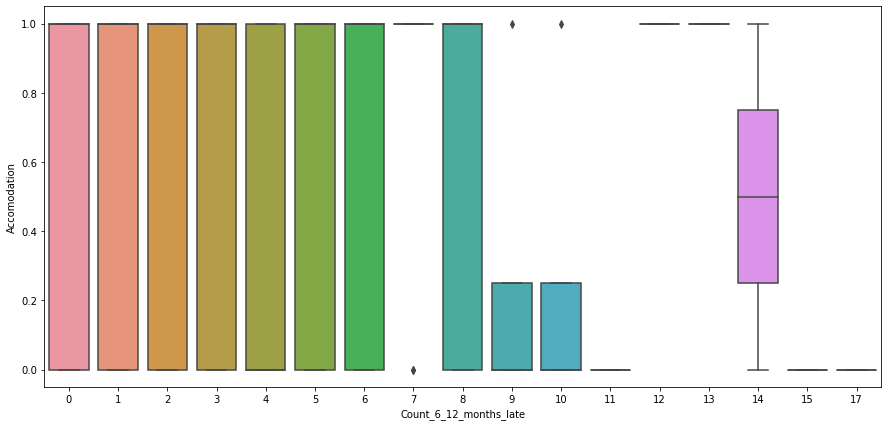

<IPython.core.display.Javascript object>

In [82]:
plt.figure(figsize=(15, 7))
sns.boxplot(x="Count_6_12_months_late", y="Accomodation", data=data)

Accomodation type does not appear to be a major factor in premium defaults.

<AxesSubplot:xlabel='Count_6_12_months_late', ylabel='no_of_premiums_paid'>

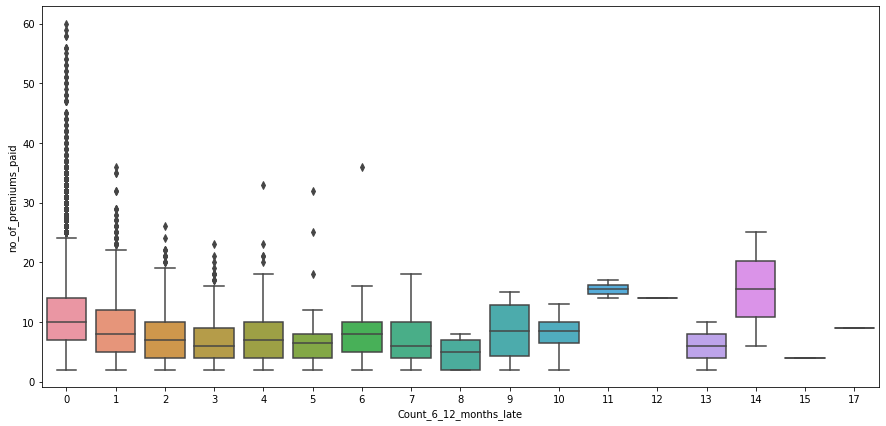

<IPython.core.display.Javascript object>

In [83]:
plt.figure(figsize=(15, 7))
sns.boxplot(x="Count_6_12_months_late", y="no_of_premiums_paid", data=data)

The high premium defaulters are predominantly customers with lower number of premiums paid

<AxesSubplot:xlabel='Count_6_12_months_late', ylabel='sourcing_channel'>

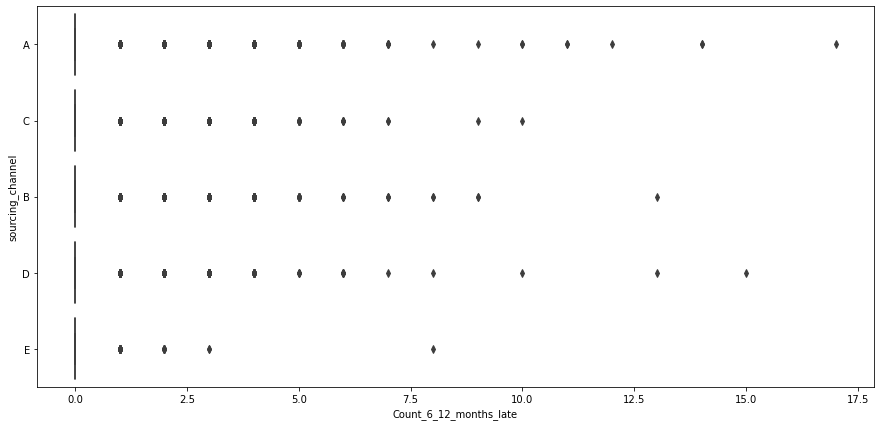

<IPython.core.display.Javascript object>

In [84]:
plt.figure(figsize=(15, 7))
sns.boxplot(x="Count_6_12_months_late", y="sourcing_channel", data=data)

Customers sourced from channel E had fewer defaults but this may be due to the low count of customers in this category compared to channel A which has the highest count.

<AxesSubplot:xlabel='Count_6_12_months_late', ylabel='residence_area_type'>

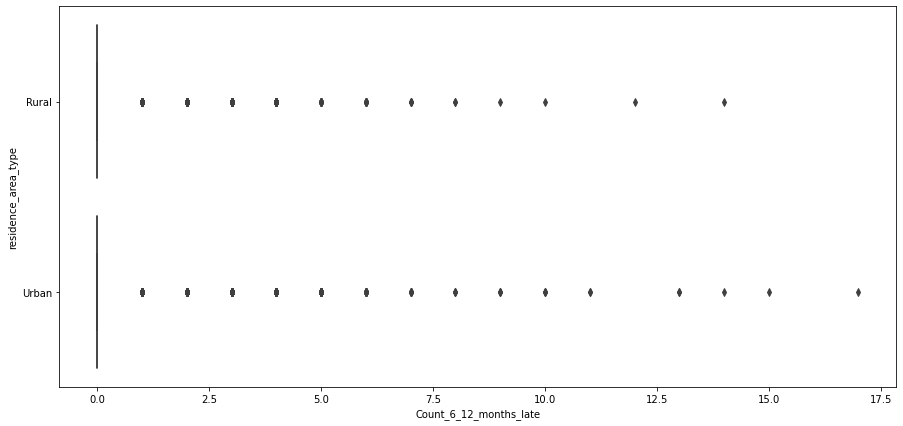

<IPython.core.display.Javascript object>

In [85]:
plt.figure(figsize=(15, 7))
sns.boxplot(x="Count_6_12_months_late", y="residence_area_type", data=data)

Residence_area_type does not appear to be a major factor in premium default.

<AxesSubplot:xlabel='Count_6_12_months_late', ylabel='premium'>

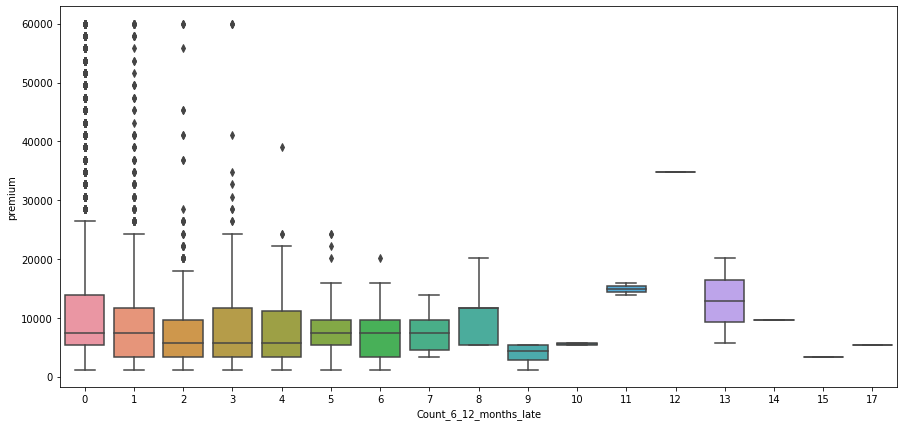

<IPython.core.display.Javascript object>

In [86]:
plt.figure(figsize=(15, 7))
sns.boxplot(x="Count_6_12_months_late", y="premium", data=data)

High premium payers don't pay premiums later than 6 months

<AxesSubplot:xlabel='Count_more_than_12_months_late', ylabel='perc_premium_paid_by_cash_credit'>

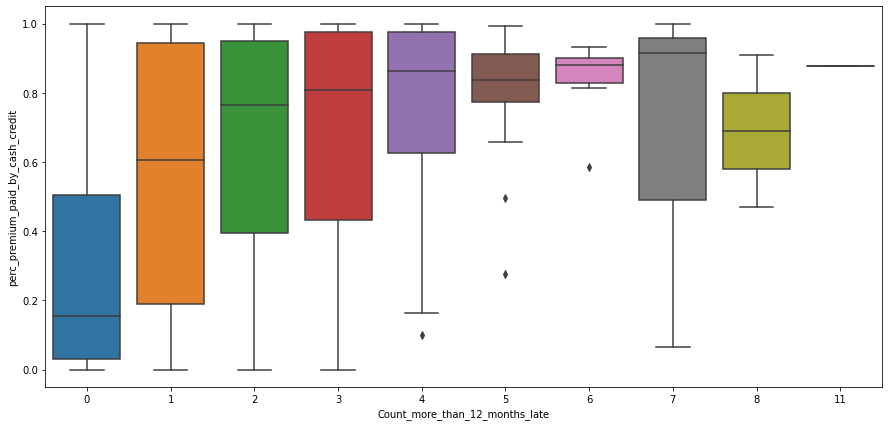

<IPython.core.display.Javascript object>

In [87]:
plt.figure(figsize=(15, 7))
sns.boxplot(
    x="Count_more_than_12_months_late", y="perc_premium_paid_by_cash_credit", data=data
)

The likelihood of premium default is higher as the percentage of premium paid as cash payments increases.

<AxesSubplot:xlabel='Count_more_than_12_months_late', ylabel='age_in_days'>

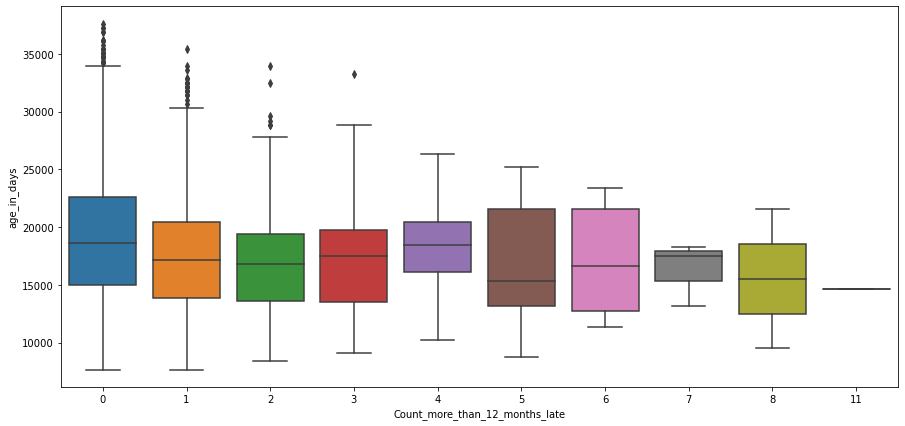

<IPython.core.display.Javascript object>

In [88]:
plt.figure(figsize=(15, 7))
sns.boxplot(x="Count_more_than_12_months_late", y="age_in_days", data=data)

Younger customers appeared to default more as the count of late payments increased as the age reduced.

<AxesSubplot:xlabel='Count_more_than_12_months_late', ylabel='Marital_Status'>

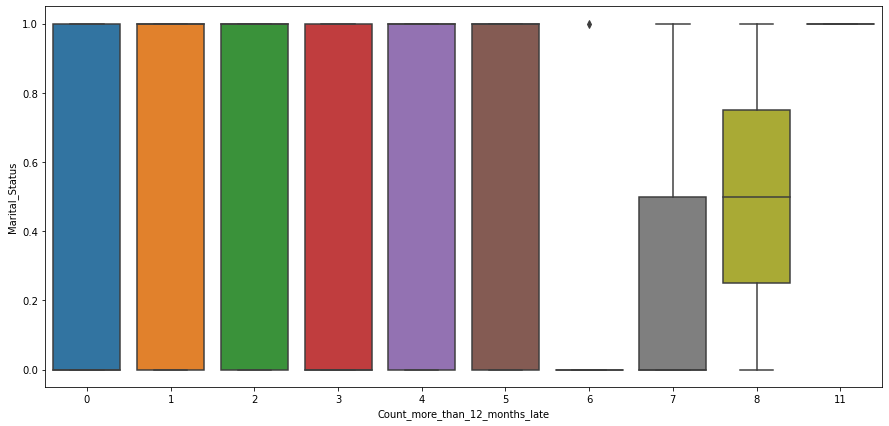

<IPython.core.display.Javascript object>

In [89]:
plt.figure(figsize=(15, 7))
sns.boxplot(x="Count_more_than_12_months_late", y="Marital_Status", data=data)

Marital status does not appear to play a major role in premium default

<AxesSubplot:xlabel='Count_more_than_12_months_late', ylabel='Veh_Owned'>

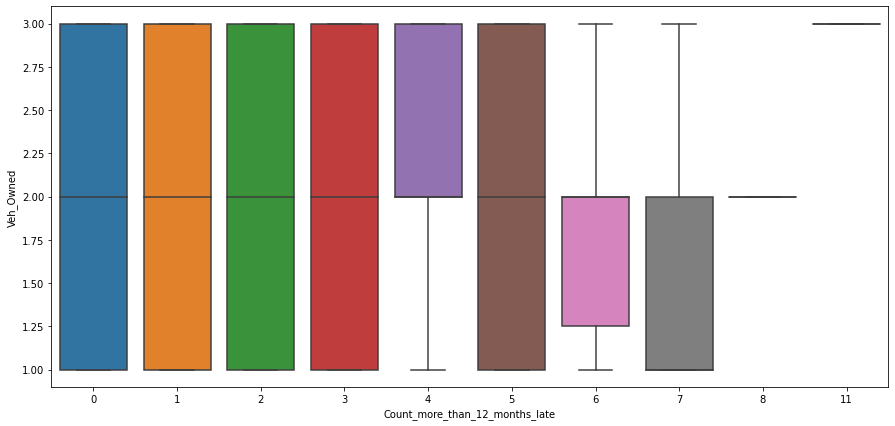

<IPython.core.display.Javascript object>

In [90]:
plt.figure(figsize=(15, 7))
sns.boxplot(x="Count_more_than_12_months_late", y="Veh_Owned", data=data)

Customers that own 2 cars appear to be more likely to default more times for periods after 12 months.

<AxesSubplot:xlabel='Count_more_than_12_months_late', ylabel='risk_score'>

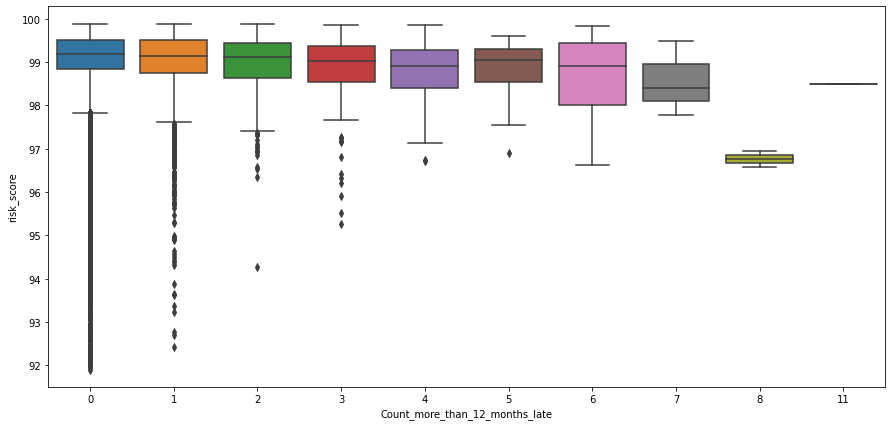

<IPython.core.display.Javascript object>

In [91]:
plt.figure(figsize=(15, 7))
sns.boxplot(x="Count_more_than_12_months_late", y="risk_score", data=data)

The higher the credit score, the less likely a premium default.

<AxesSubplot:xlabel='Count_more_than_12_months_late', ylabel='No_of_dep'>

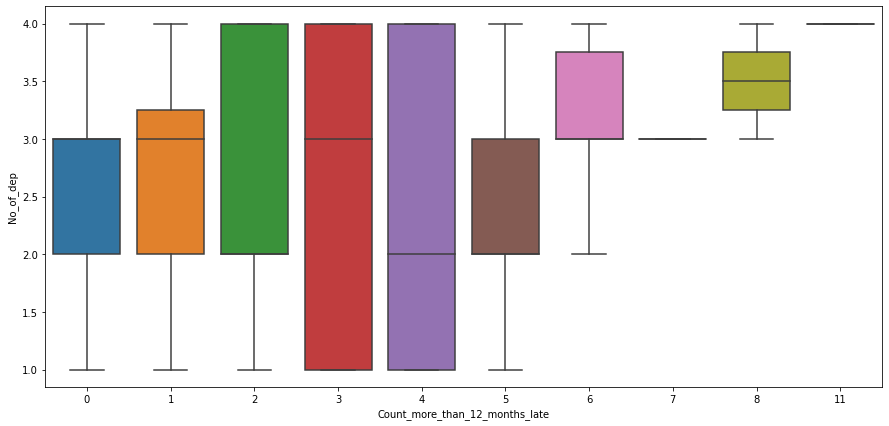

<IPython.core.display.Javascript object>

In [92]:
plt.figure(figsize=(15, 7))
sns.boxplot(x="Count_more_than_12_months_late", y="No_of_dep", data=data)

Customers with 2 or more dependents are more likely to default

<AxesSubplot:xlabel='Count_more_than_12_months_late', ylabel='Accomodation'>

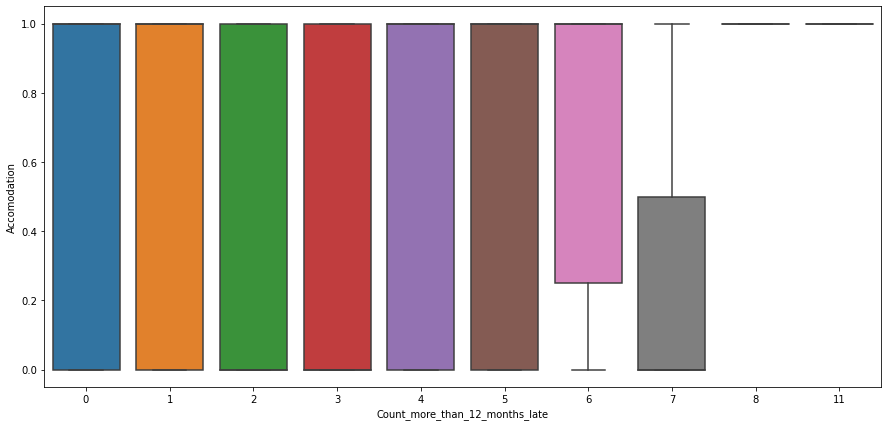

<IPython.core.display.Javascript object>

In [93]:
plt.figure(figsize=(15, 7))
sns.boxplot(x="Count_more_than_12_months_late", y="Accomodation", data=data)

Accomodation does not appear to be a major factor in premium default

<AxesSubplot:xlabel='Count_more_than_12_months_late', ylabel='no_of_premiums_paid'>

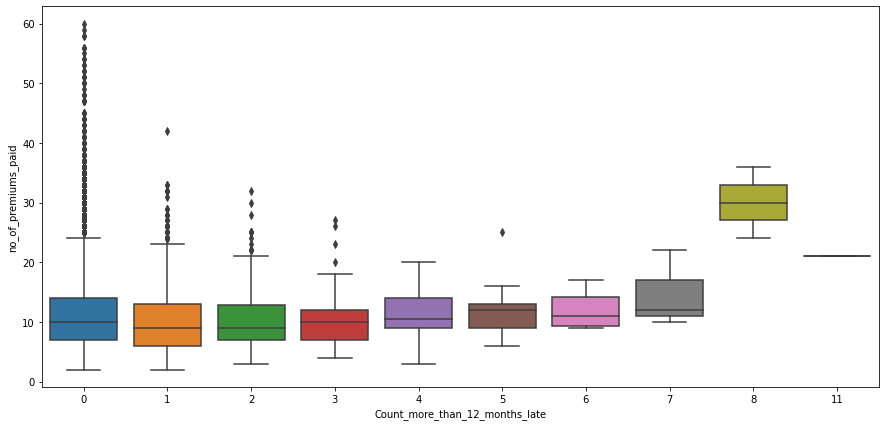

<IPython.core.display.Javascript object>

In [94]:
plt.figure(figsize=(15, 7))
sns.boxplot(x="Count_more_than_12_months_late", y="no_of_premiums_paid", data=data)

Customers who have made more premium payments tend to be less likely to default on a premium payment.

<AxesSubplot:xlabel='Count_more_than_12_months_late', ylabel='sourcing_channel'>

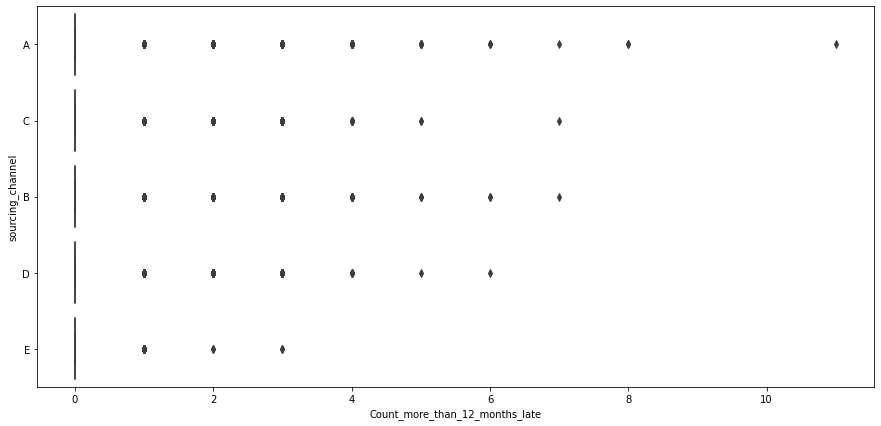

<IPython.core.display.Javascript object>

In [95]:
plt.figure(figsize=(15, 7))
sns.boxplot(x="Count_more_than_12_months_late", y="sourcing_channel", data=data)

Customers sourced from channel E had fewer defaults but this may be due to the low count of customers in this category compared to channel A which has the highest count.

<AxesSubplot:xlabel='Count_more_than_12_months_late', ylabel='residence_area_type'>

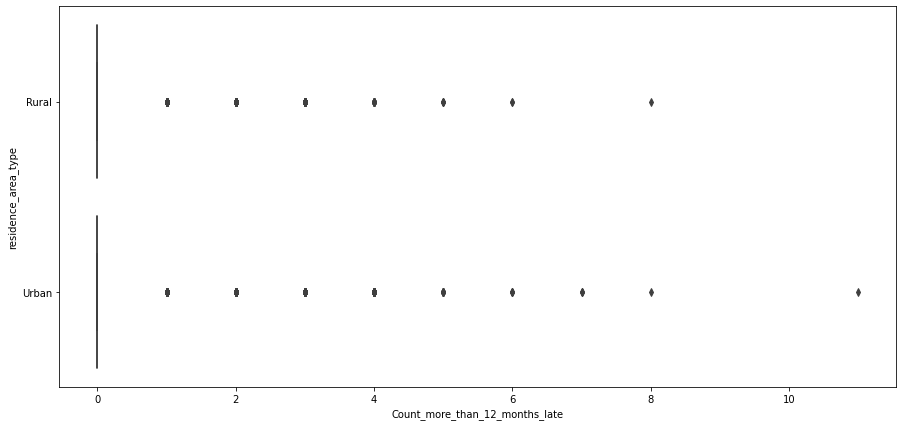

<IPython.core.display.Javascript object>

In [96]:
plt.figure(figsize=(15, 7))
sns.boxplot(x="Count_more_than_12_months_late", y="residence_area_type", data=data)

Urban dwellers are more likely to default than rural dwellers

<AxesSubplot:xlabel='Count_more_than_12_months_late', ylabel='premium'>

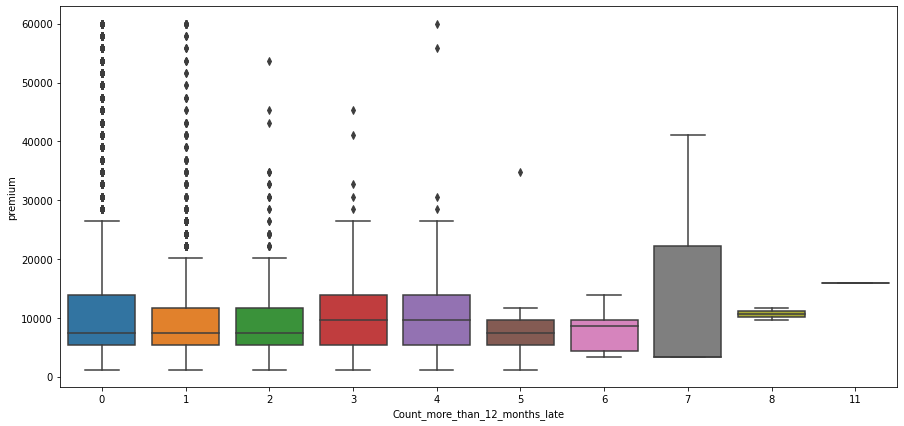

<IPython.core.display.Javascript object>

In [97]:
plt.figure(figsize=(15, 7))
sns.boxplot(x="Count_more_than_12_months_late", y="premium", data=data)

High premium payers pay within 6 months.

In [98]:
# function to plot stacked bar chart


def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 1, 5))
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

<IPython.core.display.Javascript object>

premium_renewal     0      1    All
Marital_Status                     
All              4998  74855  79853
0                2571  37461  40032
1                2427  37394  39821
------------------------------------------------------------------------------------------------------------------------


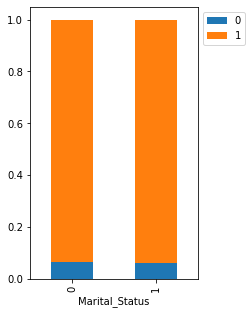

<IPython.core.display.Javascript object>

In [99]:
stacked_barplot(data, "Marital_Status", "premium_renewal")

Marital Status is not a major factor in premium default

premium_renewal     0      1    All
Veh_Owned                          
All              4998  74855  79853
2                1678  24842  26520
1                1668  25078  26746
3                1652  24935  26587
------------------------------------------------------------------------------------------------------------------------


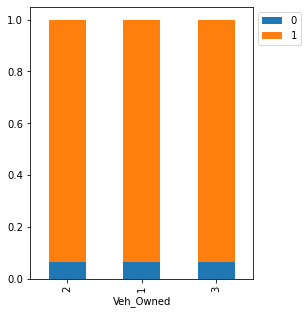

<IPython.core.display.Javascript object>

In [100]:
stacked_barplot(data, "Veh_Owned", "premium_renewal")

Number of vehicles owned is not a major factor in premium default

premium_renewal           0      1    All
Count_3_6_months_late                    
All                    4998  74855  79853
0                      2687  64211  66898
1                      1153   7673   8826
2                       592   1927   2519
3                       288    666    954
4                       158    216    374
5                        67    101    168
6                        31     37     68
7                        10     13     23
8                         6      9     15
9                         2      2      4
10                        1      0      1
11                        1      0      1
12                        1      0      1
13                        1      0      1
------------------------------------------------------------------------------------------------------------------------


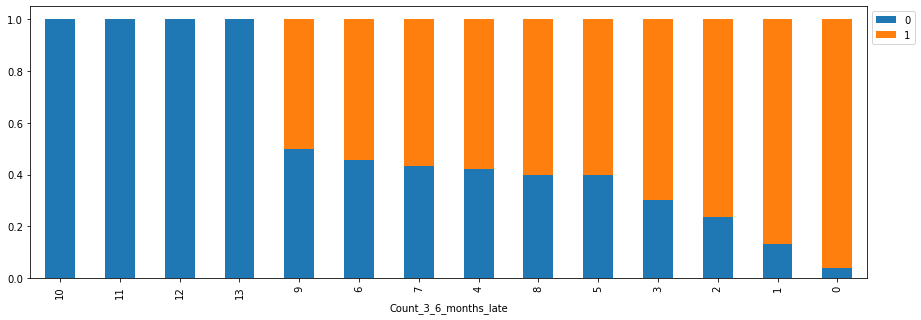

<IPython.core.display.Javascript object>

In [101]:
stacked_barplot(data, "Count_3_6_months_late", "premium_renewal")

Customers with more than 9 defaults within the space of 3-6 months are unlikely to renew their premium

premium_renewal            0      1    All
Count_6_12_months_late                    
All                     4998  74855  79853
0                       3505  72423  75928
1                        828   1852   2680
2                        334    359    693
3                        185    132    317
4                         85     45    130
5                         30     16     46
6                         13     13     26
7                          7      4     11
8                          3      2      5
9                          2      2      4
10                         1      3      4
11                         1      1      2
12                         1      0      1
13                         1      1      2
14                         1      1      2
17                         1      0      1
15                         0      1      1
------------------------------------------------------------------------------------------------------------------------


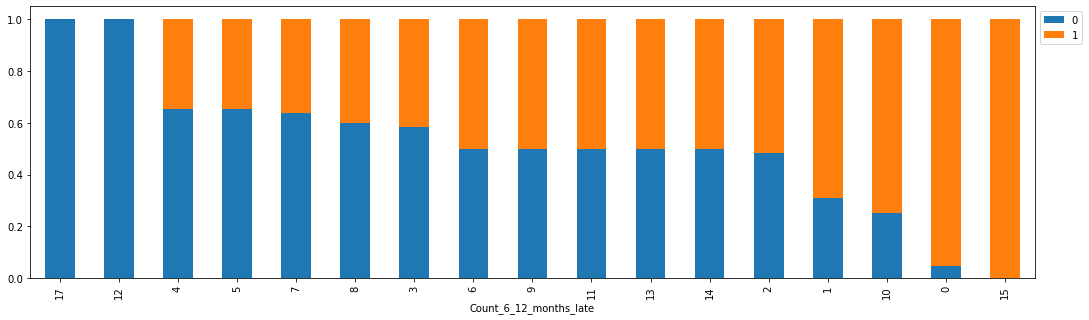

<IPython.core.display.Javascript object>

In [102]:
stacked_barplot(data, "Count_6_12_months_late", "premium_renewal")

The lower the number of default, the higher the likelihood of renewal

15 defaults within 6-12 months is an outlier for high chance of renewal which would be analyzed further.

premium_renewal                    0      1    All
Count_more_than_12_months_late                    
All                             4998  74855  79853
0                               3810  72325  76135
1                                835   2161   2996
2                                228    270    498
3                                 85     66    151
4                                 25     23     48
5                                  7      6     13
6                                  4      2      6
7                                  2      1      3
8                                  1      1      2
11                                 1      0      1
------------------------------------------------------------------------------------------------------------------------


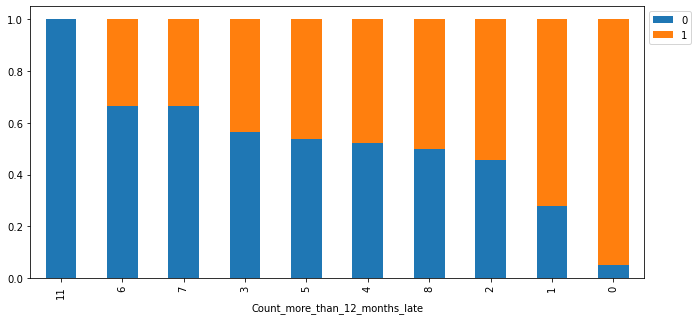

<IPython.core.display.Javascript object>

In [103]:
stacked_barplot(data, "Count_more_than_12_months_late", "premium_renewal")

The lower the number of default, the higher the likelihood of renewal

premium_renewal     0      1    All
No_of_dep                          
All              4998  74855  79853
3                1283  18932  20215
4                1267  18629  19896
2                1258  18644  19902
1                1190  18650  19840
------------------------------------------------------------------------------------------------------------------------


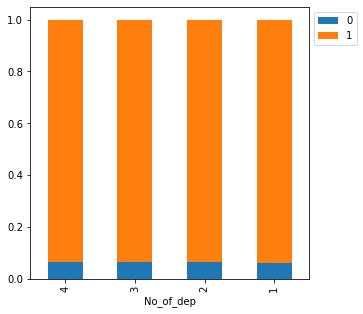

<IPython.core.display.Javascript object>

In [104]:
stacked_barplot(data, "No_of_dep", "premium_renewal")

Number of dependents is not a major factor in premium default

premium_renewal     0      1    All
Accomodation                       
All              4998  74855  79853
1                2545  37485  40030
0                2453  37370  39823
------------------------------------------------------------------------------------------------------------------------


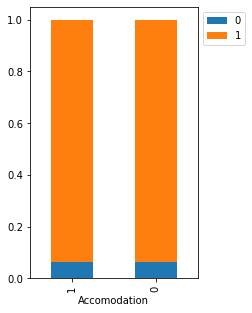

<IPython.core.display.Javascript object>

In [105]:
stacked_barplot(data, "Accomodation", "premium_renewal")

Accomodation is not a major factor in premium default

premium_renewal         0      1    All
no_of_premiums_paid                    
All                  4998  74855  79853
7                     379   6244   6623
8                     371   6813   7184
9                     351   6807   7158
11                    351   6044   6395
10                    326   6547   6873
5                     325   3890   4215
6                     319   5316   5635
12                    294   5113   5407
4                     271   2636   2907
13                    266   4486   4752
14                    237   3751   3988
3                     235   1511   1746
2                     215    511    726
16                    179   2499   2678
15                    179   3085   3264
17                    151   1997   2148
18                    120   1679   1799
19                     89   1266   1355
20                     79   1055   1134
21                     51    787    838
22                     50    663    713
23                     33    470    503


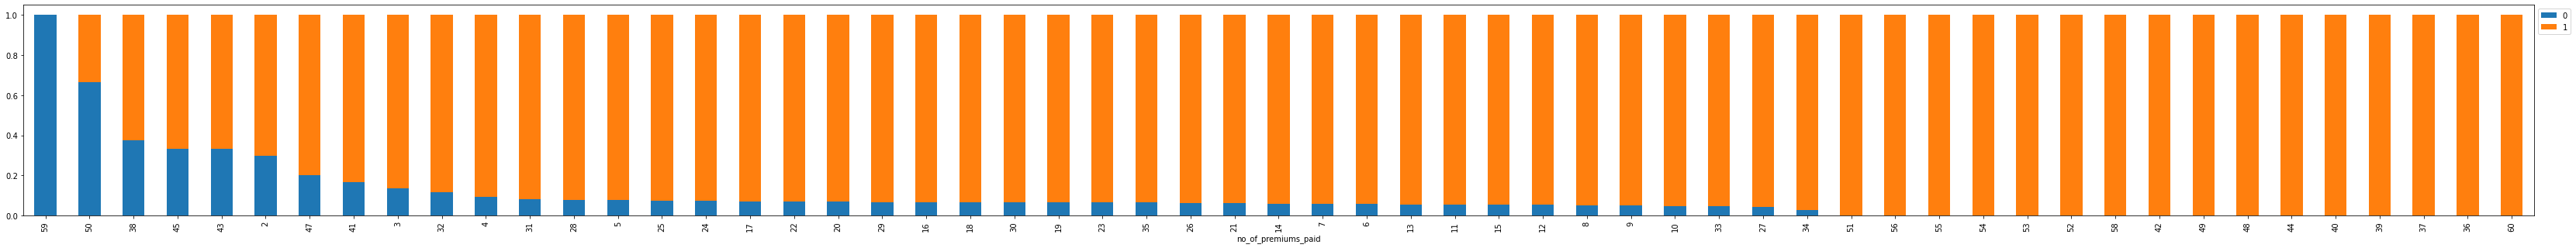

<IPython.core.display.Javascript object>

In [106]:
stacked_barplot(data, "no_of_premiums_paid", "premium_renewal")

The number of premium paid does not appear to be a major factor for renewal.

The categories without full renewal all have over 30 premiums paid which may imply that the higher the number of premium payments, the likelihood of renewal increases.

59 payments is an outlier which would be analysed further.

premium_renewal      0      1    All
sourcing_channel                    
All               4998  74855  79853
A                 2349  40785  43134
B                 1066  15446  16512
C                  903  11136  12039
D                  634   6925   7559
E                   46    563    609
------------------------------------------------------------------------------------------------------------------------


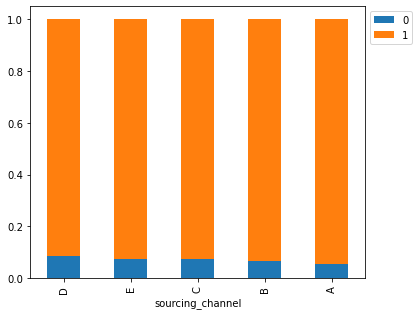

<IPython.core.display.Javascript object>

In [107]:
stacked_barplot(data, "sourcing_channel", "premium_renewal")

Policyholders sourced from channel A are least likely to renew their premium.

Channels B,C,D and E do no show a significant difference.

The gap between Channel A and other channels in terms of defaulters does not appear to be material to demand further pain-staking analysis.

This trend would need to be monitored.

premium_renewal         0      1    All
residence_area_type                    
All                  4998  74855  79853
Urban                3000  45183  48183
Rural                1998  29672  31670
------------------------------------------------------------------------------------------------------------------------


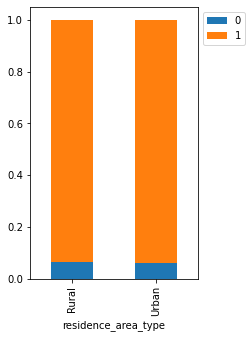

<IPython.core.display.Javascript object>

In [108]:
stacked_barplot(data, "residence_area_type", "premium_renewal")

There is no marked difference between the policyholders from the Rural and Urban residence_area_type in terms of probability of renewal or otherwise.

premium_renewal     0      1    All
premium                            
All              4998  74855  79853
5400              828  10104  10932
3300              716   9141   9857
7500              679   9515  10194
9600              505   7914   8419
1200              495   6405   6900
11700             367   6465   6832
13800             351   6197   6548
5700              258   2813   3071
18000             147   2915   3062
15900             127   2704   2831
20100             125   2297   2422
22200              80   1759   1839
24300              63   1305   1368
26400              53   1002   1055
32700              35    653    688
28500              29    772    801
60000              20    399    419
34800              20    372    392
30600              18    456    474
41100              12    195    207
36900              12    347    359
45300              11    130    141
39000              10    249    259
49500               8     92    100
47400               7    127

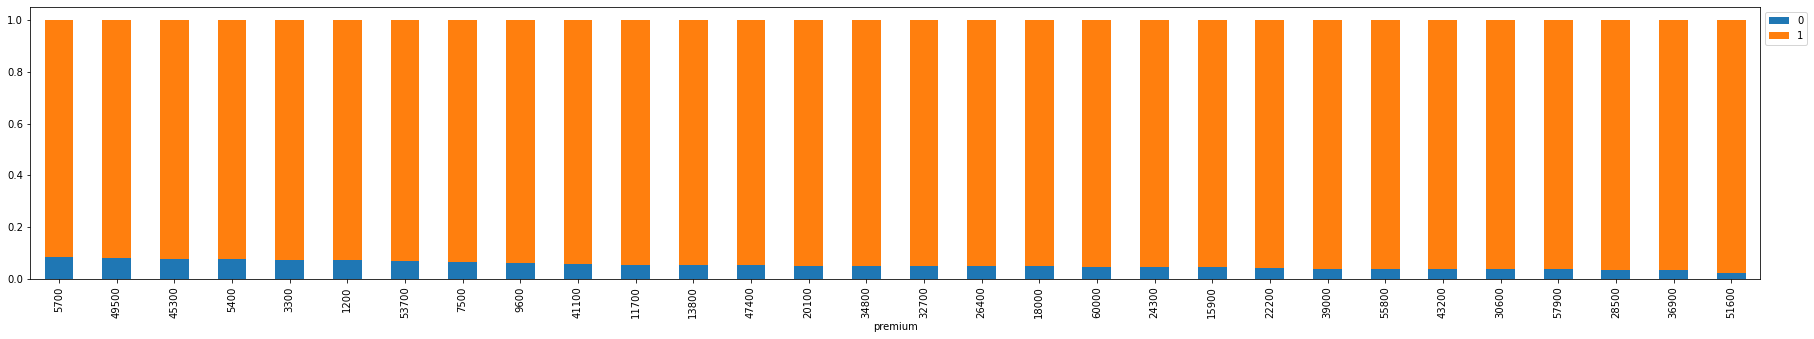

<IPython.core.display.Javascript object>

In [109]:
stacked_barplot(data, "premium", "premium_renewal")

premium does not appear to be a major factor in premium renewal

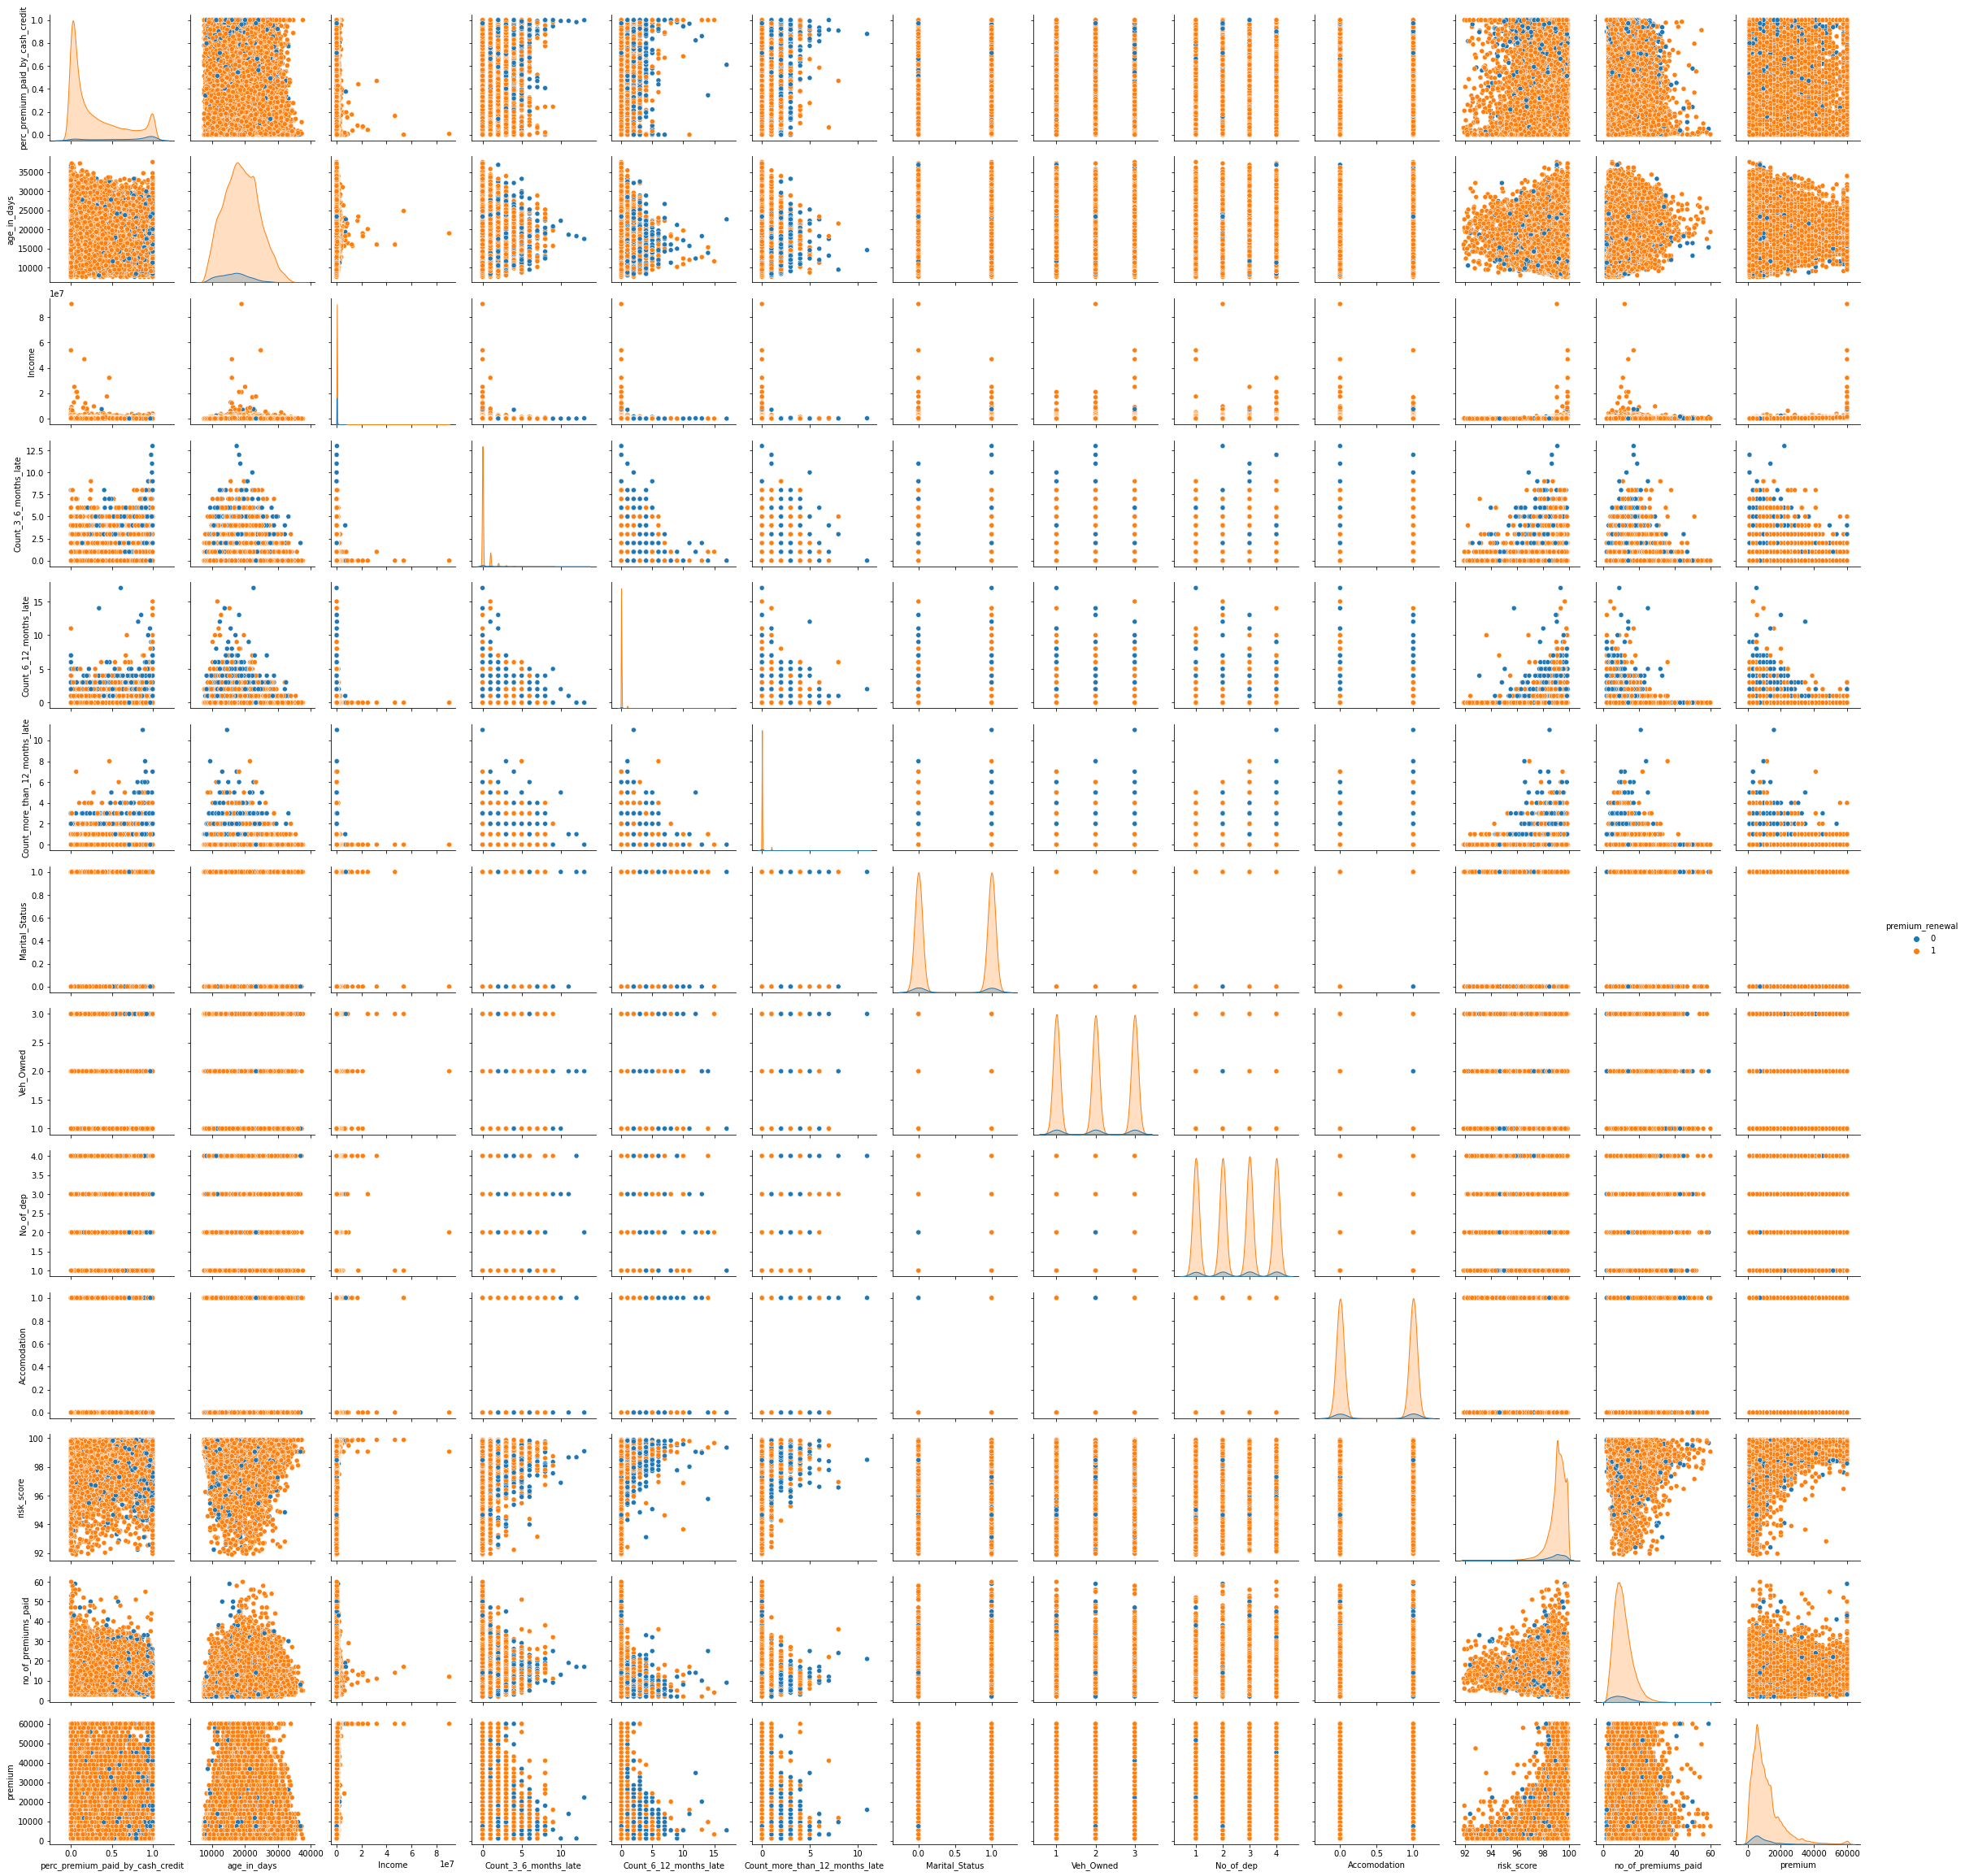

<IPython.core.display.Javascript object>

In [110]:
sns.pairplot(data=data, hue="premium_renewal")

The dataset contains a number of outliers as shown in the pairplots.

These outliers would be treated appropriately before model building.

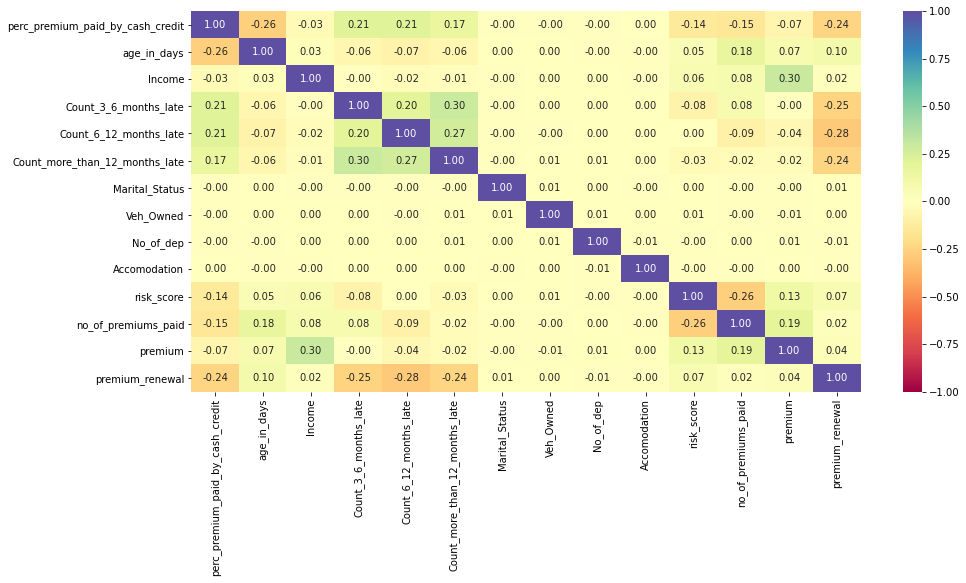

<IPython.core.display.Javascript object>

In [111]:
plt.figure(figsize=(15, 7))
sns.heatmap(data.corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show()

perc_premium_paid_by_cash_credit has the highest correlation (0.21) with Count_3_6_months_late and Count_6_12_months_late.

A number of the variables are negatively correlated in the dataset.

# Data Preparation

# Let's find the percentage of outliers, in each column of the data, using IQR.

In [112]:
Q1 = data.quantile(0.25)
Q1 = data.quantile(0.25)  # To find the 25th percentile and 75th percentile.
Q3 = data.quantile(0.75)

IQR = Q3 - Q1  # Inter Quantile Range (75th perentile - 25th percentile)

lower = (
    Q1 - 1.5 * IQR
)  # Finding lower and upper bounds for all values. All values outside these bounds are outliers
upper = Q3 + 1.5 * IQR

<IPython.core.display.Javascript object>

In [113]:
(
    (data.select_dtypes(include=["float64", "int64"]) < lower)
    | (data.select_dtypes(include=["float64", "int64"]) > upper)
).sum() / len(data) * 100

perc_premium_paid_by_cash_credit    0.000
age_in_days                         0.055
Income                              4.293
Count_3_6_months_late              16.224
Count_6_12_months_late              4.915
Count_more_than_12_months_late      4.656
Marital_Status                      0.000
Veh_Owned                           0.000
No_of_dep                           0.000
Accomodation                        0.000
risk_score                          4.739
no_of_premiums_paid                 1.786
premium                             5.664
premium_renewal                     6.259
dtype: float64

<IPython.core.display.Javascript object>

After identifying outliers, we can decide whether to remove/treat them or not. It depends on one's approach, here we are not going to treat them as there will be outliers in a real case scenario (in Income, age_in_days, Count_3_6_months_late, etc) and we would want our model to learn the underlying pattern for such customers.

# DataTransformation

Let's transform the data before we proceed with the model building.

array([[<AxesSubplot:title={'center':'perc_premium_paid_by_cash_credit'}>,
        <AxesSubplot:title={'center':'age_in_days'}>,
        <AxesSubplot:title={'center':'Income'}>,
        <AxesSubplot:title={'center':'Count_3_6_months_late'}>],
       [<AxesSubplot:title={'center':'Count_6_12_months_late'}>,
        <AxesSubplot:title={'center':'Count_more_than_12_months_late'}>,
        <AxesSubplot:title={'center':'Marital_Status'}>,
        <AxesSubplot:title={'center':'Veh_Owned'}>],
       [<AxesSubplot:title={'center':'No_of_dep'}>,
        <AxesSubplot:title={'center':'Accomodation'}>,
        <AxesSubplot:title={'center':'risk_score'}>,
        <AxesSubplot:title={'center':'no_of_premiums_paid'}>],
       [<AxesSubplot:title={'center':'premium'}>,
        <AxesSubplot:title={'center':'premium_renewal'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

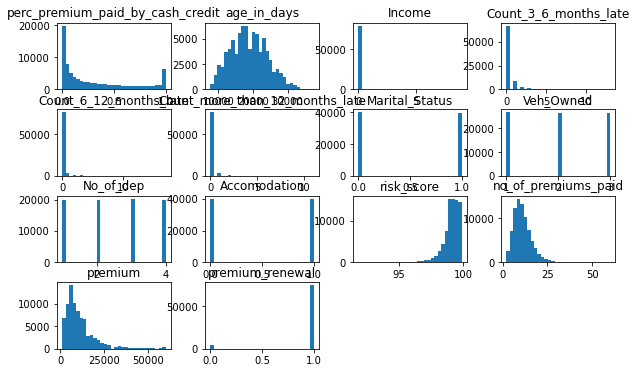

<IPython.core.display.Javascript object>

In [114]:
# visually inspect whether the data are normally distributed

data.hist(grid=False, figsize=(10, 6), bins=30)

To transform the skewed data in dataset, I will just have a quick look at the skewness and kurtosis in dataset. 

I'm using the transpose() method to change the rows to columns (i.e., transpose the Pandas dataframe) so that I get an output that is a bit easier to check.

In [115]:
data.agg(["skew", "kurtosis"]).transpose()

skew  kurtosis
perc_premium_paid_by_cash_credit   0.893    -0.614
age_in_days                        0.223    -0.460
Income                           109.761 16639.128
Count_3_6_months_late              4.153    24.942
Count_6_12_months_late            10.360   185.247
Count_more_than_12_months_late     7.855    98.570
Marital_Status                     0.005    -2.000
Veh_Owned                          0.004    -1.503
No_of_dep                         -0.006    -1.355
Accomodation                      -0.005    -2.000
risk_score                        -2.809    14.644
no_of_premiums_paid                1.227     3.325
premium                            2.198     6.672
premium_renewal                   -3.612    11.045

<IPython.core.display.Javascript object>

Values of <1.0 and >1.0 are highly skewed. However most of these tests on skewness and kurtosis are susceptible for the sample size.

Variables like Income, Count_3_6_months_late, Count_6_12_months_late, Count_more_than_12_months_late, risk_score, no_of_premiums_paid, premium and premium_renewal are highly skewed.

Text(0.5, 0, 'Log(risk_score)')

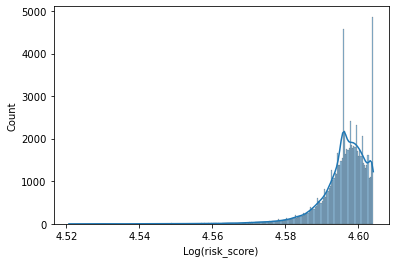

<IPython.core.display.Javascript object>

In [116]:
sns.histplot(np.log(data["risk_score"]), kde=True)
plt.xlabel("Log(risk_score)")

Using the log transformation has not helped in reducing the skew.

# One-hot encoding

Change object type to ‘category’ before using One hot encoding to transform data

In [117]:
# converting object-type columns to 'category'
data["sourcing_channel"] = data["sourcing_channel"].astype("category")
data["residence_area_type"] = data["residence_area_type"].astype("category")

data

perc_premium_paid_by_cash_credit  age_in_days  Income  \
0                                 0.317        11330   90050   
1                                 0.000        30309  156080   
2                                 0.015        16069  145020   
3                                 0.000        23733  187560   
4                                 0.888        19360  103050   
...                                 ...          ...     ...   
79848                             0.249        25555   64420   
79849                             0.003        16797  660040   
79850                             0.012        24835  227760   
79851                             0.190        10959  153060   
79852                             0.000        19720  324030   

       Count_3_6_months_late  Count_6_12_months_late  \
0                          0                       0   
1                          0                       0   
2                          1                       0   
3                          0                       0   
4                          7                       3   
...                      ...                     ...   
79848                      0                       0   
79849                      1                       0   
79850                      0                       0   
79851                      1                       0   
79852                      0                       0   

       Count_more_than_12_months_late  Marital_Status  Veh_Owned  No_of_dep  \
0                                   0               0          3          3   
1                                   0               1          3          1   
2                                   0               0          1          1   
3                                   0               1          1          1   
4                                   4               0          2          1   
...                               ...             ...        ...        ...   
79848                               0               1          2          4   
79849                               0               0          2          1   
79850                               0               0          2          3   
79851                               0               0          2          1   
79852                               0               0          3          3   

       Accomodation  risk_score  no_of_premiums_paid sourcing_channel  \
0                 1      98.810                    8                A   
1                 1      99.066                    3                A   
2                 1      99.170                   14                C   
3                 0      99.370                   13                A   
4                 0      98.800                   15                A   
...             ...         ...                  ...              ...   
79848             0      99.080                   10                A   
79849             0      99.650                    9                B   
79850             0      99.660                   11                A   
79851             0      99.460                   24                A   
79852             0      99.800                    7                D   

      residence_area_type  premium  premium_renewal  
0                   Rural     5400                1  
1                   Urban    11700                1  
2                   Urban    18000                1  
3                   Urban    13800                1  
4                   Urban     7500                0  
...                   ...      ...              ...  
79848               Urban     5700                1  
79849               Urban    28500                1  
79850               Rural    11700                1  
79851               Urban    11700                1  
79852               Rural     3300                1  

[79853 rows x 16 columns]

<IPython.core.display.Javascript object>

Creating a function to split, encode and add a constant to X

The function will save us some time while checking high VIF values as we have to iteratively drop variables and check model performance.

# Data Preparation for modeling

In [118]:
X = data.drop(["premium_renewal"], axis=1)
y = data["premium_renewal"]

<IPython.core.display.Javascript object>

In [119]:
# Splitting data into training, validation and test set:
# first we split data into 2 parts, say temporary and test

X_temp, X_test, y_temp, y_test = train_test_split(
    X, y, test_size=0.2, random_state=1, stratify=y
)

# then we split the temporary set into train and validation

X_train, X_val, y_train, y_val = train_test_split(
    X_temp, y_temp, test_size=0.25, random_state=1, stratify=y_temp
)
print(X_train.shape, X_val.shape, X_test.shape)

(47911, 15) (15971, 15) (15971, 15)


<IPython.core.display.Javascript object>

In [120]:
cols = X_train.select_dtypes(include=["object", "category"])

for i in cols.columns:
    print(X_train[i].value_counts())
    print("*" * 30)

A    25951
B     9939
C     7198
D     4466
E      357
Name: sourcing_channel, dtype: int64
******************************
Urban    29034
Rural    18877
Name: residence_area_type, dtype: int64
******************************


<IPython.core.display.Javascript object>

In [121]:
cols = X_val.select_dtypes(include=["object", "category"])
for i in cols.columns:
    print(X_val[i].value_counts())
    print("*" * 30)

A    8615
B    3274
C    2414
D    1541
E     127
Name: sourcing_channel, dtype: int64
******************************
Urban    9593
Rural    6378
Name: residence_area_type, dtype: int64
******************************


<IPython.core.display.Javascript object>

In [122]:
cols = X_test.select_dtypes(include=["object", "category"])
for i in cols.columns:
    print(X_train[i].value_counts())
    print("*" * 30)

A    25951
B     9939
C     7198
D     4466
E      357
Name: sourcing_channel, dtype: int64
******************************
Urban    29034
Rural    18877
Name: residence_area_type, dtype: int64
******************************


<IPython.core.display.Javascript object>

# Encoding categorical variables

In [123]:
X_train = pd.get_dummies(X_train, drop_first=True)
X_val = pd.get_dummies(X_val, drop_first=True)
X_test = pd.get_dummies(X_test, drop_first=True)
print(X_train.shape, X_val.shape, X_test.shape)

(47911, 18) (15971, 18) (15971, 18)


<IPython.core.display.Javascript object>

After encoding there are 18 columns.

In [124]:
X_train.head()

perc_premium_paid_by_cash_credit  age_in_days  Income  \
25230                             0.000        23371  150130   
33932                             0.029        23735  180050   
11009                             0.049        22644  315100   
73213                             0.017        27018   90030   
3422                              0.084        30303  155310   

       Count_3_6_months_late  Count_6_12_months_late  \
25230                      0                       0   
33932                      0                       0   
11009                      0                       0   
73213                      0                       0   
3422                       0                       0   

       Count_more_than_12_months_late  Marital_Status  Veh_Owned  No_of_dep  \
25230                               0               1          2          4   
33932                               0               1          2          1   
11009                               0               1          2          4   
73213                               0               1          2          1   
3422                                0               0          3          4   

       Accomodation  risk_score  no_of_premiums_paid  premium  \
25230             0      98.840                    9    11700   
33932             1      98.990                   20     9600   
11009             0      99.370                   11    13800   
73213             1      98.910                   23     7500   
3422              0      99.120                   17    11700   

       sourcing_channel_B  sourcing_channel_C  sourcing_channel_D  \
25230                   0                   0                   0   
33932                   0                   0                   0   
11009                   1                   0                   0   
73213                   0                   0                   0   
3422                    0                   0                   0   

       sourcing_channel_E  residence_area_type_Urban  
25230                   0                          0  
33932                   0                          1  
11009                   0                          0  
73213                   0                          1  
3422                    0                          0

<IPython.core.display.Javascript object>

# Building the model

# Model evaluation criterion

Model can make wrong predictions as:

Predicting a customer will default and the customer doesn't default

Predicting a customer will not default and the customer defaults

# Which case is more important?

Predicting that customer will not default but he defaults i.e. losing revenues due to little or no proactive engagement.

# How to reduce this loss i.e need to reduce False Negatives?

The Insurance company would want Recall to be maximized, greater the Recall higher the chances of minimizing false negatives. Hence, the focus should be on increasing Recall or minimizing the false negatives or in other words identifying the true positives(i.e. Class 1) so that the company can proactively engage customers that are likely to default and forestall loss of revenues.

# First, let's create two functions to calculate different metrics and confusion matrix, so that we don't have to use the same code repeatedly for each model.

In [125]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn
def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )

    return df_perf

<IPython.core.display.Javascript object>

In [126]:
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

<IPython.core.display.Javascript object>

# Model with original data

In [127]:
models = []  # Empty list to store all the models

# Appending models into the list
models.append(("Logistic regression", LogisticRegression(random_state=1)))
models.append(("Bagging", BaggingClassifier(random_state=1)))
models.append(("Random forest", RandomForestClassifier(random_state=1)))
models.append(("GBM", GradientBoostingClassifier(random_state=1)))
models.append(("Adaboost", AdaBoostClassifier(random_state=1)))
models.append(("Xgboost", XGBClassifier(random_state=1, eval_metric="logloss")))
models.append(("dtree", DecisionTreeClassifier(random_state=1)))

results1 = []  # Empty list to store all model's CV scores
names = []  # Empty list to store name of the models


# loop through all models to get the mean cross validated score
print("\n" "Cross-Validation Performance:" "\n")

for name, model in models:
    scoring = "recall"
    kfold = StratifiedKFold(
        n_splits=5, shuffle=True, random_state=1
    )  # Setting number of splits equal to 5
    cv_result = cross_val_score(
        estimator=model, X=X_train, y=y_train, scoring=scoring, cv=kfold
    )
    results1.append(cv_result)
    names.append(name)
    print("{}: {}".format(name, cv_result.mean() * 100))

print("\n" "Validation Performance:" "\n")

for name, model in models:
    model.fit(X_train, y_train)
    scores = recall_score(y_val, model.predict(X_val))
    print("{}: {}".format(name, scores))


Cross-Validation Performance:

Logistic regression: 99.9487921629745
Bagging: 97.82023185237719
Random forest: 99.44114136469905
GBM: 99.2897405631702
Adaboost: 99.0359131810196
Xgboost: 98.87783136126423
dtree: 94.09302705005544

Validation Performance:

Logistic regression: 1.0
Bagging: 0.9794936877964063
Random forest: 0.9941887649455614
GBM: 0.9929864404515396
Adaboost: 0.9905149956582726
Xgboost: 0.9901810166321555
dtree: 0.9418876494556142


<IPython.core.display.Javascript object>

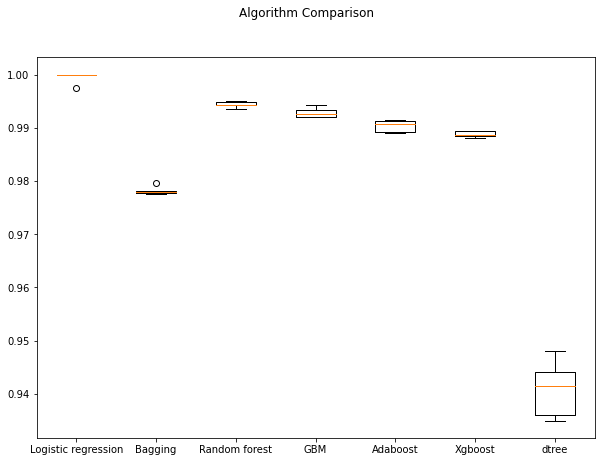

<IPython.core.display.Javascript object>

In [128]:
# Plotting boxplots for CV scores of all models defined above
fig = plt.figure(figsize=(10, 7))

fig.suptitle("Algorithm Comparison")
ax = fig.add_subplot(111)

plt.boxplot(results1)
ax.set_xticklabels(names)

plt.show()

# Performance comparison

Logistic Regression has the best performance followed by Random Forest

Performance of all the models is consistent with Logistic Regression and Bagging having only 1 outlier each.

# Models with Oversampled data

In [129]:
print("Before Oversampling, counts of label 'Yes': {}".format(sum(y_train == 1)))
print("Before Oversampling, counts of label 'No': {} \n".format(sum(y_train == 0)))

sm = SMOTE(
    sampling_strategy=1, k_neighbors=5, random_state=1
)  # Synthetic Minority Over Sampling Technique
X_train_over, y_train_over = sm.fit_resample(X_train, y_train)


print("After Oversampling, counts of label 'Yes': {}".format(sum(y_train_over == 1)))
print("After Oversampling, counts of label 'No': {} \n".format(sum(y_train_over == 0)))


print("After Oversampling, the shape of train_X: {}".format(X_train_over.shape))
print("After Oversampling, the shape of train_y: {} \n".format(y_train_over.shape))

Before Oversampling, counts of label 'Yes': 44913
Before Oversampling, counts of label 'No': 2998 

After Oversampling, counts of label 'Yes': 44913
After Oversampling, counts of label 'No': 44913 

After Oversampling, the shape of train_X: (89826, 18)
After Oversampling, the shape of train_y: (89826,) 



<IPython.core.display.Javascript object>

In [130]:
models = []  # Empty list to store all the models

# Appending models into the list
models.append(("Logistic regression", LogisticRegression(random_state=1)))
models.append(("Bagging", BaggingClassifier(random_state=1)))
models.append(("Random forest", RandomForestClassifier(random_state=1)))
models.append(("GBM", GradientBoostingClassifier(random_state=1)))
models.append(("Adaboost", AdaBoostClassifier(random_state=1)))
models.append(("Xgboost", XGBClassifier(random_state=1, eval_metric="logloss")))
models.append(("dtree", DecisionTreeClassifier(random_state=1)))

results2 = []  # Empty list to store all model's CV scores
names = []  # Empty list to store name of the models


# loop through all models to get the mean cross validated score
print("\n" "Cross-Validation Performance:" "\n")

for name, model in models:
    scoring = "recall"
    kfold = StratifiedKFold(
        n_splits=5, shuffle=True, random_state=1
    )  # Setting number of splits equal to 5
    cv_result = cross_val_score(
        estimator=model, X=X_train_over, y=y_train_over, scoring=scoring, cv=kfold
    )
    results2.append(cv_result)
    names.append(name)
    print("{}: {}".format(name, cv_result.mean() * 100))

print("\n" "Validation Performance:" "\n")

for name, model in models:
    model.fit(X_train_over, y_train_over)
    scores = recall_score(y_val, model.predict(X_val))
    print("{}: {}".format(name, scores))


Cross-Validation Performance:

Logistic regression: 74.9708585104703
Bagging: 85.40734740474306
Random forest: 89.40617638606959
GBM: 84.32524876338698
Adaboost: 83.01382682988152
Xgboost: 95.34654723872522
dtree: 83.02495946411854

Validation Performance:

Logistic regression: 0.5785184690401443
Bagging: 0.8628682118762941
Random forest: 0.9032128782312471
GBM: 0.8423618996727006
Adaboost: 0.8308062253690468
Xgboost: 0.9601897000868346
dtree: 0.8378197849175072


<IPython.core.display.Javascript object>

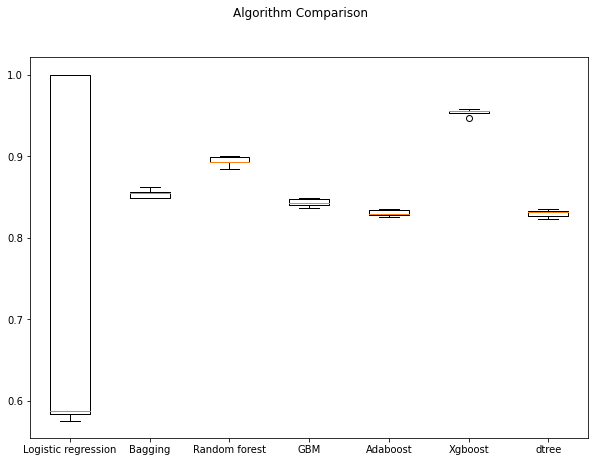

<IPython.core.display.Javascript object>

In [131]:
# Plotting boxplots for CV scores of all models defined above
fig = plt.figure(figsize=(10, 7))

fig.suptitle("Algorithm Comparison")
ax = fig.add_subplot(111)

plt.boxplot(results2)
ax.set_xticklabels(names)

plt.show()

# Performance comparison

Xgboost has the best performance followed by Random forest

Performance of xgboost and Random Forest is consistent and xgboost has 1 outlier

# Models with Undersampled data

In [132]:
rus = RandomUnderSampler(random_state=1)
X_train_un, y_train_un = rus.fit_resample(X_train, y_train)

<IPython.core.display.Javascript object>

In [133]:
print("Before Under Sampling, counts of label 'Yes': {}".format(sum(y_train == 1)))
print("Before Under Sampling, counts of label 'No': {} \n".format(sum(y_train == 0)))

print("After Under Sampling, counts of label 'Yes': {}".format(sum(y_train_un == 1)))
print("After Under Sampling, counts of label 'No': {} \n".format(sum(y_train_un == 0)))

print("After Under Sampling, the shape of train_X: {}".format(X_train_un.shape))
print("After Under Sampling, the shape of train_y: {} \n".format(y_train_un.shape))

Before Under Sampling, counts of label 'Yes': 44913
Before Under Sampling, counts of label 'No': 2998 

After Under Sampling, counts of label 'Yes': 2998
After Under Sampling, counts of label 'No': 2998 

After Under Sampling, the shape of train_X: (5996, 18)
After Under Sampling, the shape of train_y: (5996,) 



<IPython.core.display.Javascript object>

In [134]:
models = []  # Empty list to store all the models

# Appending models into the list
models.append(("Logistic regression", LogisticRegression(random_state=1)))
models.append(("Bagging", BaggingClassifier(random_state=1)))
models.append(("Random forest", RandomForestClassifier(random_state=1)))
models.append(("GBM", GradientBoostingClassifier(random_state=1)))
models.append(("Adaboost", AdaBoostClassifier(random_state=1)))
models.append(("Xgboost", XGBClassifier(random_state=1, eval_metric="logloss")))
models.append(("dtree", DecisionTreeClassifier(random_state=1)))

results3 = []  # Empty list to store all model's CV scores
names = []  # Empty list to store name of the models


# loop through all models to get the mean cross validated score
print("\n" "Cross-Validation Performance:" "\n")

for name, model in models:
    scoring = "recall"
    kfold = StratifiedKFold(
        n_splits=5, shuffle=True, random_state=1
    )  # Setting number of splits equal to 5
    cv_result = cross_val_score(
        estimator=model, X=X_train_un, y=y_train_un, scoring=scoring, cv=kfold
    )
    results3.append(cv_result)
    names.append(name)
    print("{}: {}".format(name, cv_result.mean() * 100))

print("\n" "Validation Performance:" "\n")

for name, model in models:
    model.fit(X_train_un, y_train_un)
    scores = recall_score(y_val, model.predict(X_val))
    print("{}: {}".format(name, scores))


Cross-Validation Performance:

Logistic regression: 65.03767390094602
Bagging: 69.81368948247078
Random forest: 76.5517529215359
GBM: 77.38603227601558
Adaboost: 79.28670005564831
Xgboost: 75.25075125208683
dtree: 66.24435169727323

Validation Performance:

Logistic regression: 0.5787188564558146
Bagging: 0.6978157771691937
Random forest: 0.7572640438180482
GBM: 0.7639436243403914
Adaboost: 0.7894596219357425
Xgboost: 0.7495825262173536
dtree: 0.6689599893126712


<IPython.core.display.Javascript object>

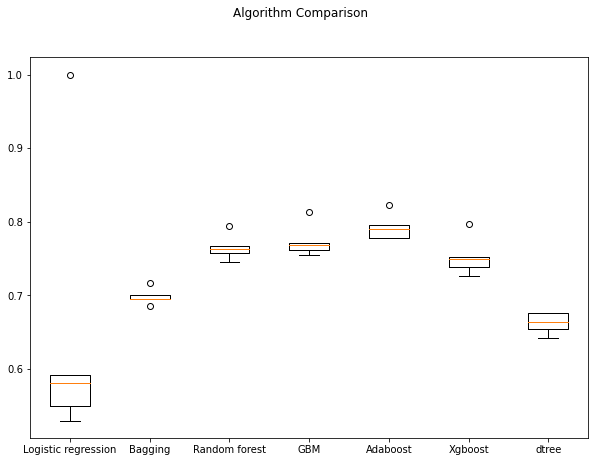

<IPython.core.display.Javascript object>

In [135]:
# Plotting boxplots for CV scores of all models defined above
fig = plt.figure(figsize=(10, 7))

fig.suptitle("Algorithm Comparison")
ax = fig.add_subplot(111)

plt.boxplot(results3)
ax.set_xticklabels(names)

plt.show()

# Performance comparison

Adaboost has the best performance followed by Gradient Boosting Model.

Performance of both Adaboost and xgboost is consistent with one outlier each.

# Which models should be tuned?
XGBoost, AdaBoost and Gradient boosting models have consistent and good performance for all 3 datasets.

So, we will tune these 3 models.

We will tune these 3 models using undersampled data.

Sometimes models might overfit after undersampling and oversampling, so it's better to tune models with both undersampled data and original data.

# Tuning XGBoost

# Tuning with Undersampled data

In [136]:
%%time 

# defining model
Model = XGBClassifier(random_state=1,eval_metric='logloss')

#Parameter grid to pass in RandomSearchCV
param_grid={'n_estimators':np.arange(50,300,50),'scale_pos_weight':[0,1,2,5,10],
            'learning_rate':[0.01,0.1,0.2,0.05], 'gamma':[0,1,3,5],
            'subsample':[0.7,0.8,0.9,1]
           }

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, n_iter=50, n_jobs = -1, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train_un,y_train_un)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'subsample': 0.9, 'scale_pos_weight': 10, 'n_estimators': 200, 'learning_rate': 0.01, 'gamma': 1} with CV score=0.958971062882582:
Wall time: 2min 8s


<IPython.core.display.Javascript object>

In [137]:
tuned_xgb1 = XGBClassifier(
    random_state=1,
    eval_metric="logloss",
    subsample=0.9,
    scale_pos_weight=10,
    n_estimators=200,
    learning_rate=0.01,
    gamma=1,
)
tuned_xgb1.fit(X_train_un, y_train_un)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, eval_metric='logloss',
              gamma=1, gpu_id=-1, importance_type='gain',
              interaction_constraints='', learning_rate=0.01, max_delta_step=0,
              max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=200, n_jobs=4,
              num_parallel_tree=1, random_state=1, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=10, subsample=0.9, tree_method='exact',
              validate_parameters=1, verbosity=None)

<IPython.core.display.Javascript object>

In [138]:
# Checking model's performance on train set
xgb1_train = model_performance_classification_sklearn(
    tuned_xgb1, X_train_un, y_train_un
)
xgb1_train

Accuracy  Recall  Precision    F1
0     0.679   1.000      0.609 0.757

<IPython.core.display.Javascript object>

In [139]:
# Checking model's performance on validation set
xgb1_val = model_performance_classification_sklearn(tuned_xgb1, X_val, y_val)
xgb1_val

Accuracy  Recall  Precision    F1
0     0.926   0.967      0.955 0.961

<IPython.core.display.Javascript object>

# Tuning with Original data

In [140]:
%%time 

# defining model
Model = XGBClassifier(random_state=1,eval_metric='logloss')

#Parameter grid to pass in RandomSearchCV
param_grid={'n_estimators':np.arange(50,300,50),'scale_pos_weight':[0,1,2,5,10],
            'learning_rate':[0.01,0.1,0.2,0.05], 'gamma':[0,1,3,5],
            'subsample':[0.7,0.8,0.9,1]
           }

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, n_iter=50, n_jobs = -1, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train,y_train)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'subsample': 0.9, 'scale_pos_weight': 10, 'n_estimators': 200, 'learning_rate': 0.01, 'gamma': 1} with CV score=0.9997328286763889:
Wall time: 12min 2s


<IPython.core.display.Javascript object>

In [141]:
tuned_xgb2 = XGBClassifier(
    random_state=1,
    eval_metric="logloss",
    subsample=0.9,
    scale_pos_weight=10,
    n_estimators=200,
    learning_rate=0.01,
    gamma=1,
)
tuned_xgb2.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, eval_metric='logloss',
              gamma=1, gpu_id=-1, importance_type='gain',
              interaction_constraints='', learning_rate=0.01, max_delta_step=0,
              max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=200, n_jobs=4,
              num_parallel_tree=1, random_state=1, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=10, subsample=0.9, tree_method='exact',
              validate_parameters=1, verbosity=None)

<IPython.core.display.Javascript object>

In [142]:
# Checking model's performance on training set
xgb2_train = model_performance_classification_sklearn(tuned_xgb2, X_train, y_train)
xgb2_train

Accuracy  Recall  Precision    F1
0     0.938   1.000      0.938 0.968

<IPython.core.display.Javascript object>

In [143]:
# Checking model's performance on validation set
xgb2_val = model_performance_classification_sklearn(tuned_xgb2, X_val, y_val)
xgb2_val

Accuracy  Recall  Precision    F1
0     0.938   1.000      0.938 0.968

<IPython.core.display.Javascript object>

# Tuning Adaboost

# Tuning with Undersampled data

In [144]:
%%time 

# defining model
Model = XGBClassifier(random_state=1,eval_metric='logloss')

#Parameter grid to pass in RandomSearchCV
param_grid={'n_estimators':np.arange(50,300,50),'scale_pos_weight':[0,1,2,5,10],
            'learning_rate':[0.01,0.1,0.2,0.05], 'gamma':[0,1,3,5],
            'subsample':[0.7,0.8,0.9,1]
           }

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, n_iter=50, n_jobs = -1, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train_un,y_train_un)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'subsample': 0.9, 'scale_pos_weight': 10, 'n_estimators': 200, 'learning_rate': 0.01, 'gamma': 1} with CV score=0.958971062882582:
Wall time: 1min 57s


<IPython.core.display.Javascript object>

In [145]:
tuned_xgb1 = XGBClassifier(
    random_state=1,
    eval_metric="logloss",
    subsample=0.9,
    scale_pos_weight=10,
    n_estimators=200,
    learning_rate=0.01,
    gamma=1,
)
tuned_xgb1.fit(X_train_un, y_train_un)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, eval_metric='logloss',
              gamma=1, gpu_id=-1, importance_type='gain',
              interaction_constraints='', learning_rate=0.01, max_delta_step=0,
              max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=200, n_jobs=4,
              num_parallel_tree=1, random_state=1, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=10, subsample=0.9, tree_method='exact',
              validate_parameters=1, verbosity=None)

<IPython.core.display.Javascript object>

In [146]:
# Checking model's performance on train set
xgb1_train = model_performance_classification_sklearn(
    tuned_xgb1, X_train_un, y_train_un
)
xgb1_train

Accuracy  Recall  Precision    F1
0     0.679   1.000      0.609 0.757

<IPython.core.display.Javascript object>

In [147]:
# Checking model's performance on validation set
xgb1_val = model_performance_classification_sklearn(tuned_xgb1, X_val, y_val)
xgb1_val

Accuracy  Recall  Precision    F1
0     0.926   0.967      0.955 0.961

<IPython.core.display.Javascript object>

# Tuning with Original data

In [148]:
%%time 

# defining model
Model = XGBClassifier(random_state=1,eval_metric='logloss')

#Parameter grid to pass in RandomSearchCV
param_grid={'n_estimators':np.arange(50,300,50),'scale_pos_weight':[0,1,2,5,10],
            'learning_rate':[0.01,0.1,0.2,0.05], 'gamma':[0,1,3,5],
            'subsample':[0.7,0.8,0.9,1]
           }

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, n_iter=50, n_jobs = -1, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train,y_train)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'subsample': 0.9, 'scale_pos_weight': 10, 'n_estimators': 200, 'learning_rate': 0.01, 'gamma': 1} with CV score=0.9997328286763889:
Wall time: 18min 4s


<IPython.core.display.Javascript object>

In [149]:
tuned_xgb2 = XGBClassifier(
    random_state=1,
    eval_metric="logloss",
    subsample=0.9,
    scale_pos_weight=10,
    n_estimators=200,
    learning_rate=0.01,
    gamma=1,
)
tuned_xgb2.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, eval_metric='logloss',
              gamma=1, gpu_id=-1, importance_type='gain',
              interaction_constraints='', learning_rate=0.01, max_delta_step=0,
              max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=200, n_jobs=4,
              num_parallel_tree=1, random_state=1, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=10, subsample=0.9, tree_method='exact',
              validate_parameters=1, verbosity=None)

<IPython.core.display.Javascript object>

In [150]:
# Checking model's performance on training set
xgb2_train = model_performance_classification_sklearn(tuned_xgb2, X_train, y_train)
xgb2_train

Accuracy  Recall  Precision    F1
0     0.938   1.000      0.938 0.968

<IPython.core.display.Javascript object>

In [151]:
# Checking model's performance on validation set
xgb2_val = model_performance_classification_sklearn(tuned_xgb2, X_val, y_val)
xgb2_val

Accuracy  Recall  Precision    F1
0     0.938   1.000      0.938 0.968

<IPython.core.display.Javascript object>

# Tuning Adaboost

# Tuning with Undersampled data

In [152]:
%%time

# defining model
Model = AdaBoostClassifier(random_state=1)

# Parameter grid to pass in RandomSearchCV
param_grid = {
    "n_estimators": np.arange(10, 110, 10),
    "learning_rate": [0.1, 0.01, 0.2, 0.05, 1],
    "base_estimator": [
        DecisionTreeClassifier(max_depth=1, random_state=1),
        DecisionTreeClassifier(max_depth=2, random_state=1),
        DecisionTreeClassifier(max_depth=3, random_state=1),
    ],
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, n_jobs = -1, n_iter=50, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train_un,y_train_un)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'n_estimators': 10, 'learning_rate': 1, 'base_estimator': DecisionTreeClassifier(max_depth=1, random_state=1)} with CV score=0.8175403450194769:
Wall time: 49.5 s


<IPython.core.display.Javascript object>

In [153]:
tuned_adb1 = AdaBoostClassifier(
    random_state=1,
    n_estimators=90,
    learning_rate=0.2,
    base_estimator=DecisionTreeClassifier(max_depth=3, random_state=1),
)
tuned_adb1.fit(X_train_un, y_train_un)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=3,
                                                         random_state=1),
                   learning_rate=0.2, n_estimators=90, random_state=1)

<IPython.core.display.Javascript object>

In [154]:
# Checking model's performance on training set
adb1_train = model_performance_classification_sklearn(
    tuned_adb1, X_train_un, y_train_un
)
adb1_train

Accuracy  Recall  Precision    F1
0     0.809   0.825      0.800 0.812

<IPython.core.display.Javascript object>

In [155]:
# Checking model's performance on validation set
adb1_val = model_performance_classification_sklearn(tuned_adb1, X_val, y_val)
adb1_val

Accuracy  Recall  Precision    F1
0     0.755   0.756      0.978 0.853

<IPython.core.display.Javascript object>

# Tuning with Original data

In [156]:
%%time

# defining model
Model = AdaBoostClassifier(random_state=1)

# Parameter grid to pass in RandomSearchCV
param_grid = {
    "n_estimators": np.arange(10, 110, 10),
    "learning_rate": [0.1, 0.01, 0.2, 0.05, 1],
    "base_estimator": [
        DecisionTreeClassifier(max_depth=1, random_state=1),
        DecisionTreeClassifier(max_depth=2, random_state=1),
        DecisionTreeClassifier(max_depth=3, random_state=1),
    ],
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, n_jobs = -1, n_iter=50, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train,y_train)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'n_estimators': 50, 'learning_rate': 0.01, 'base_estimator': DecisionTreeClassifier(max_depth=1, random_state=1)} with CV score=1.0:
Wall time: 5min 37s


<IPython.core.display.Javascript object>

In [157]:
tuned_adb2 = AdaBoostClassifier(
    random_state=1,
    n_estimators=90,
    learning_rate=0.2,
    base_estimator=DecisionTreeClassifier(max_depth=3, random_state=1),
)
tuned_adb2.fit(X_train, y_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=3,
                                                         random_state=1),
                   learning_rate=0.2, n_estimators=90, random_state=1)

<IPython.core.display.Javascript object>

In [158]:
# Checking model's performance on training set
adb2_train = model_performance_classification_sklearn(tuned_adb2, X_train, y_train)
adb2_train

Accuracy  Recall  Precision    F1
0     0.942   0.994      0.946 0.970

<IPython.core.display.Javascript object>

In [159]:
# Checking model's performance on validation set
adb2_val = model_performance_classification_sklearn(tuned_adb2, X_val, y_val)
adb2_val

Accuracy  Recall  Precision    F1
0     0.939   0.993      0.945 0.968

<IPython.core.display.Javascript object>

# Tuning Gradient Boosting Classifier

# Tuning with Undersampled Data

In [160]:
%%time

# Creating pipeline
Model = GradientBoostingClassifier(random_state=1)

# Parameter grid to pass in RandomSearchCV
param_grid = {
    "init": [
        AdaBoostClassifier(random_state=1),
        DecisionTreeClassifier(random_state=1),
    ],
    "n_estimators": np.arange(75, 150, 25),
    "learning_rate": [0.1, 0.01, 0.2, 0.05, 1],
    "subsample": [0.5, 0.7, 1],
    "max_features": [0.5, 0.7, 1],
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

# Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(
    estimator=Model,
    param_distributions=param_grid,
    n_iter=50,
    scoring=scorer,
    cv=5,
    random_state=1,
    n_jobs=-1,
)

# Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train_un, y_train_un)

print(
    "Best parameters are {} with CV score={}:".format(
        randomized_cv.best_params_, randomized_cv.best_score_
    )
)

Best parameters are {'subsample': 0.5, 'n_estimators': 125, 'max_features': 1, 'learning_rate': 0.01, 'init': AdaBoostClassifier(random_state=1)} with CV score=0.8082031163049527:
Wall time: 59.1 s


<IPython.core.display.Javascript object>

In [161]:
tuned_gbm1 = GradientBoostingClassifier(
    random_state=1,
    subsample=0.7,
    n_estimators=125,
    max_features=0.7,
    learning_rate=0.2,
    init=AdaBoostClassifier(random_state=1),
)
tuned_gbm1.fit(X_train_un, y_train_un)

GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),
                           learning_rate=0.2, max_features=0.7,
                           n_estimators=125, random_state=1, subsample=0.7)

<IPython.core.display.Javascript object>

In [162]:
# Checking model's performance on training set
gbm1_train = model_performance_classification_sklearn(
    tuned_gbm1, X_train_un, y_train_un
)
gbm1_train

Accuracy  Recall  Precision    F1
0     0.817   0.834      0.806 0.820

<IPython.core.display.Javascript object>

In [163]:
# Checking model's performance on validation set
gbm1_val = model_performance_classification_sklearn(tuned_gbm1, X_val, y_val)
gbm1_val

Accuracy  Recall  Precision    F1
0     0.759   0.758      0.979 0.855

<IPython.core.display.Javascript object>

# Tuning with Original data

In [164]:
%%time 

#defining model
Model = GradientBoostingClassifier(random_state=1)

#Parameter grid to pass in RandomSearchCV
param_grid = {
    "init": [AdaBoostClassifier(random_state=1),DecisionTreeClassifier(random_state=1)],
    "n_estimators": np.arange(75,150,25),
    "learning_rate": [0.1, 0.01, 0.2, 0.05, 1],
    "subsample":[0.5,0.7,1],
    "max_features":[0.5,0.7,1],
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, n_iter=50, scoring=scorer, cv=5, random_state=1, n_jobs = -1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train,y_train)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'subsample': 0.5, 'n_estimators': 125, 'max_features': 1, 'learning_rate': 0.01, 'init': AdaBoostClassifier(random_state=1)} with CV score=1.0:
Wall time: 6min 54s


<IPython.core.display.Javascript object>

In [165]:
tuned_gbm2 = GradientBoostingClassifier(
    random_state=1,
    subsample=0.7,
    n_estimators=125,
    max_features=0.7,
    learning_rate=0.2,
    init=AdaBoostClassifier(random_state=1),
)
tuned_gbm2.fit(X_train, y_train)

GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),
                           learning_rate=0.2, max_features=0.7,
                           n_estimators=125, random_state=1, subsample=0.7)

<IPython.core.display.Javascript object>

In [166]:
# Checking model's performance on training set
gbm2_train = model_performance_classification_sklearn(tuned_gbm2, X_train, y_train)
gbm2_train

Accuracy  Recall  Precision    F1
0     0.945   0.995      0.949 0.971

<IPython.core.display.Javascript object>

In [167]:
# Checking model's performance on validation set
gbm2_val = model_performance_classification_sklearn(tuned_gbm2, X_val, y_val)
gbm2_val

Accuracy  Recall  Precision    F1
0     0.936   0.991      0.944 0.967

<IPython.core.display.Javascript object>

# Model Performance comparison

In [168]:
# training performance comparison

models_train_comp_df = pd.concat(
    [
        xgb1_train.T,
        xgb2_train.T,
        gbm1_train.T,
        gbm2_train.T,
        adb1_train.T,
        adb2_train.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "XGBoost trained with Undersampled data",
    "XGBoost trained with Original data",
    "Gradient boosting trained with Undersampled data",
    "Gradient boosting trained with Original data",
    "AdaBoost trained with Undersampled data",
    "AdaBoost trained with Original data",
]
print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


XGBoost trained with Undersampled data  \
Accuracy                                    0.679   
Recall                                      1.000   
Precision                                   0.609   
F1                                          0.757   

           XGBoost trained with Original data  \
Accuracy                                0.938   
Recall                                  1.000   
Precision                               0.938   
F1                                      0.968   

           Gradient boosting trained with Undersampled data  \
Accuracy                                              0.817   
Recall                                                0.834   
Precision                                             0.806   
F1                                                    0.820   

           Gradient boosting trained with Original data  \
Accuracy                                          0.945   
Recall                                            0.995   
Precision                                         0.949   
F1                                                0.971   

           AdaBoost trained with Undersampled data  \
Accuracy                                     0.809   
Recall                                       0.825   
Precision                                    0.800   
F1                                           0.812   

           AdaBoost trained with Original data  
Accuracy                                 0.942  
Recall                                   0.994  
Precision                                0.946  
F1                                       0.970

<IPython.core.display.Javascript object>

In [169]:
# Validation performance comparison

models_train_comp_df = pd.concat(
    [xgb1_val.T, xgb2_val.T, gbm1_val.T, gbm2_val.T, adb1_val.T, adb2_val.T], axis=1,
)
models_train_comp_df.columns = [
    "XGBoost trained with Undersampled data",
    "XGBoost trained with Original data",
    "Gradient boosting trained with Undersampled data",
    "Gradient boosting trained with Original data",
    "AdaBoost trained with Undersampled data",
    "AdaBoost trained with Original data",
]
print("Validation performance comparison:")
models_train_comp_df

Validation performance comparison:


XGBoost trained with Undersampled data  \
Accuracy                                    0.926   
Recall                                      0.967   
Precision                                   0.955   
F1                                          0.961   

           XGBoost trained with Original data  \
Accuracy                                0.938   
Recall                                  1.000   
Precision                               0.938   
F1                                      0.968   

           Gradient boosting trained with Undersampled data  \
Accuracy                                              0.759   
Recall                                                0.758   
Precision                                             0.979   
F1                                                    0.855   

           Gradient boosting trained with Original data  \
Accuracy                                          0.936   
Recall                                            0.991   
Precision                                         0.944   
F1                                                0.967   

           AdaBoost trained with Undersampled data  \
Accuracy                                     0.755   
Recall                                       0.756   
Precision                                    0.978   
F1                                           0.853   

           AdaBoost trained with Original data  
Accuracy                                 0.939  
Recall                                   0.993  
Precision                                0.945  
F1                                       0.968

<IPython.core.display.Javascript object>

Gradient boosting model trained with original data has generalised performance, so let's consider it as the best model.

In [170]:
# Let's check the performance on test set
gbm2_test = model_performance_classification_sklearn(tuned_gbm2, X_test, y_test)
gbm2_test

Accuracy  Recall  Precision    F1
0     0.938   0.991      0.945 0.968

<IPython.core.display.Javascript object>

The model has given generalised performance on test set.

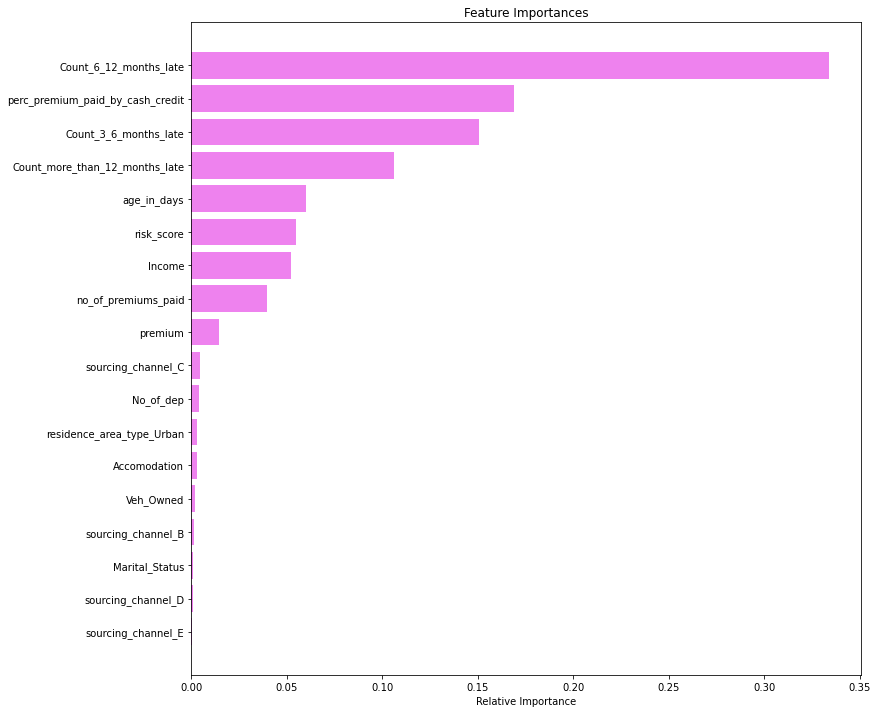

<IPython.core.display.Javascript object>

In [171]:
feature_names = X_train.columns

importances = tuned_gbm2.feature_importances_

indices = np.argsort(importances)

plt.figure(figsize=(12, 12))

plt.title("Feature Importances")

plt.barh(range(len(indices)), importances[indices], color="violet", align="center")

plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

Count_6_12_months_late is the most important variable in predicting default in premium payments followed by perc_premium_paid_by_cash_credit,Count_3_6_months_late, Count_more_than_12_months_late,age_in_days, risk_score,income and no_of_premiums_paid.

# Column Transformer

Let's first do some basic pre-processing

In [172]:
# Separating target variable and other variables
X = data.drop(columns="premium_renewal")
Y = data["premium_renewal"]

<IPython.core.display.Javascript object>

In [173]:
# Splitting the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.30, random_state=1, stratify=Y
)
print(X_train.shape, X_test.shape)

(55897, 15) (23956, 15)


<IPython.core.display.Javascript object>

# Let's use Column Transformer to build the final model
We will use pipelines to standardize the model building, but the steps in a pipeline are applied to each and every variable - how can we personalize the pipeline to perform different processing on different columns.

Column transformer allows different columns or column subsets of the input to be transformed separately and the features generated by each transformer will be concatenated to form a single feature space. 

We will create 2 different pipelines, one for numerical columns and one for categorical columns

For numerical columns, we will do missing value imputation as pre-processing

For categorical columns, we will do one hot encoding and missing value imputation as pre-processing

We are doing missing value imputation for the whole data, so that if there is any missing value in the data in future that can be taken care of.

In [174]:
# creating a list of numerical variables
numerical_features = [
     'age_in_days', 'Income',
       'Count_3_6_months_late', 'Count_6_12_months_late',
       'Count_more_than_12_months_late', 'Marital_Status', 'Veh_Owned',
       'No_of_dep', 'Accomodation', 'no_of_premiums_paid',
       'premium','perc_premium_paid_by_cash_credit','risk_score']

# creating a transformer for numerical variables, which will apply simple imputer on the numerical variables
numeric_transformer = Pipeline(steps=[("imputer", SimpleImputer(strategy="median"))])


# creating a list of categorical variables
categorical_features = ['sourcing_channel',
       'residence_area_type']

# creating a transformer for categorical variables, which will first apply simple imputer and 
#then do one hot encoding for categorical variables
categorical_transformer = Pipeline(
    steps=[
        ("imputer", SimpleImputer(strategy="most_frequent")),
        ("onehot", OneHotEncoder(handle_unknown="ignore")),
    ]
)
# handle_unknown = "ignore", allows model to handle any unknown category in the test data

# combining categorical transformer and numerical transformer using a column transformer

preprocessor = ColumnTransformer(
    transformers=[
        ("numerical_column_processing", numeric_transformer, numerical_features),
        ("cat", categorical_transformer, categorical_features),
    ],
    remainder="drop",
)
# remainder = "drop" has been used, it will drop the variables that are not present in "numerical_features" 
# and "categorical_features" 



<IPython.core.display.Javascript object>

In [175]:
# Creating new pipeline with best parameters
model = Pipeline(
    steps=[
        ("pre", preprocessor),
        (
            "GBM",
            GradientBoostingClassifier(
                random_state=1,
                subsample=0.7,
                n_estimators=125,
                max_features=0.7,
                learning_rate=0.2,
                init=AdaBoostClassifier(random_state=1),
            ),
        ),
    ]
)
# Fit the model on training data
model.fit(X_train, y_train)

Pipeline(steps=[('pre',
                 ColumnTransformer(transformers=[('numerical_column_processing',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median'))]),
                                                  ['age_in_days', 'Income',
                                                   'Count_3_6_months_late',
                                                   'Count_6_12_months_late',
                                                   'Count_more_than_12_months_late',
                                                   'Marital_Status',
                                                   'Veh_Owned', 'No_of_dep',
                                                   'Accomodation',
                                                   'no_of_premiums_paid',
                                                   'premium',
                                                  

<IPython.core.display.Javascript object>

# Plot a learning curve

The learning curve shows:

1. How much the estimator benefits from more data (e.g. do we have “enough data” or will the estimator get better if used in an online fashion).

2. If the estimator is more sensitive to error due to variance vs. error due to bias.

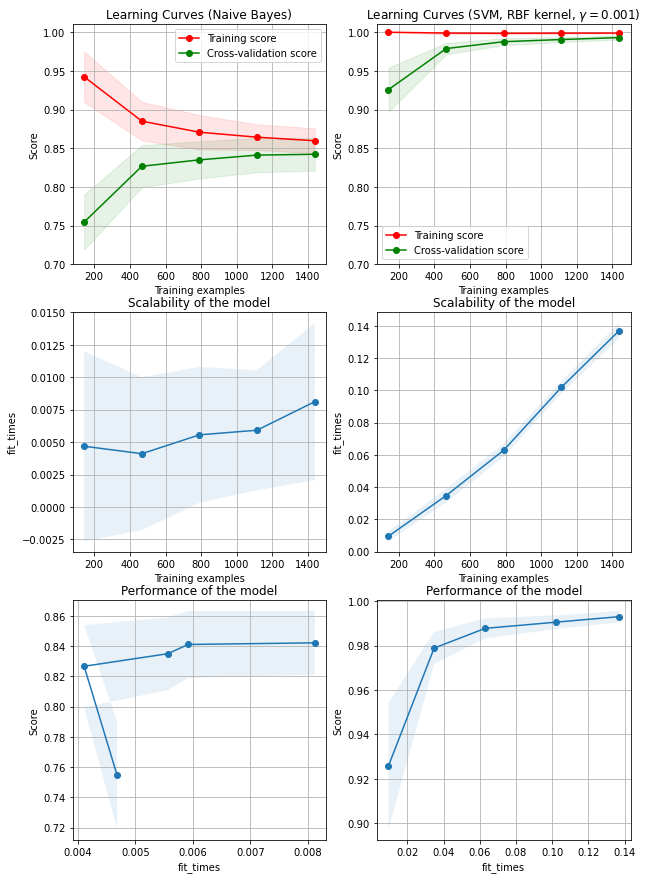

<IPython.core.display.Javascript object>

In [176]:
# show the relationship of the training score versus the cross validated test score
def plot_learning_curve(
    estimator,
    title,
    X,
    y,
    axes=None,
    ylim=None,
    cv=None,
    n_jobs=None,
    train_sizes=np.linspace(0.1, 1.0, 5),
):
    """
    Generate 3 plots: the test and training learning curve, the training
    samples vs fit times curve, the fit times vs score curve.

    Parameters
    ----------
    estimator : estimator instance
        An estimator instance implementing `fit` and `predict` methods which
        will be cloned for each validation.

    title : str
        Title for the chart.

    X : array-like of shape (n_samples, n_features)
        Training vector, where ``n_samples`` is the number of samples and
        ``n_features`` is the number of features.

    y : array-like of shape (n_samples) or (n_samples, n_features)
        Target relative to ``X`` for classification or regression;
        None for unsupervised learning.

    axes : array-like of shape (3,), default=None
        Axes to use for plotting the curves.

    ylim : tuple of shape (2,), default=None
        Defines minimum and maximum y-values plotted, e.g. (ymin, ymax).

    cv : int, cross-validation generator or an iterable, default=None
        Determines the cross-validation splitting strategy.
        Possible inputs for cv are:

          - None, to use the default 5-fold cross-validation,
          - integer, to specify the number of folds.
          - :term:`CV splitter`,
          - An iterable yielding (train, test) splits as arrays of indices.

        For integer/None inputs, if ``y`` is binary or multiclass,
        :class:`StratifiedKFold` used. If the estimator is not a classifier
        or if ``y`` is neither binary nor multiclass, :class:`KFold` is used.

        Refer :ref:`User Guide <cross_validation>` for the various
        cross-validators that can be used here.

    n_jobs : int or None, default=None
        Number of jobs to run in parallel.
        ``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.
        ``-1`` means using all processors. See :term:`Glossary <n_jobs>`
        for more details.

    train_sizes : array-like of shape (n_ticks,)
        Relative or absolute numbers of training examples that will be used to
        generate the learning curve. If the ``dtype`` is float, it is regarded
        as a fraction of the maximum size of the training set (that is
        determined by the selected validation method), i.e. it has to be within
        (0, 1]. Otherwise it is interpreted as absolute sizes of the training
        sets. Note that for classification the number of samples usually have
        to be big enough to contain at least one sample from each class.
        (default: np.linspace(0.1, 1.0, 5))
    """
    if axes is None:
        _, axes = plt.subplots(1, 3, figsize=(20, 5))

    axes[0].set_title(title)
    if ylim is not None:
        axes[0].set_ylim(*ylim)
    axes[0].set_xlabel("Training examples")
    axes[0].set_ylabel("Score")

    train_sizes, train_scores, test_scores, fit_times, _ = learning_curve(
        estimator,
        X,
        y,
        cv=cv,
        n_jobs=n_jobs,
        train_sizes=train_sizes,
        return_times=True,
    )
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    fit_times_mean = np.mean(fit_times, axis=1)
    fit_times_std = np.std(fit_times, axis=1)

    # Plot learning curve
    axes[0].grid()
    axes[0].fill_between(
        train_sizes,
        train_scores_mean - train_scores_std,
        train_scores_mean + train_scores_std,
        alpha=0.1,
        color="r",
    )
    axes[0].fill_between(
        train_sizes,
        test_scores_mean - test_scores_std,
        test_scores_mean + test_scores_std,
        alpha=0.1,
        color="g",
    )
    axes[0].plot(
        train_sizes, train_scores_mean, "o-", color="r", label="Training score"
    )
    axes[0].plot(
        train_sizes, test_scores_mean, "o-", color="g", label="Cross-validation score"
    )
    axes[0].legend(loc="best")

    # Plot n_samples vs fit_times
    axes[1].grid()
    axes[1].plot(train_sizes, fit_times_mean, "o-")
    axes[1].fill_between(
        train_sizes,
        fit_times_mean - fit_times_std,
        fit_times_mean + fit_times_std,
        alpha=0.1,
    )
    axes[1].set_xlabel("Training examples")
    axes[1].set_ylabel("fit_times")
    axes[1].set_title("Scalability of the model")

    # Plot fit_time vs score
    axes[2].grid()
    axes[2].plot(fit_times_mean, test_scores_mean, "o-")
    axes[2].fill_between(
        fit_times_mean,
        test_scores_mean - test_scores_std,
        test_scores_mean + test_scores_std,
        alpha=0.1,
    )
    axes[2].set_xlabel("fit_times")
    axes[2].set_ylabel("Score")
    axes[2].set_title("Performance of the model")

    return plt


fig, axes = plt.subplots(3, 2, figsize=(10, 15))

X, y = load_digits(return_X_y=True)

title = "Learning Curves (Naive Bayes)"
# Cross validation with 100 iterations to get smoother mean test and train
# score curves, each time with 20% data randomly selected as a validation set.
cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=0)

estimator = GaussianNB()
plot_learning_curve(
    estimator, title, X, y, axes=axes[:, 0], ylim=(0.7, 1.01), cv=cv, n_jobs=4
)

title = r"Learning Curves (SVM, RBF kernel, $\gamma=0.001$)"
# SVC is more expensive so we do a lower number of CV iterations:
cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=0)
estimator = SVC(gamma=0.001)
plot_learning_curve(
    estimator, title, X, y, axes=axes[:, 1], ylim=(0.7, 1.01), cv=cv, n_jobs=4
)

plt.show()

The training score and cross-validation score converges around 1100 observations. The estimator may not benefit from more data based on this analysis.

# Model interpretation using ELI5

ELI5 (also referred to as "Explain like I'm 5") allows us to visualize and debug various Machine Learning (ML) models using unified API and explain their predictions..

The value tells us how much of an impact a feature has on the predictions on average, the sign tells us in which direction.

In [179]:
eli.explain_weights(tuned_xgb1)
eli.explain_weights(tuned_xgb2)
eli.explain_weights(tuned_adb1)
eli.explain_weights(tuned_adb2)
eli.explain_weights(tuned_gbm1)
eli.explain_weights(tuned_gbm1)

Explanation(estimator='GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),\n                           learning_rate=0.2, max_features=0.7,\n                           n_estimators=125, random_state=1, subsample=0.7)', description='\nRandom forest feature importances; values are numbers 0 <= x <= 1;\nall values sum to 1.\n', error=None, method='feature importances', is_regression=False, targets=None, feature_importances=FeatureImportances(importances=[FeatureWeight(feature='x0', weight=0.36495697877619765, std=0.17263237134495305, value=None), FeatureWeight(feature='x3', weight=0.12913767105460702, std=0.08554701105232954, value=None), FeatureWeight(feature='x4', weight=0.11365429380969394, std=0.09011519835453385, value=None), FeatureWeight(feature='x2', weight=0.09451619407342036, std=0.20308488159274987, value=None), FeatureWeight(feature='x10', weight=0.06988755533823628, std=0.14221467016693654, value=None), FeatureWeight(feature='x1', weight=0.06769224062208322, std=0.16619673422460723, value=None), FeatureWeight(feature='x5', weight=0.05732378295881504, std=0.06823238797785733, value=None), FeatureWeight(feature='x11', weight=0.05354748987694815, std=0.11864945859612318, value=None), FeatureWeight(feature='x12', weight=0.021550600736310113, std=0.0934716030127679, value=None), FeatureWeight(feature='x8', weight=0.005803058299998855, std=0.05657400077921921, value=None), FeatureWeight(feature='x7', weight=0.005272869118996645, std=0.05984819125172523, value=None), FeatureWeight(feature='x6', weight=0.004276837568108628, std=0.04422521123400097, value=None), FeatureWeight(feature='x16', weight=0.0034583916027006124, std=0.033668868275012906, value=None), FeatureWeight(feature='x15', weight=0.002766059029484294, std=0.04168845987071011, value=None), FeatureWeight(feature='x9', weight=0.0025543050101918974, std=0.029496275905014444, value=None), FeatureWeight(feature='x14', weight=0.001701111773540547, std=0.024971679022974244, value=None), FeatureWeight(feature='x13', weight=0.001031863143497867, std=0.01583830544048836, value=None), FeatureWeight(feature='x17', weight=0.0008686972071689695, std=0.02052693416294764, value=None)], remaining=0), decision_tree=None, highlight_spaces=None, transition_features=None, image=None)

<IPython.core.display.Javascript object>

Feature x0 has the highest weight followed by feature x3, x4, x2 and x10

# Business Recommendations
We have been able to build a predictive model:

a) The Insurance company can deploy this model to identify customers who are at risk of defaulting in their insurance payments.

b) The company can use the model to proactively engage customers who are likely to default to forestall loss of revenue.

c) based on which, the bank can take appropriate actions to build better retention policies for customers.

Factors that drive default in premium payments - Count_6_12_months_late, perc_premium_paid_by_cash_credit,Count_3_6_months_late, Count_more_than_12_months_late,age_in_days, risk_score, Income and no_of_premiums_paid.

Count_6_12_months_late: Customers whose previous payments come in late for as long as 6-12 months are most likely to default in premium payments. The model results shows that customers that have previously defaulted from 3 months to more than 12 months are more likely to default. 
The risk score of most policyholders appear to be high despite these defaults. There is a need to review the risk methodology adopted in risk scoring policyholders to properly profile policyholders that are likely to default, price their premiums appropriately and decide on the mode of collection (preferably automated premium collection for prospective high risk policyholders). 

The perc_premium_paid_by_cash_credit has a high correlation with the Count_6_12_months_late, Count_3_6_months_late, Count_more_than_12_months_late variable which points to the likelihood that the defaulter pay a large portion of their premium via cash method and the payment method needs to change to an automated for customers with a history of default.

perc_premium_paid_by_cash_credit: The likelihood of premium default is higher as the percentage of premium paid as cash payments increases. This delay can be due to the inconvenience of the policyholder visiting a bank or the Insurance company to make payments or the policyholder diverting the funds to other needs as they control when they pay unlike automated direct debit mandate. This may also be due to forgetfulness where they are no reminders on the due date. The Insurance company should consider automation of payments as feasible as possible. 
This can be phased to allow policyholders who cannot immediately migrate for some reasons, a grace period to make cash payments before every policyholder is moved to an automated payment system e.g direct debit, automated billing, etc.

Count_3_6_months_late: Customers whose previous payments come in late for as long as 3-6 months are most likely to default in premium payments. The different periods of late payments appear to be highly correlated. There is a possibility that customers who start out late for a few months end up being late for a longer period when not actively engaged /proactively reached out to.

age_in_days: Younger policy holders are more likely to default compared to older policy holders for longer periods (above 6 months). This may be due to the fact that they are not risk-conscious and investment-minded at this phase. Young people are tech-savvy and would be prospects for auotmated payment option to mitigate late payments by this category.Electronic reminders (emails, sms alerts, etc) is the preferred mode of communication for this category instead of surface mails.

risk_score: The mean risk score is 99.06 which is impressive and may inform why 75% of customers don't default in their payments. The category of customers with lower risk score are more likely to default and emphasis should be placed on the category.

Income: Low earners are more likely to default in their premium payments compared to high earners. A risk-based assessement should be considered to stratify the Insurance products based on income level and the risk inherent in each products analyzed and effectively mitigated. of the minimum income level for policyholders.

no_of_premiums_paid : 68.8% of the customers have made 12 or less monthly payments till date which shows that most of the customers are new customers with total payments made in the last 1 year or are late payers. There may be an issue with attrition of policyholders after a few months which needs to be reviewed.